In [1]:
import subprocess
import sys

# List of packages to install
packages = ["h3", "python-geohash", "geopy", "seaborn", "geopandas"]

# Function to install a package
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Try to import packages, install if not found
try:
    import h3
    import geohash
    import pandas as pd
    import geopy.geocoders
    import geopandas as gpd
    from shapely import wkt
    import matplotlib.pyplot as plt
    from shapely.geometry import LineString, Polygon
    import seaborn as sns
except ImportError as e:
    missing_package = str(e).split("'")[1]
    print(f"Package {missing_package} not found. Installing...")
    if missing_package == "h3":
        install_package("h3==4.0.0b5")  # replace with the pre-release version if necessary
    elif missing_package == "geohash":
        install_package("python-geohash")
    else:
        install_package(missing_package)
    
    # Try importing again
    try:
        import os
        import h3
        import time
        import geohash
        import numpy as np
        import pandas as pd
        import geopy.geocoders
        import geopandas as gpd
        from shapely import wkt
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        from shapely.geometry import LineString, Polygon
        import seaborn as sns
    except ImportError as e:
        print(f"Failed to install {missing_package}. Please try to install it manually.")

print("All packages are successfully imported!")


All packages are successfully imported!


# Aggregated by day - Histogram

## Device Location per process day - 4 countries

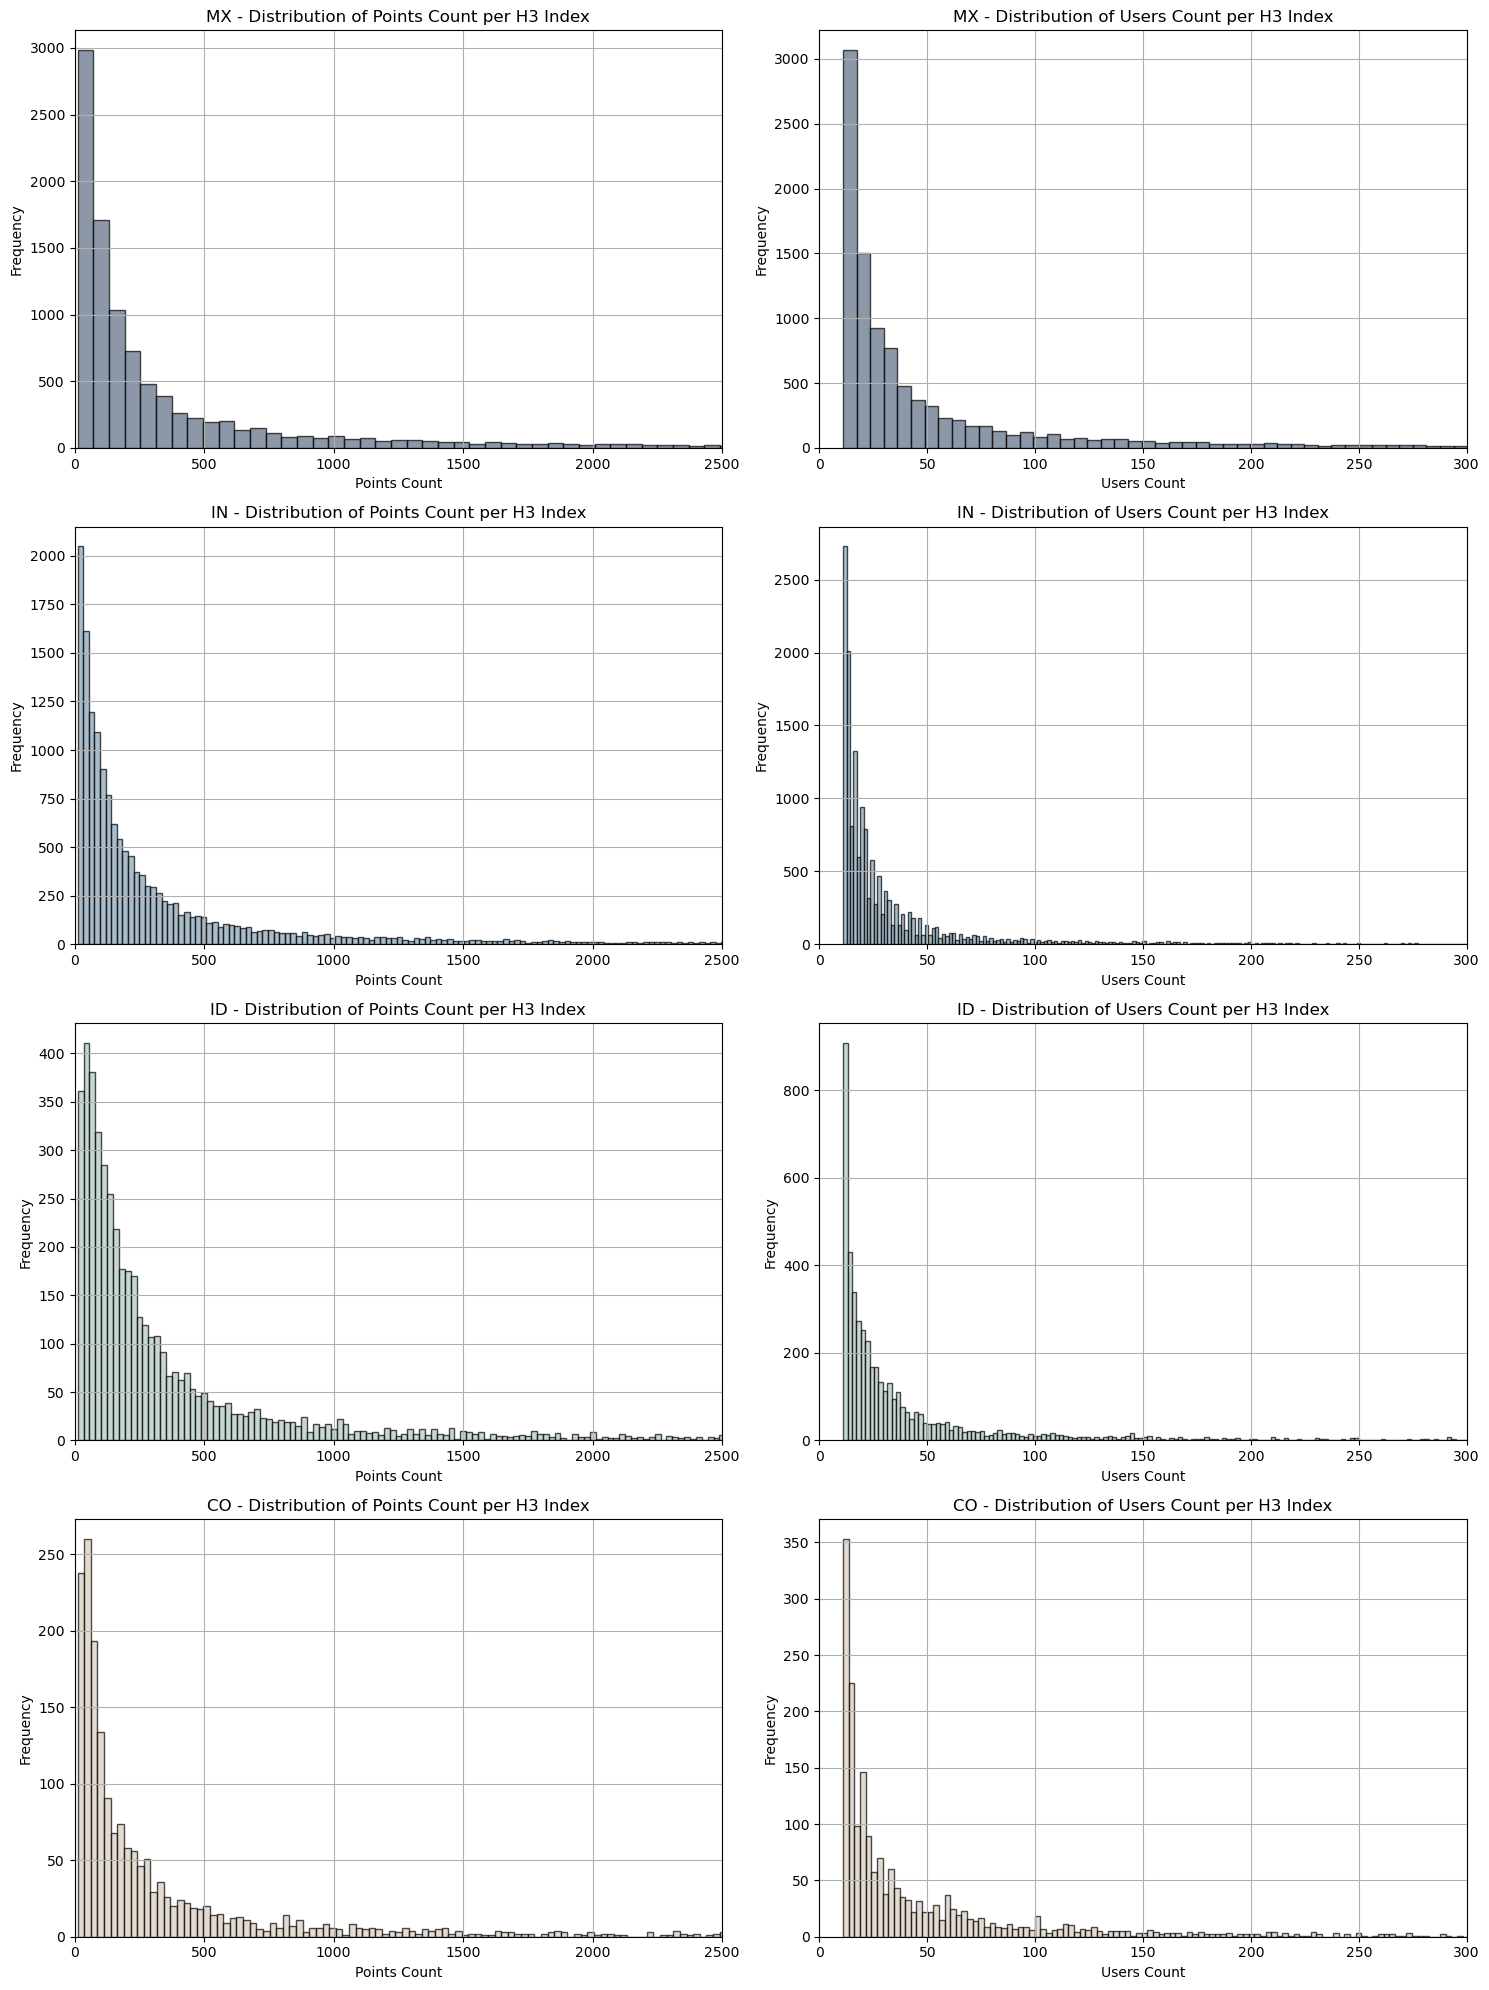

In [2]:
# Define the countries and corresponding colors
country_codes = ['MX', 'IN', 'ID', 'CO']
colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']

# Define the x-axis limits and bins for points_count and users_count
xmax_points = [2500, 2500, 2500, 2500]
xmax_users = [300, 300, 300, 300]
bins_points = [1000, 500, 500, 500]
bins_users = [1000, 500, 500, 500]

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, (country_code, color) in enumerate(zip(country_codes, colors)):
    # Load data for each country
    df = pd.read_csv(f'/home/jovyan/Data/20191201_{country_code}_dl.csv')

    # Calculate H3 index
    resolution = 7
    df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['lat'], row['lng'], resolution), axis=1)

    # Group by H3 index to get the number of points and unique users
    h3_agg = df.groupby('h3_index').agg(
        points_count=('cuebiq_id', 'count'),
        users_count=('cuebiq_id', 'nunique')
    ).reset_index()

    # Filter rows where users_count > 10
    h3_agg = h3_agg[h3_agg['users_count'] > 10]

    # Plot histogram for points_count
    ax = axes[i, 0]
    n, bins, patches = ax.hist(h3_agg['points_count'], bins=bins_points[i], density=False, color=color, edgecolor='black', alpha=0.7)
    
    xmin, xmax = 0, xmax_points[i]  # Set the x-axis limits to zoom in
    ax.set_xlim(xmin, xmax)
    ax.set_title(f'{country_code} - Distribution of Points Count per H3 Index')
    ax.set_xlabel('Points Count')
    ax.set_ylabel('Frequency')
    ax.grid(True)

    # Plot histogram for users_count
    ax = axes[i, 1]
    ax.hist(h3_agg['users_count'], bins=bins_users[i], color=color, edgecolor='black', alpha=0.7)
    ax.set_xlim(0, xmax_users[i])  # Set the x-axis limits to zoom in
    ax.set_title(f'{country_code} - Distribution of Users Count per H3 Index')
    ax.set_xlabel('Users Count')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.savefig(f'/home/jovyan/Data/20191201_dl_plots.png', dpi=300)  # Save the figure with high resolution
plt.show()

## Device Location per event day - single country 24h

In [20]:
# Define the chosen country and corresponding color
chosen_country_code = 'IN'  
color = '#83a0b2'  

# country_codes = ['MX', 'IN', 'ID', 'CO']
# colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']

date = 20190105

# Load data for the chosen country
df = pd.read_csv(f'/home/jovyan/Data/DL/{chosen_country_code}/{date}_{chosen_country_code}_pe_dl.csv')
# df

# Calculate H3 index
resolution = 7
df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['lat'], row['lng'], resolution), axis=1)

# Group by H3 index to get the number of points and unique users
h3_agg = df.groupby('h3_index').agg(
    points_count=('cuebiq_id', 'count'),
    users_count=('cuebiq_id', 'nunique')
).reset_index()

# Filter rows where users_count > 10
h3_agg = h3_agg[h3_agg['users_count'] > 10]
h3_agg

h3_index  points_count  users_count
55      873c0a520ffffff           181           20
59      873c0a525ffffff           370           37
60      873c0a526ffffff            41           16
63      873c0a534ffffff            23           17
93      873c0a5b6ffffff          1323           52
...                 ...           ...          ...
160931  8764e4918ffffff           131           15
160932  8764e4919ffffff            66           14
160933  8764e491affffff           264           28
160934  8764e491bffffff           111           13
160940  8764e49a9ffffff          2140           36

[15952 rows x 3 columns]

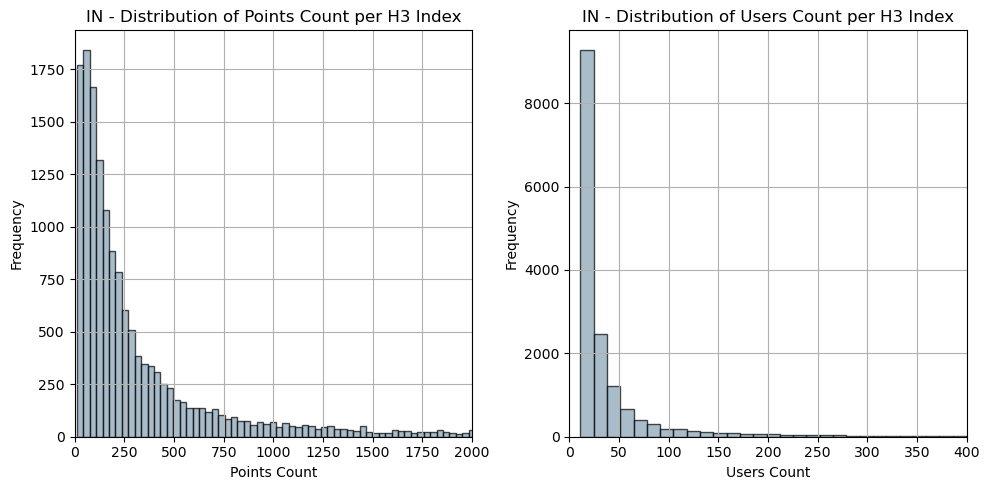

In [25]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

# Define the x-axis limits and bins for points_count and users_count
xmax_points = 2000
xmax_users = 400
bins_points = 500
bins_users = 100

# Plot histogram for points_count
ax = axes[0]
n, bins, patches = ax.hist(h3_agg['points_count'], bins=bins_points, density=False, color=color, edgecolor='black', alpha=0.7)

xmin, xmax = 0, xmax_points  # Set the x-axis limits to zoom in
ax.set_xlim(xmin, xmax)
ax.set_title(f'{chosen_country_code} - Distribution of Points Count per H3 Index')
ax.set_xlabel('Points Count')
ax.set_ylabel('Frequency')
ax.grid(True)

# Plot histogram for users_count
ax = axes[1]
ax.hist(h3_agg['users_count'], bins=bins_users, color=color, edgecolor='black', alpha=0.7)
ax.set_xlim(0, xmax_users)  # Set the x-axis limits to zoom in
ax.set_title(f'{chosen_country_code} - Distribution of Users Count per H3 Index')
ax.set_xlabel('Users Count')
ax.set_ylabel('Frequency')
ax.grid(True)

plt.tight_layout()
plt.savefig(f'/home/jovyan/Data/{date}_dl_plots_{chosen_country_code}.png', dpi=300)  # Save with country code
plt.show()

## Device Location per event day - per 1/2/3/4/6/8 hour

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import h3
import numpy as np
import os

# Function to add 'hour_segment' column based on user-defined hour aggregation
def add_hour_segment(df, aggregation_hours):
    aggregation_minutes = int(aggregation_hours * 60)
    df['hour_segment'] = ((df['event_datetime_utc'].dt.hour * 60 + df['event_datetime_utc'].dt.minute) // aggregation_minutes).astype(int)
    return df

# Function to calculate optimal bin width using Freedman-Diaconis rule
def optimal_bin_width(data):
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    bin_width = 2 * iqr * len(data) ** (-1/3)
    return bin_width

# Function to plot histograms for a specific hour segment
def plot_histograms(df, hour_segment, aggregation_hours, color):
    hour_segment_df = df[df['hour_segment'] == hour_segment]

    # Check if there's data for the hour segment
    if hour_segment_df.empty:
        start_time = hour_segment * aggregation_hours
        end_time = start_time + aggregation_hours
        print(f"No data available for hour segment {hour_segment} (hours {start_time} to {end_time}).")
        return  # Skip plotting if no data

    h3_agg = hour_segment_df.groupby('h3_index').agg(
        points_count=('cuebiq_id', 'count'),
        users_count=('cuebiq_id', 'nunique')
    ).reset_index()
    
    h3_agg = h3_agg[h3_agg['users_count'] > 10]

    if h3_agg.empty:
        start_time = hour_segment * aggregation_hours
        end_time = start_time + aggregation_hours
        print(f"No H3 cells with more than 10 users for hour segment {hour_segment} (hours {start_time} to {end_time}).")
        return  # Skip plotting if no data after filtering

    # Calculate optimal bin width and number of bins
    if len(h3_agg['points_count']) > 0 and h3_agg['points_count'].max() != h3_agg['points_count'].min():
        bin_width_points = optimal_bin_width(h3_agg['points_count'])
        bins_points = int(np.ceil((h3_agg['points_count'].max() - h3_agg['points_count'].min()) / bin_width_points))
    else:
        bins_points = 10  # Default bin number if data is insufficient

    if len(h3_agg['users_count']) > 0 and h3_agg['users_count'].max() != h3_agg['users_count'].min():
        bin_width_users = optimal_bin_width(h3_agg['users_count'])
        bins_users = int(np.ceil((h3_agg['users_count'].max() - h3_agg['users_count'].min()) / bin_width_users))
    else:
        bins_users = 10  # Default bin number if data is insufficient

    # Set maximum x-axis limit to the 95th percentile
    xmax_points = np.percentile(h3_agg['points_count'], 95) if not h3_agg['points_count'].empty else 0
    xmax_users = np.percentile(h3_agg['users_count'], 95) if not h3_agg['users_count'].empty else 0

    # Create subplots for points and users
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figure size

    # Plot histogram for points count
    if bins_points > 0:
        n, bins, patches = ax1.hist(h3_agg['points_count'], bins=bins_points, density=False, color=color, edgecolor='black', alpha=0.7)
        ax1.set_xlim(0, xmax_points)
    ax1.set_xlabel('Points Count')
    ax1.set_ylabel('Frequency')
    start_time = hour_segment * aggregation_hours
    end_time = start_time + aggregation_hours
    ax1.set_title(f'Distribution of Points Count per H3 Index (Hours {start_time} to {end_time})')
    ax1.grid(True)

    # Plot histogram for users count
    if bins_users > 0:
        n, bins, patches = ax2.hist(h3_agg['users_count'], bins=bins_users, density=False, color=color, edgecolor='black', alpha=0.7)
        ax2.set_xlim(0, xmax_users)
    ax2.set_xlabel('Users Count')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Distribution of Users Count per H3 Index (Hours {start_time} to {end_time})')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Function to process and plot data based on user inputs
def process_and_plot(chosen_country_code, date, color, aggregation_hours):
    file_path = f'/home/jovyan/Data/DL/{chosen_country_code}/{date}_{chosen_country_code}_pe_dl.csv'
    
    if not os.path.exists(file_path):
        print(f"No data file found for {chosen_country_code} on {date}.")
        return  # Exit if the file does not exist

    # Load data for the chosen country
    df = pd.read_csv(file_path)

    if df.empty:
        print(f"No data available for {chosen_country_code} on {date}.")
        return  # Exit if the DataFrame is empty

    # Ensure there are no NaN values in critical columns
    df = df.dropna(subset=['lat', 'lng', 'event_datetime_utc'])

    # Compute H3 index
    resolution = 7
    df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['lat'], row['lng'], resolution), axis=1)

    # Ensure datetime format and drop rows with NaT in 'event_datetime_utc'
    df['event_datetime_utc'] = pd.to_datetime(df['event_datetime_utc'], errors='coerce')
    df = df.dropna(subset=['event_datetime_utc'])

    # Add 'hour_segment' column based on user input
    df = add_hour_segment(df, aggregation_hours)

    # Call the function for each hour segment
    segments_per_day = int(24 * (1 / aggregation_hours))
    for hour_segment in range(segments_per_day):
        plot_histograms(df, hour_segment, aggregation_hours, color)

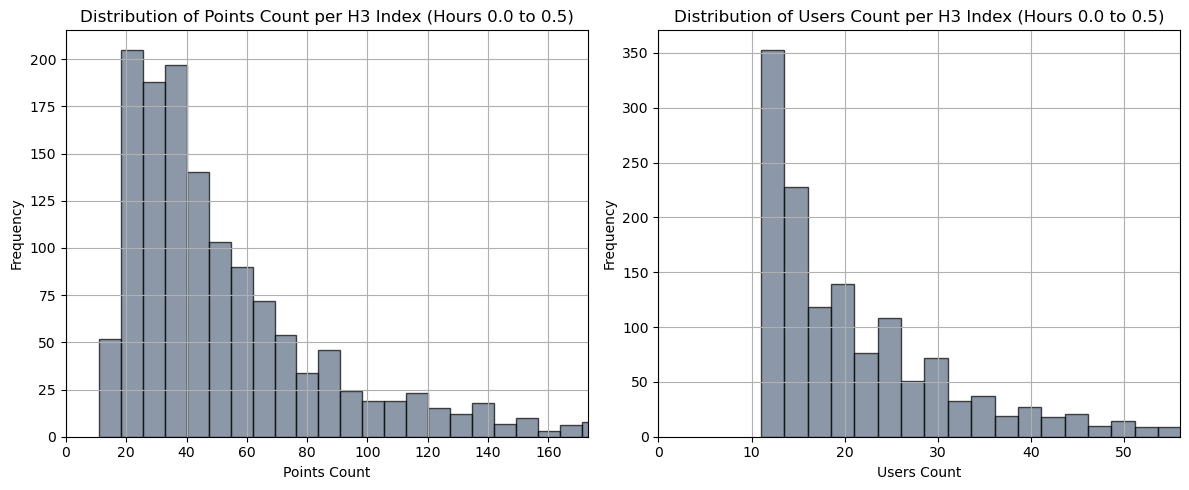

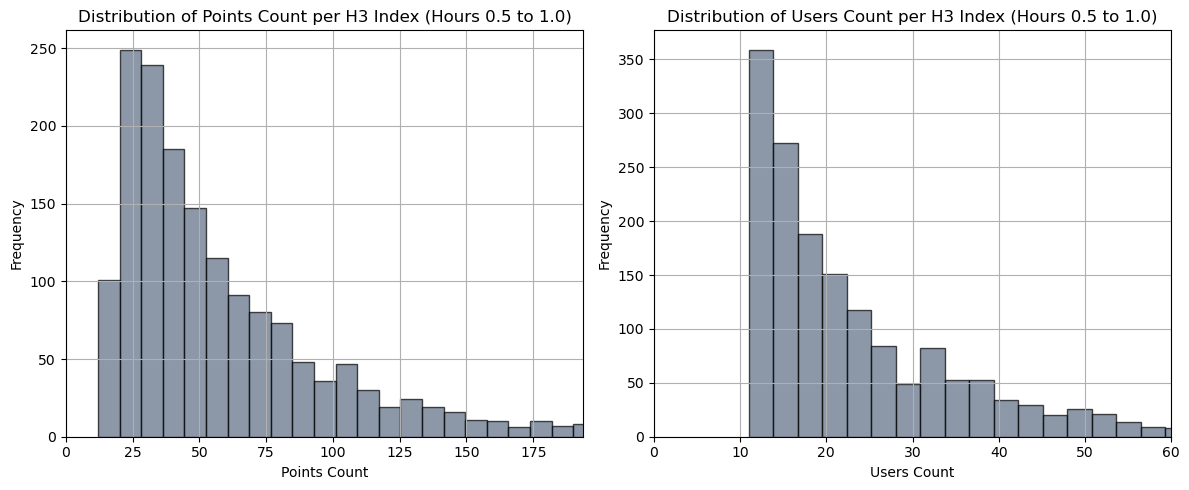

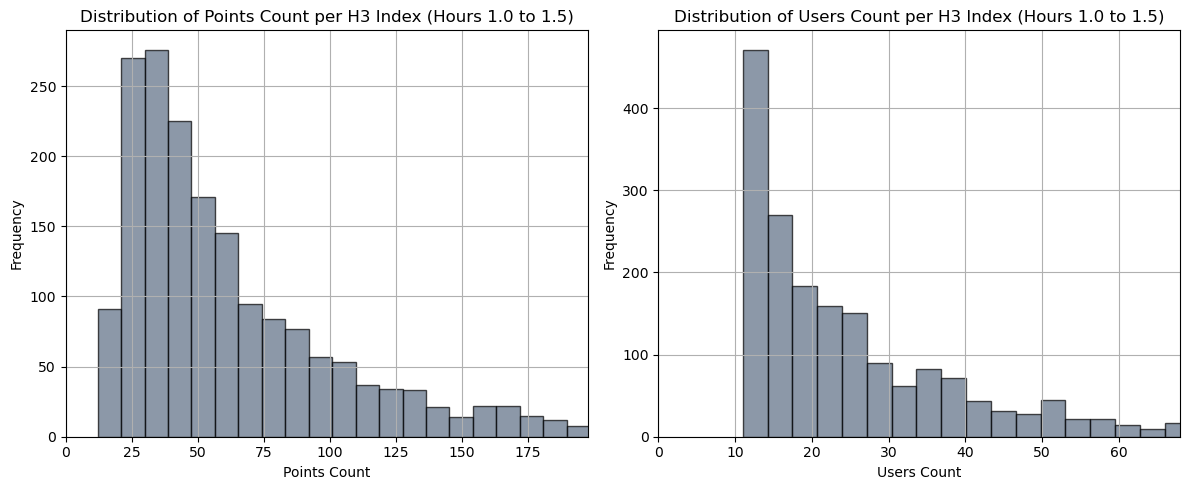

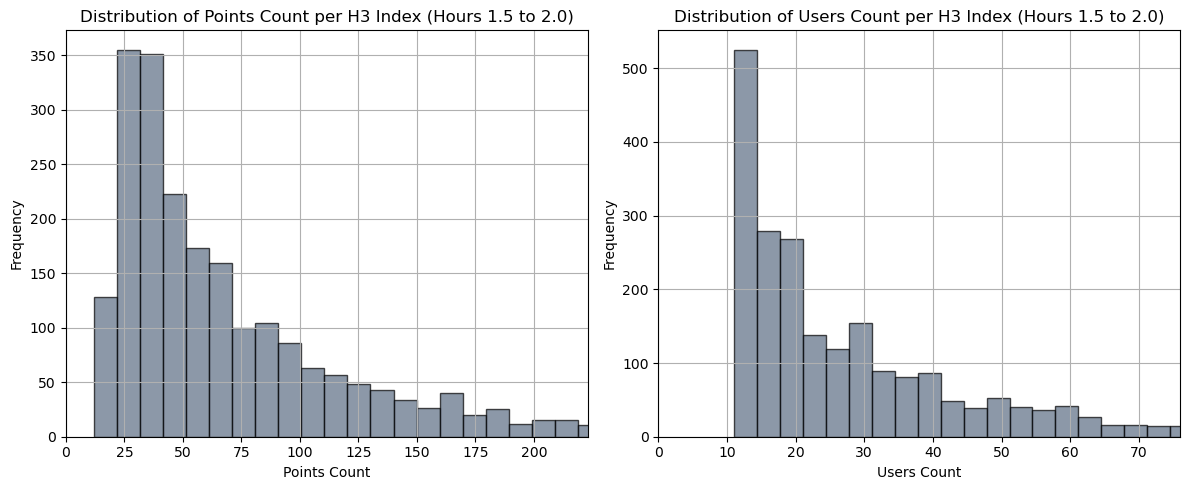

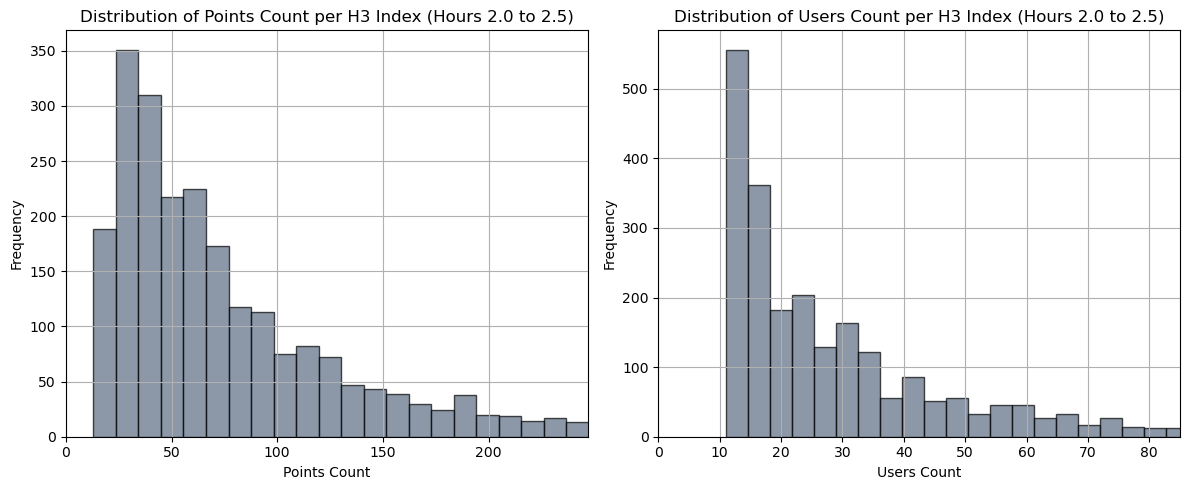

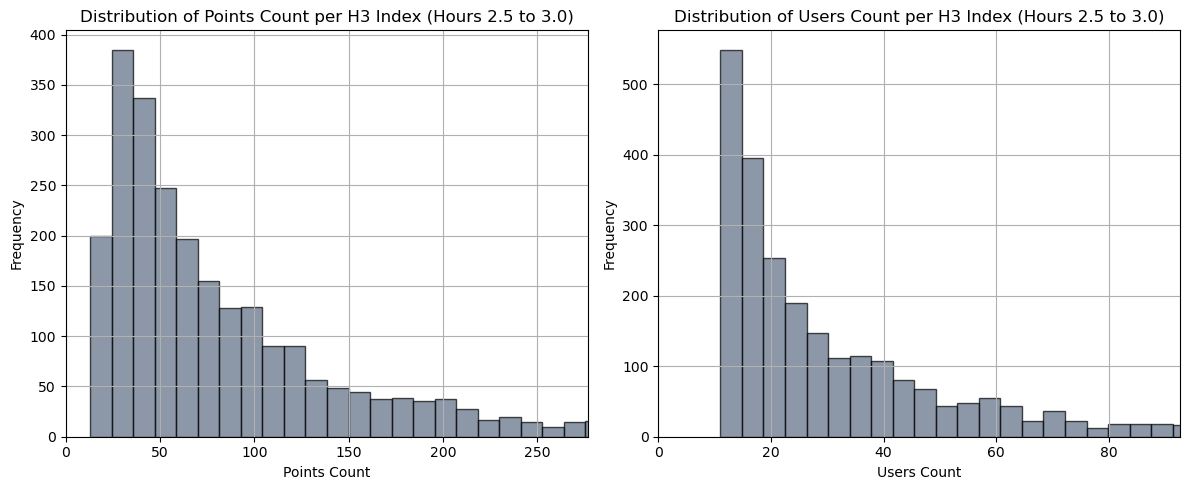

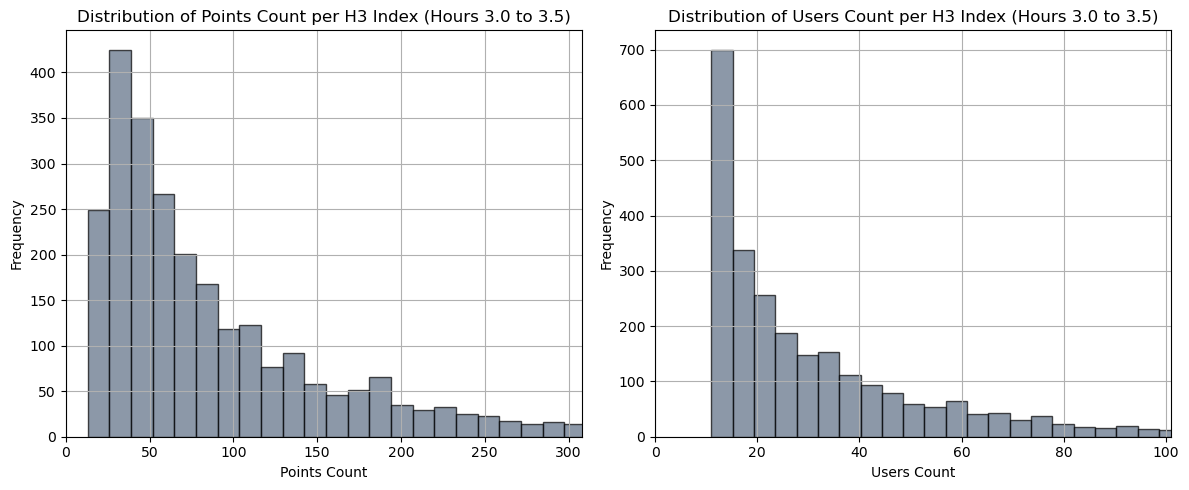

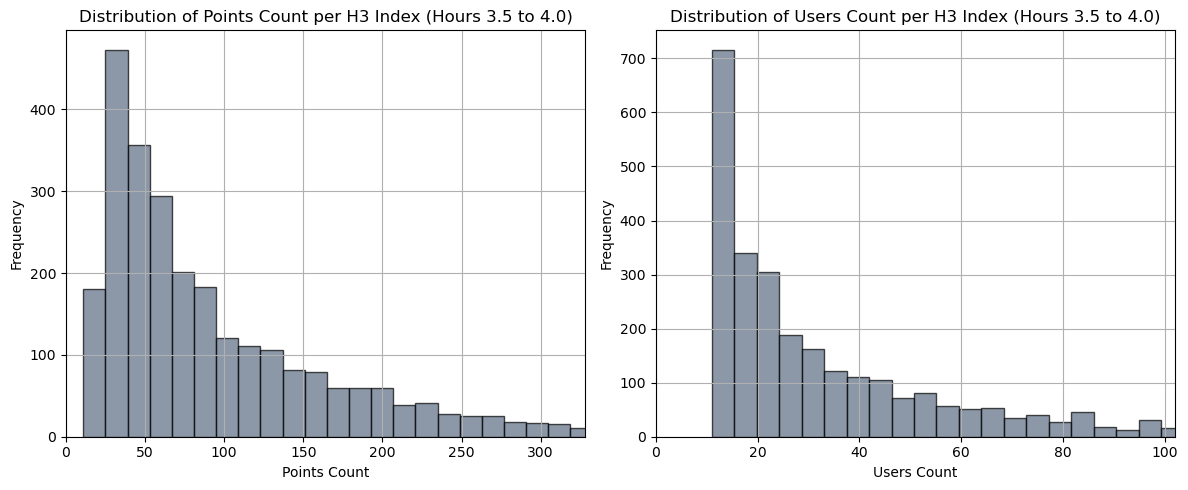

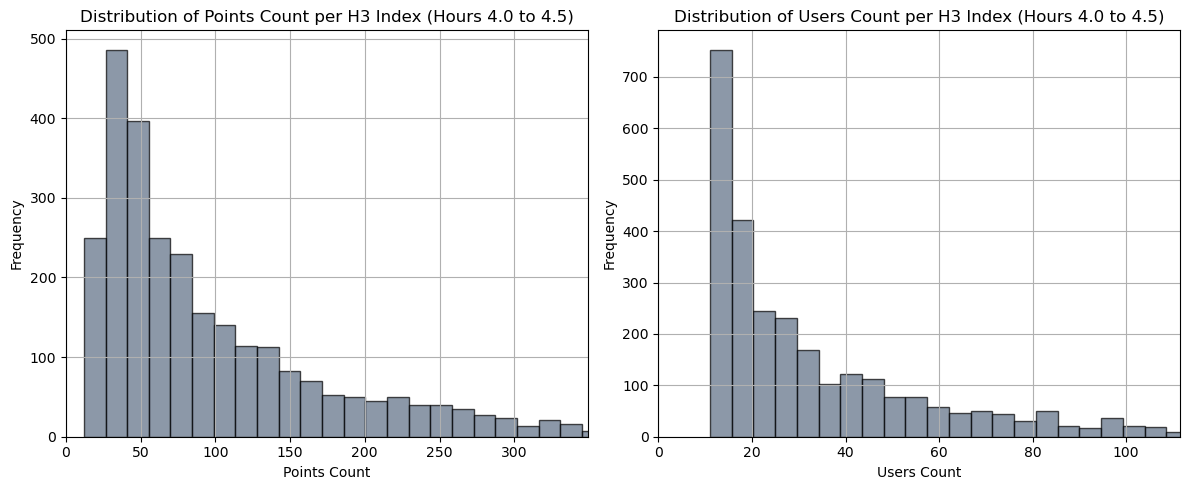

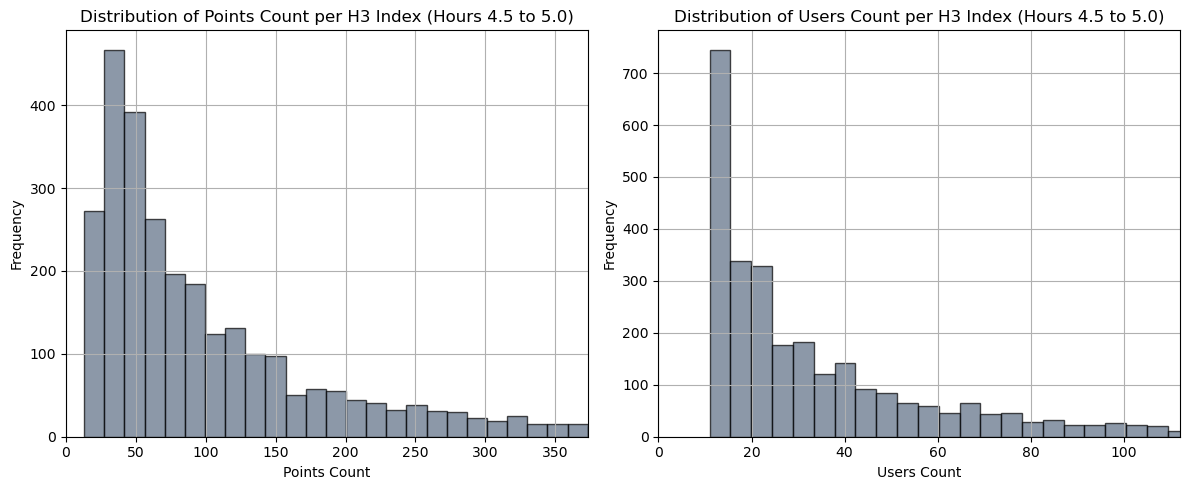

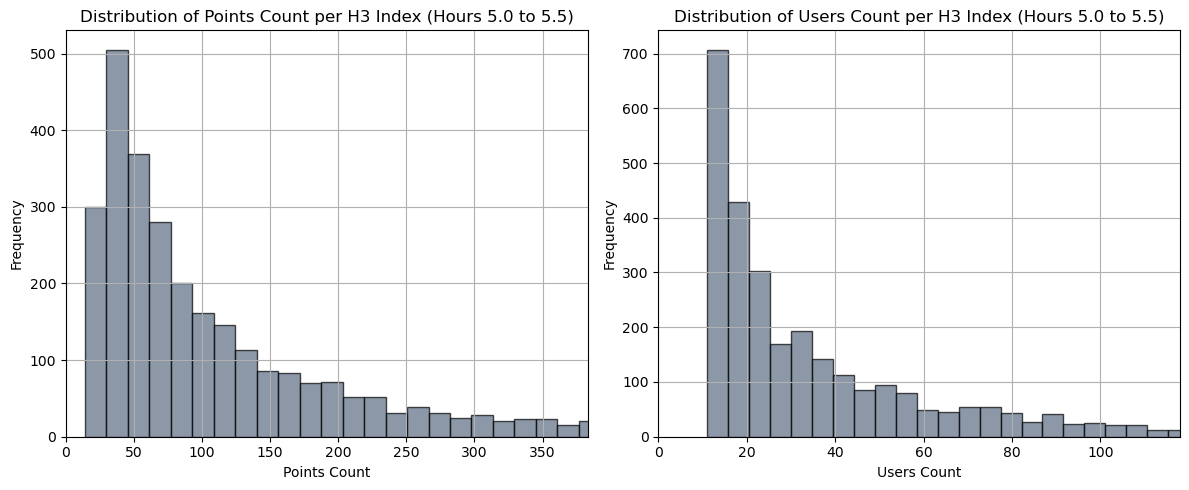

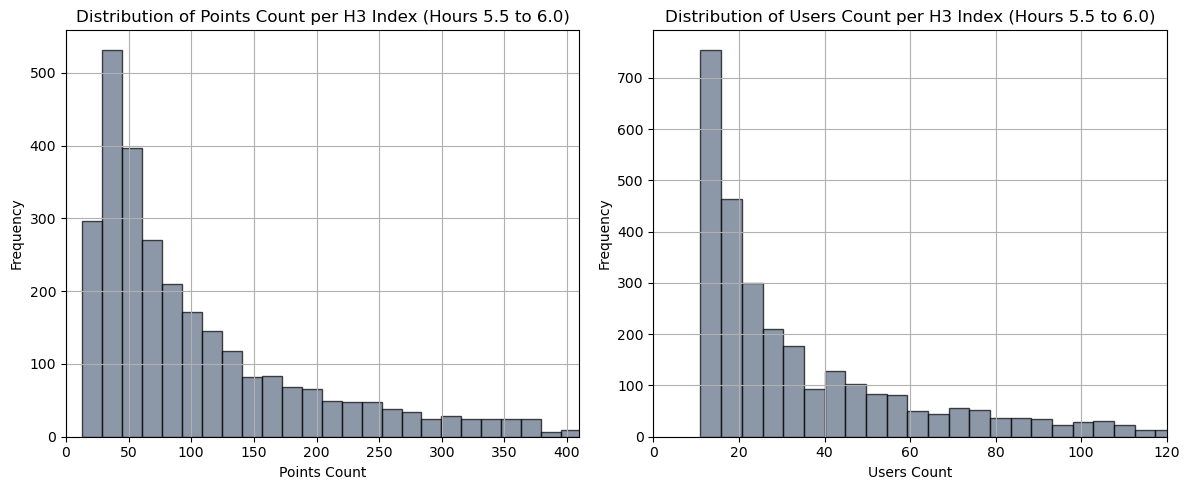

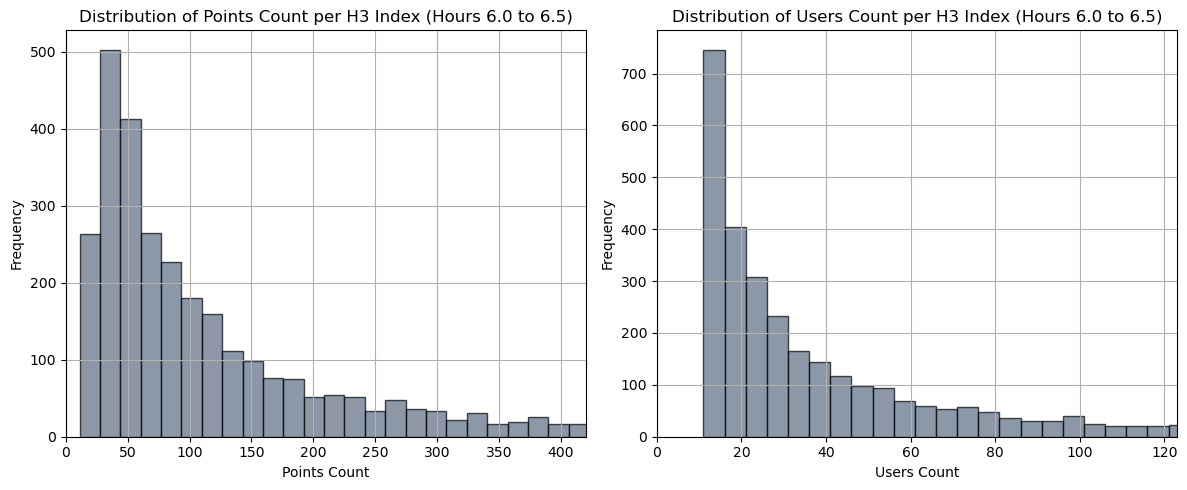

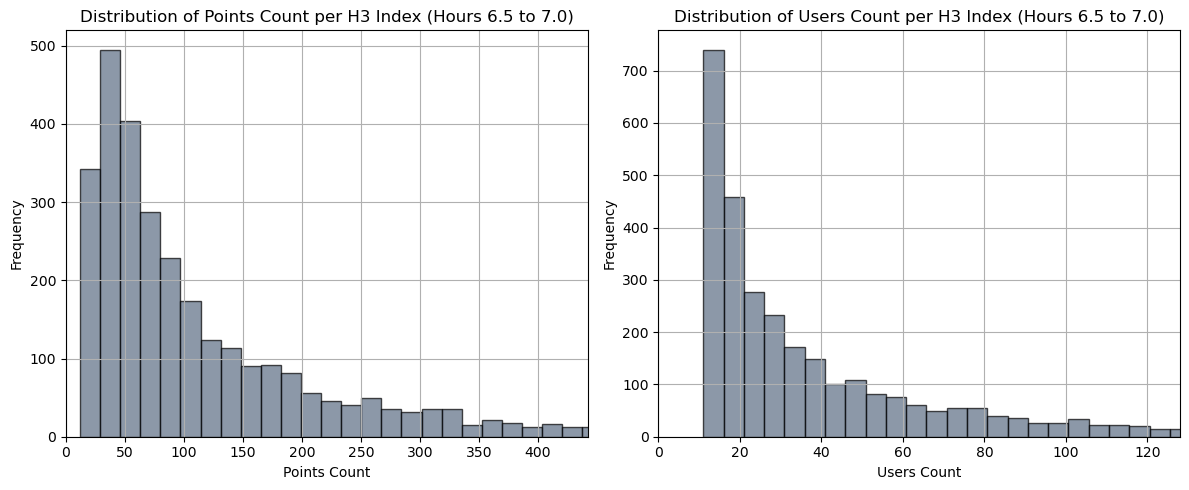

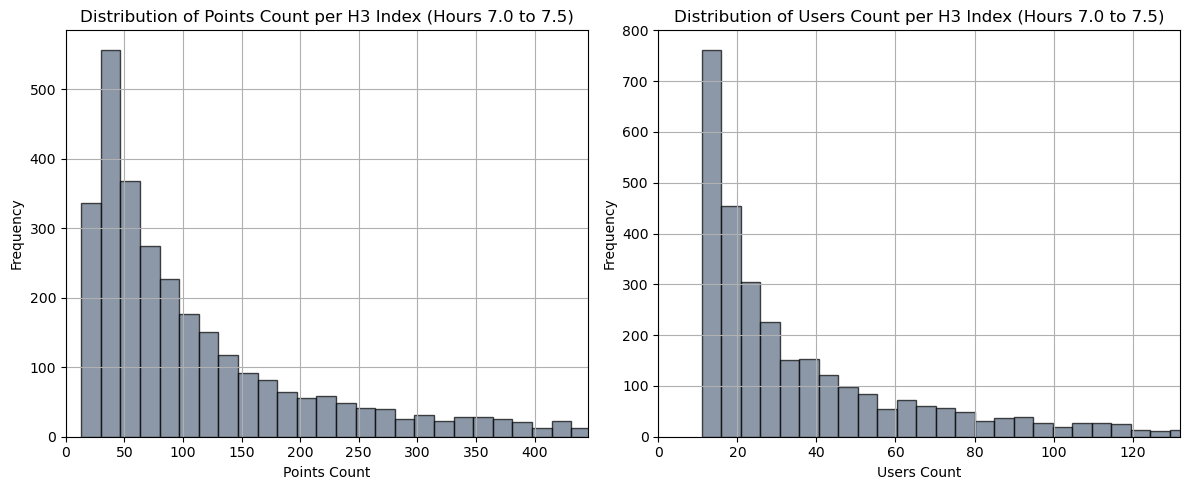

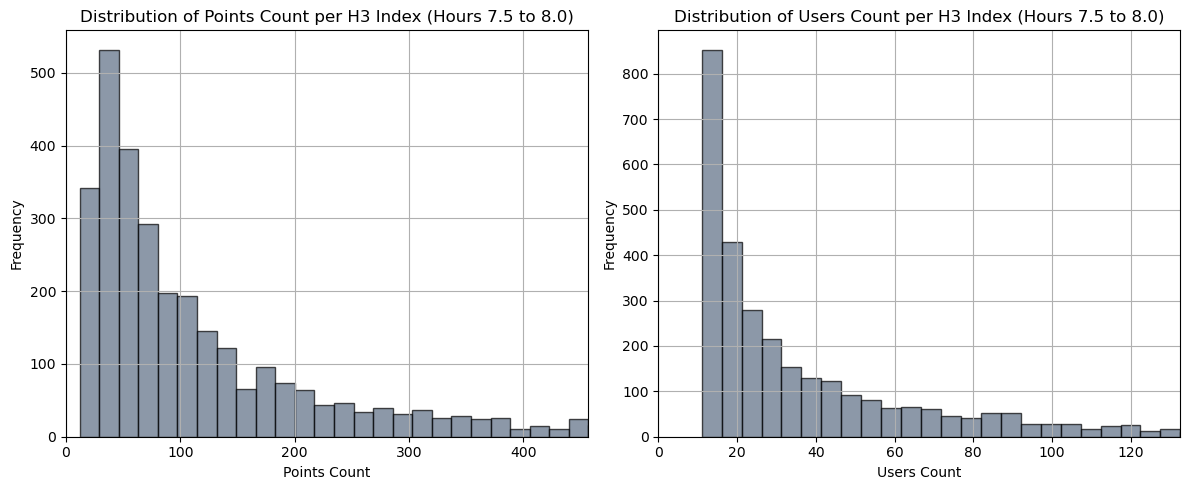

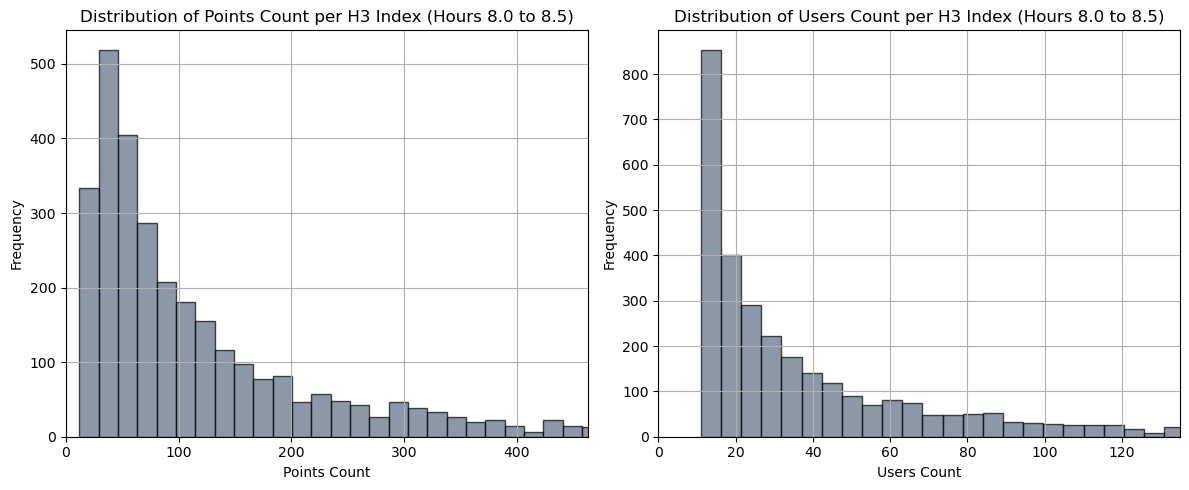

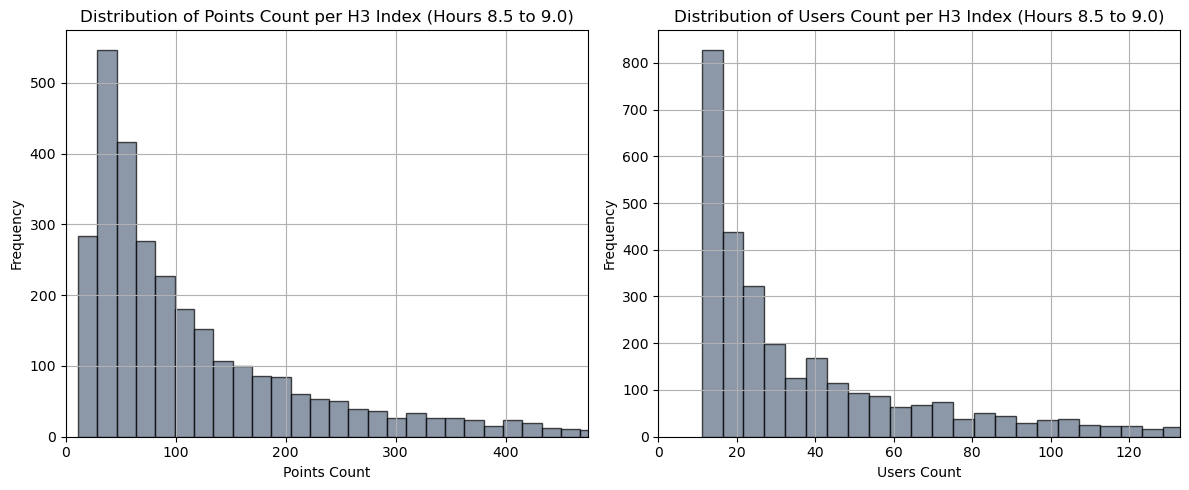

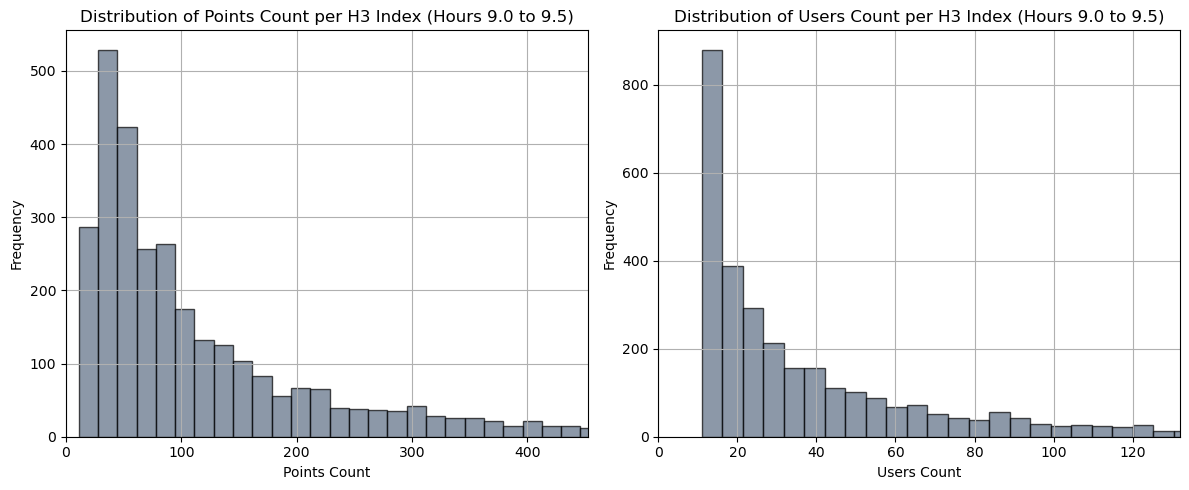

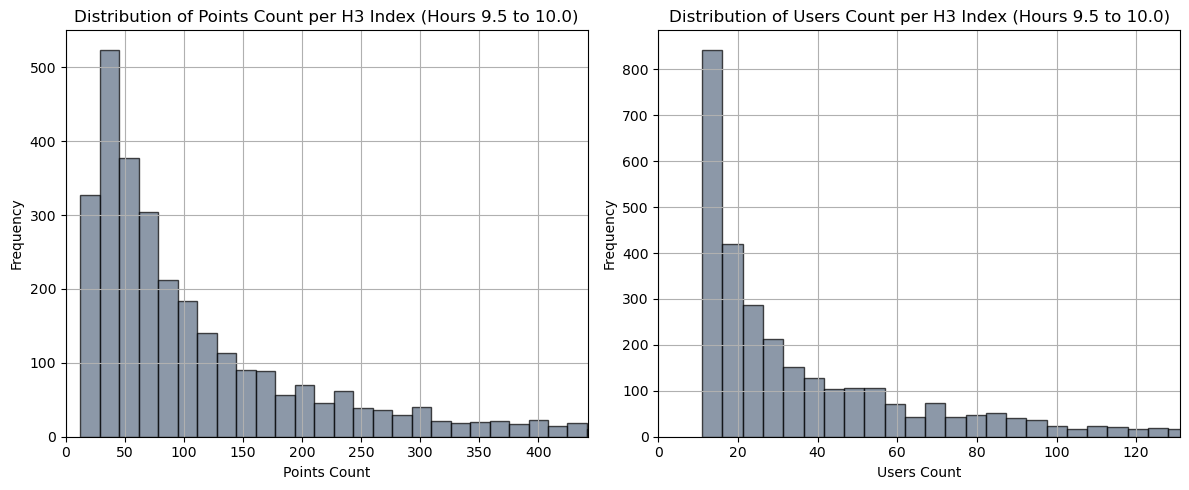

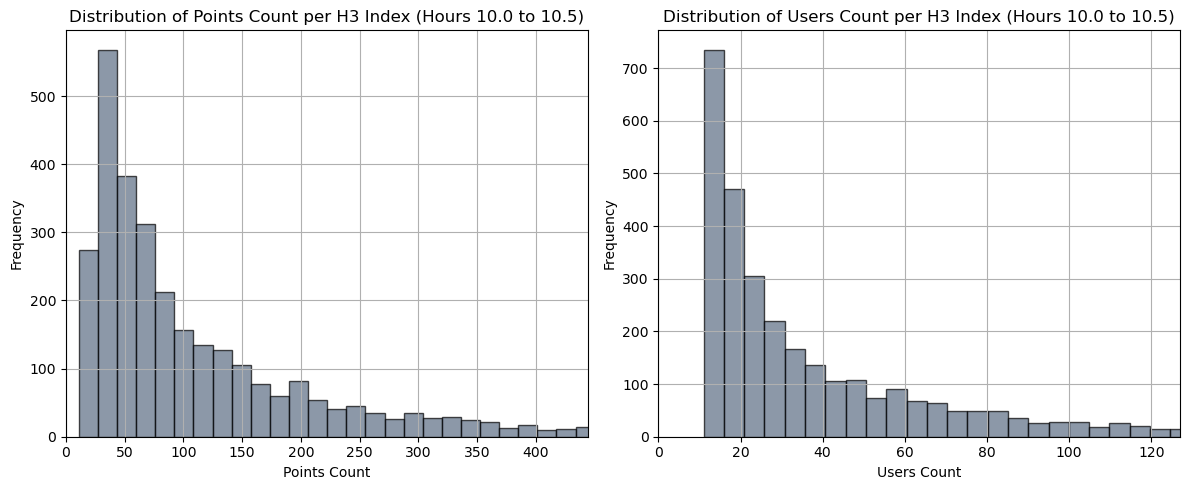

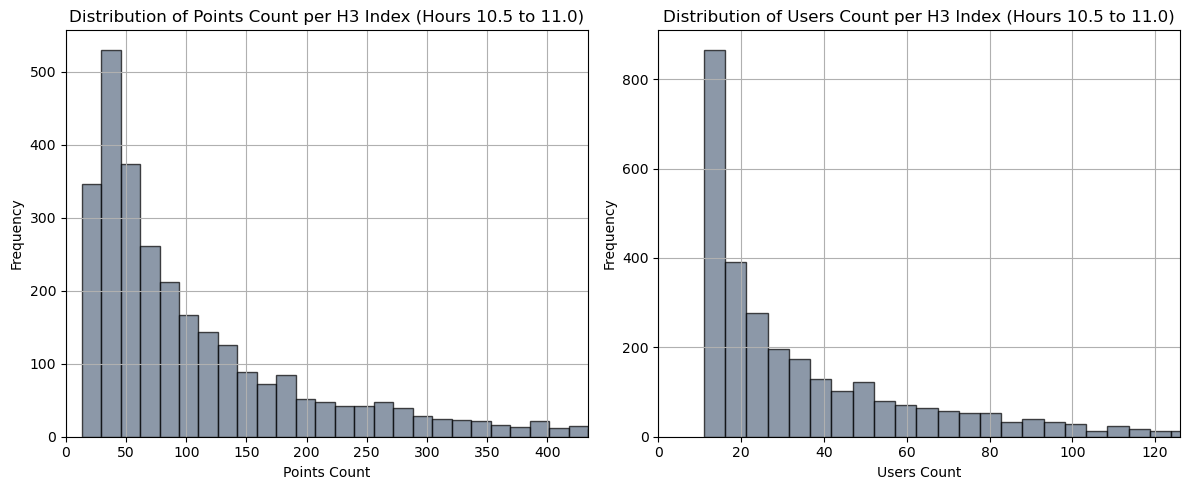

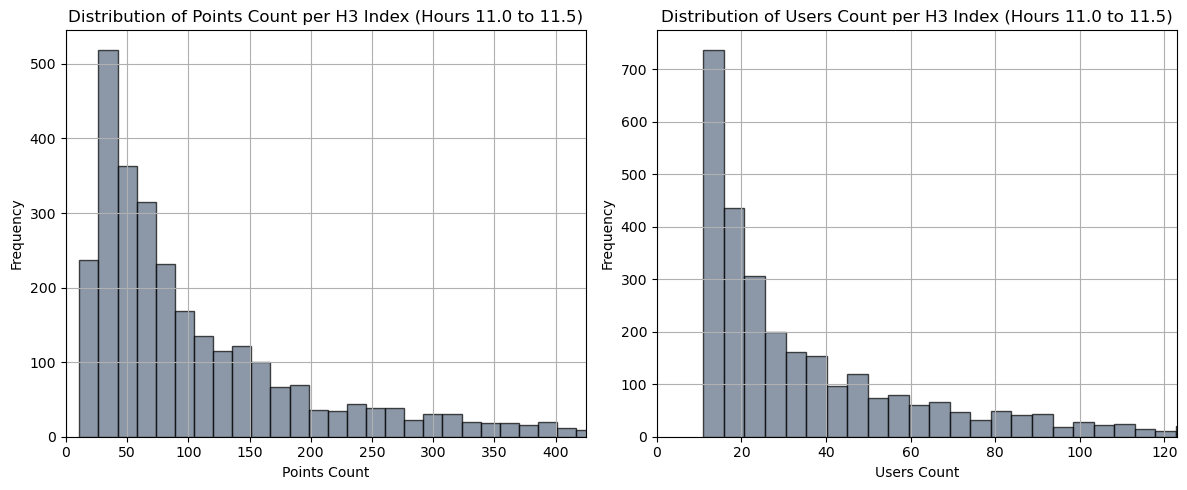

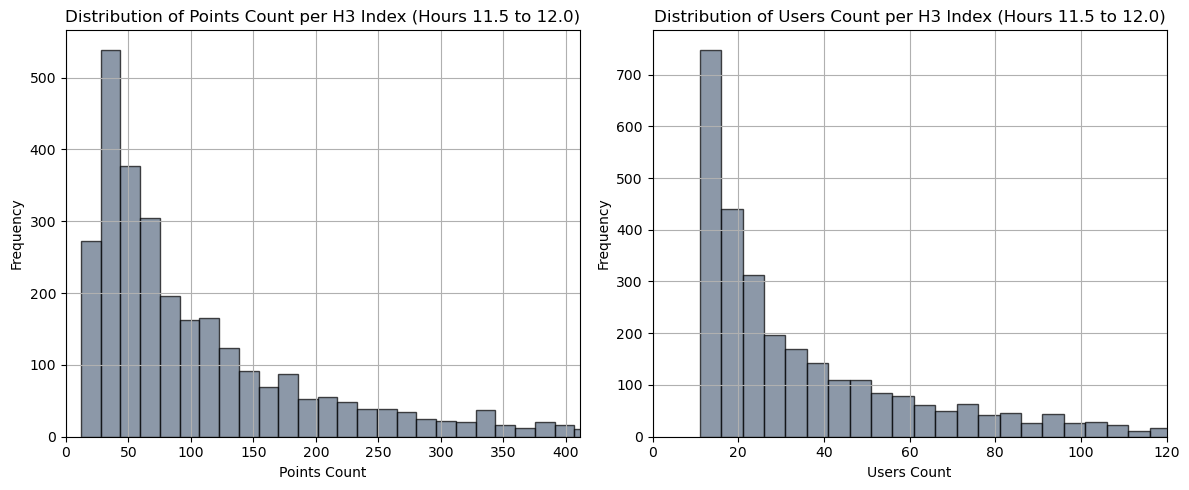

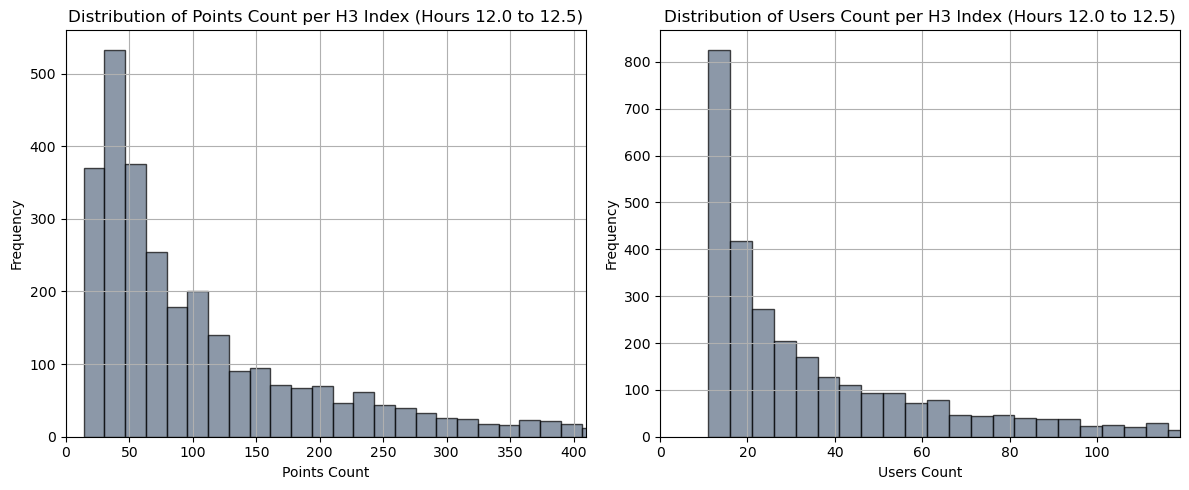

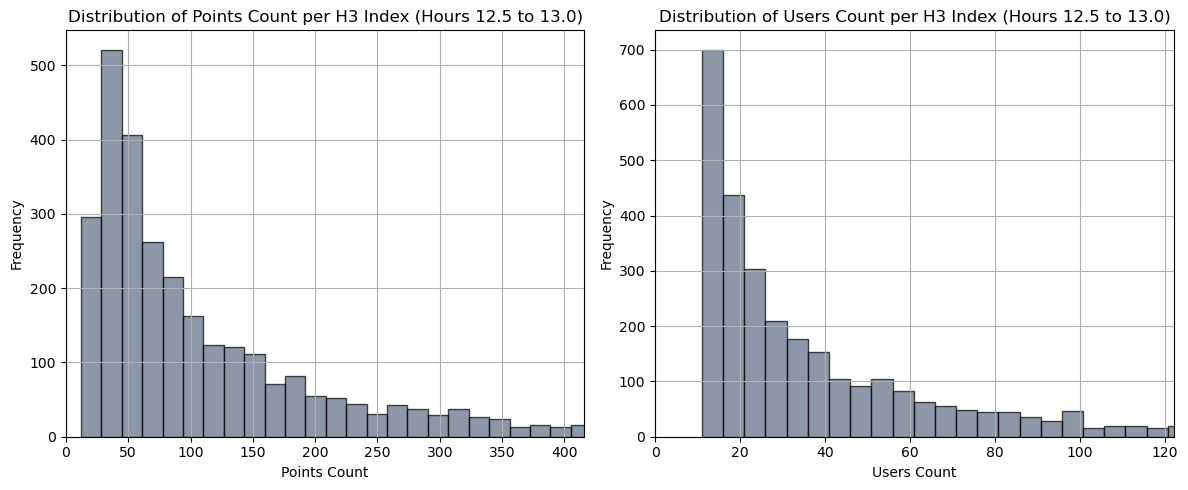

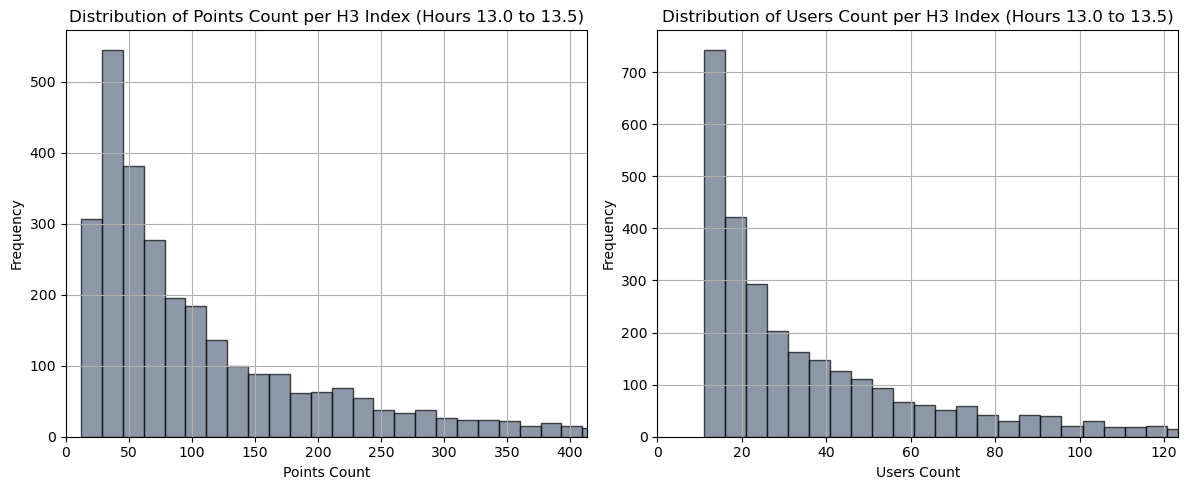

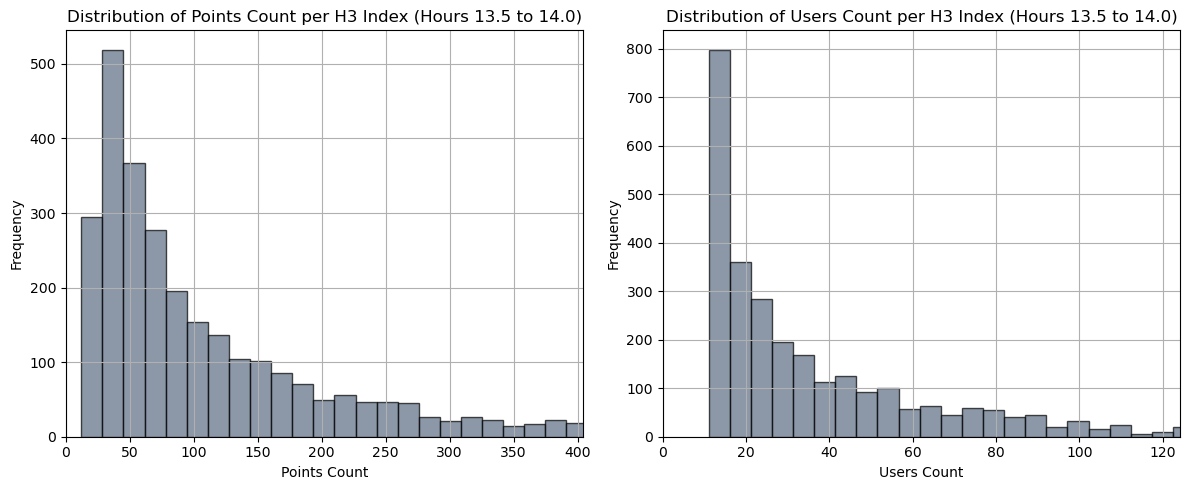

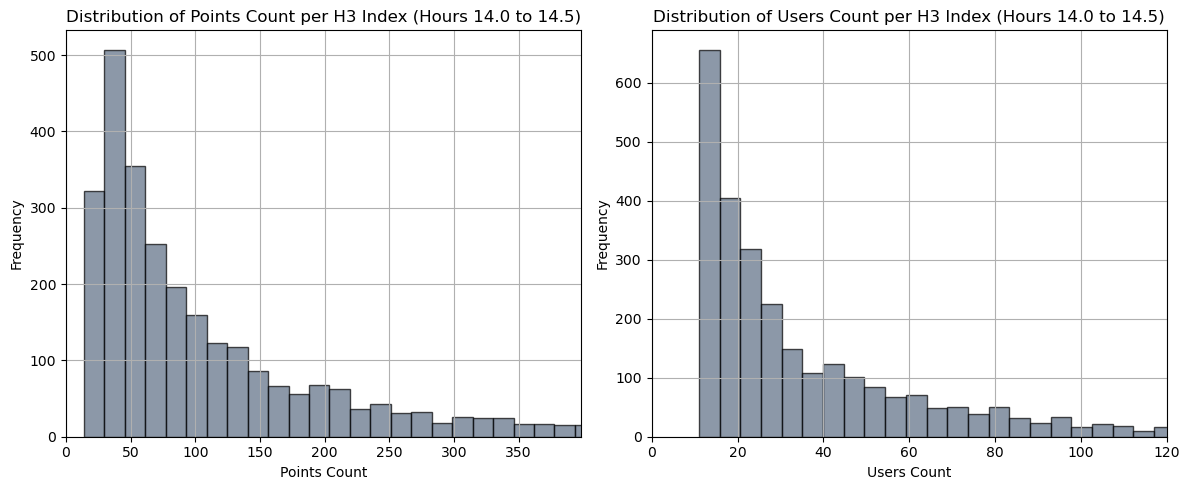

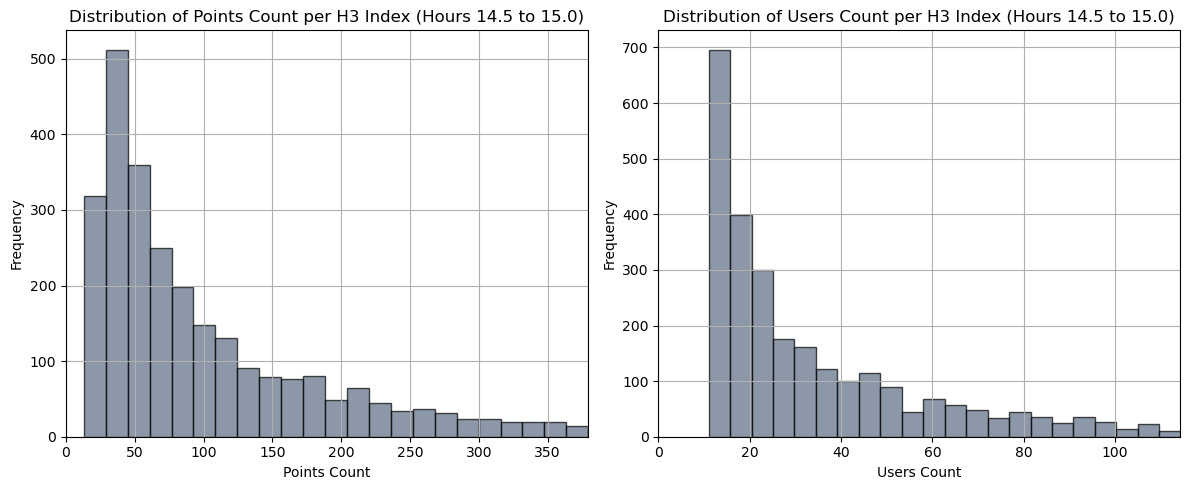

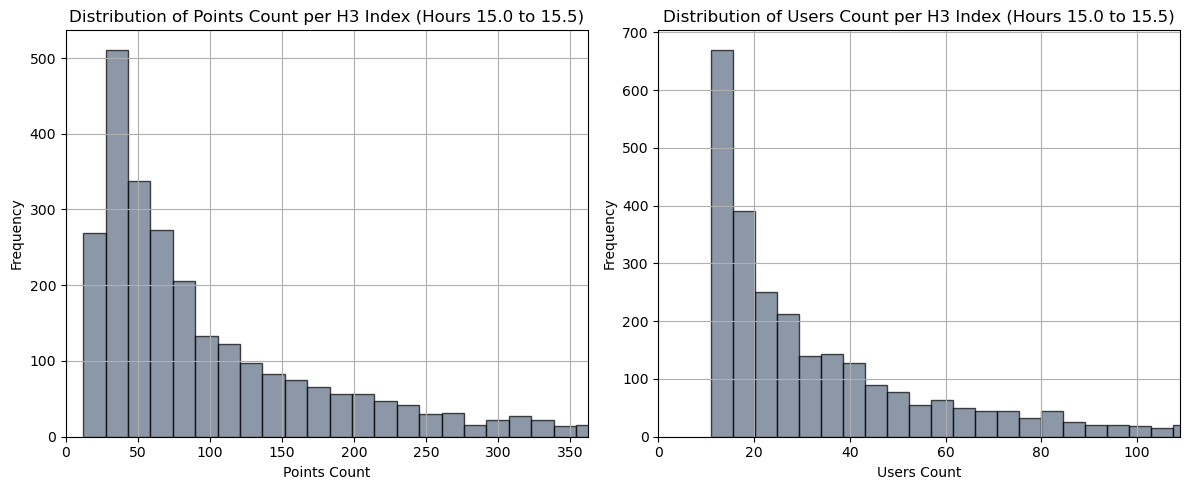

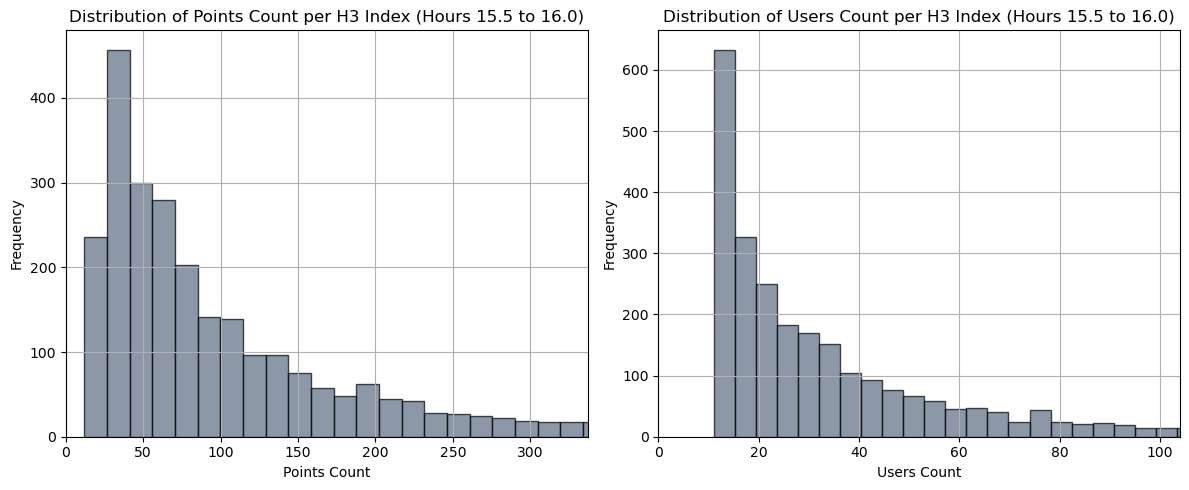

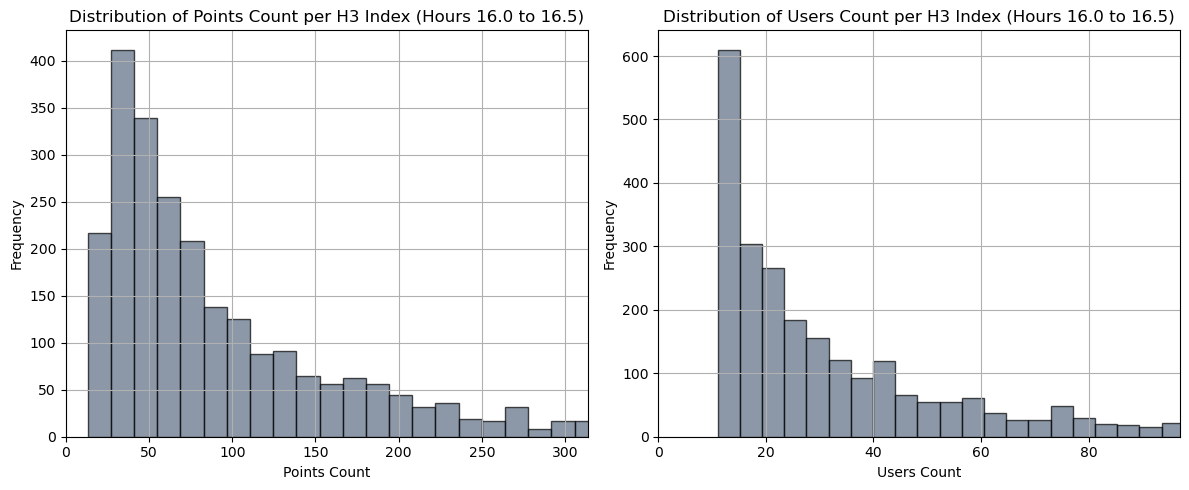

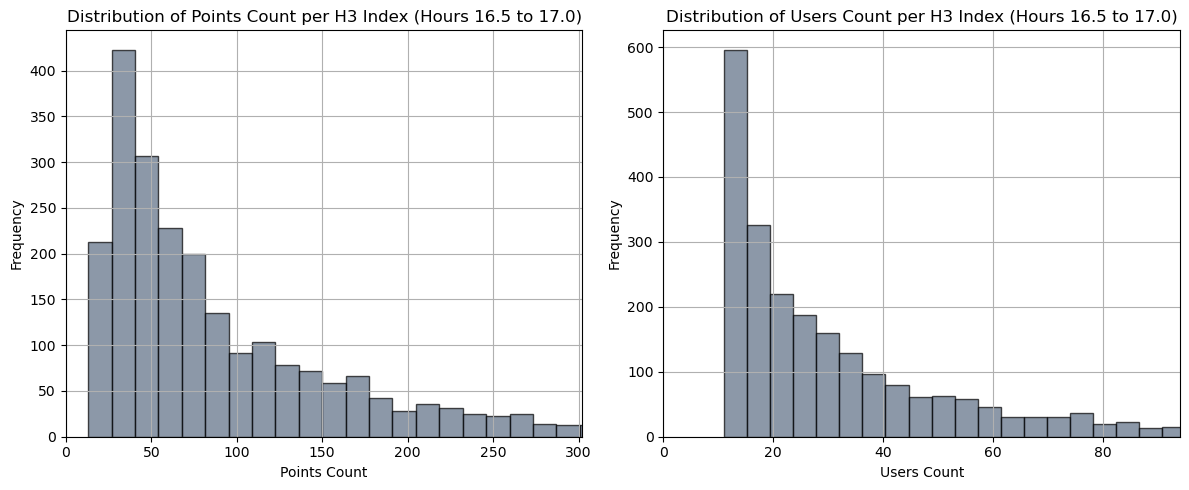

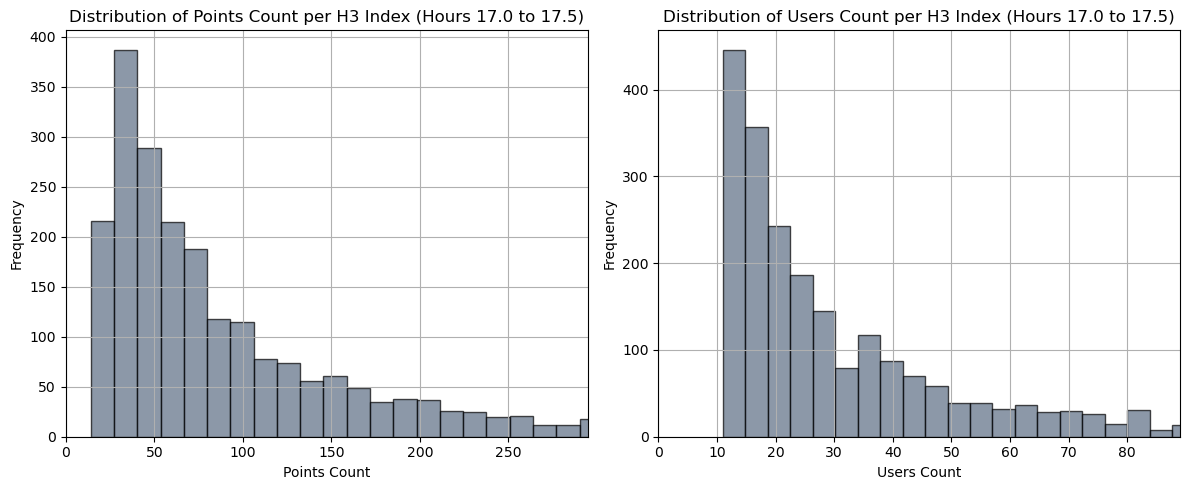

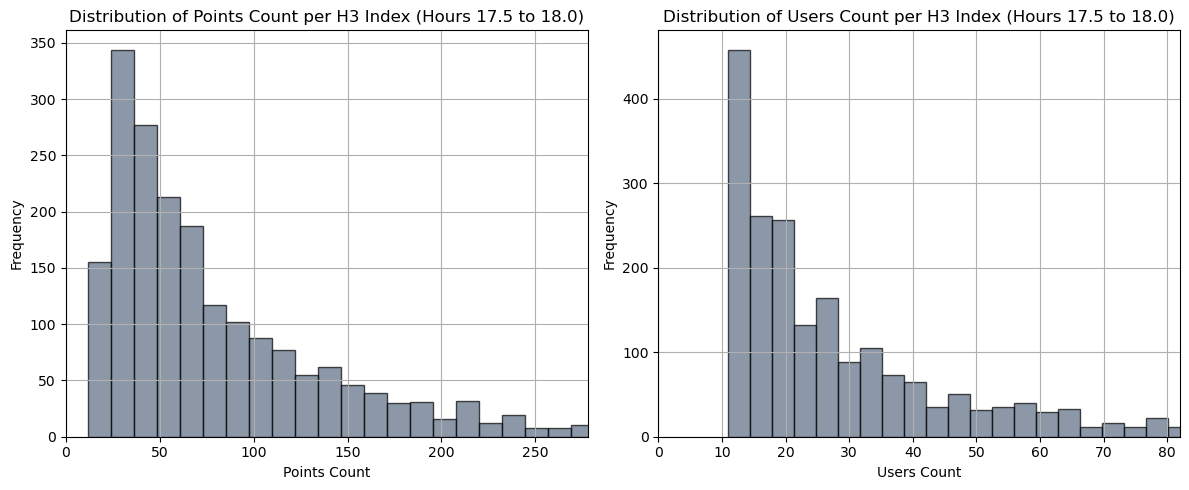

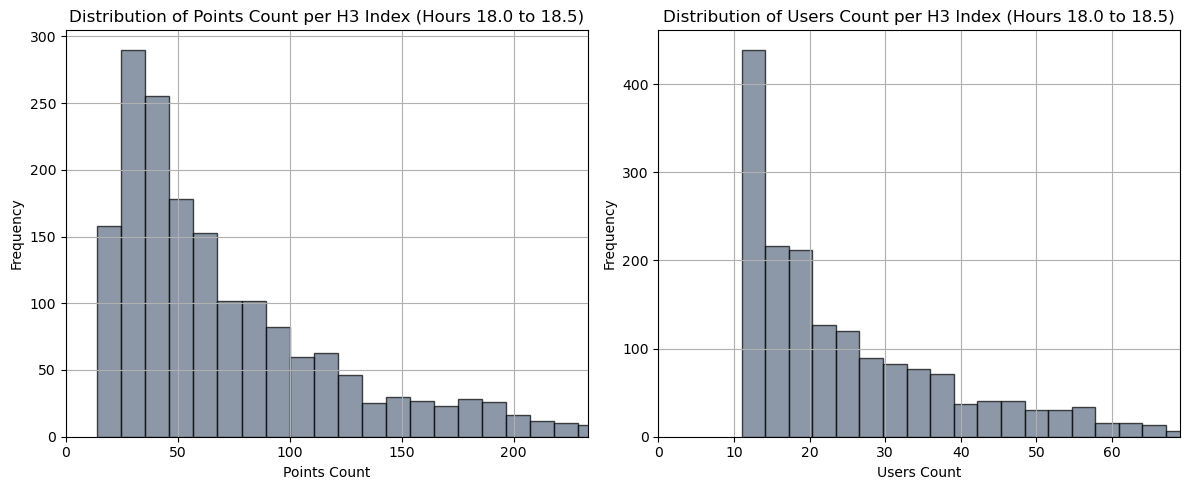

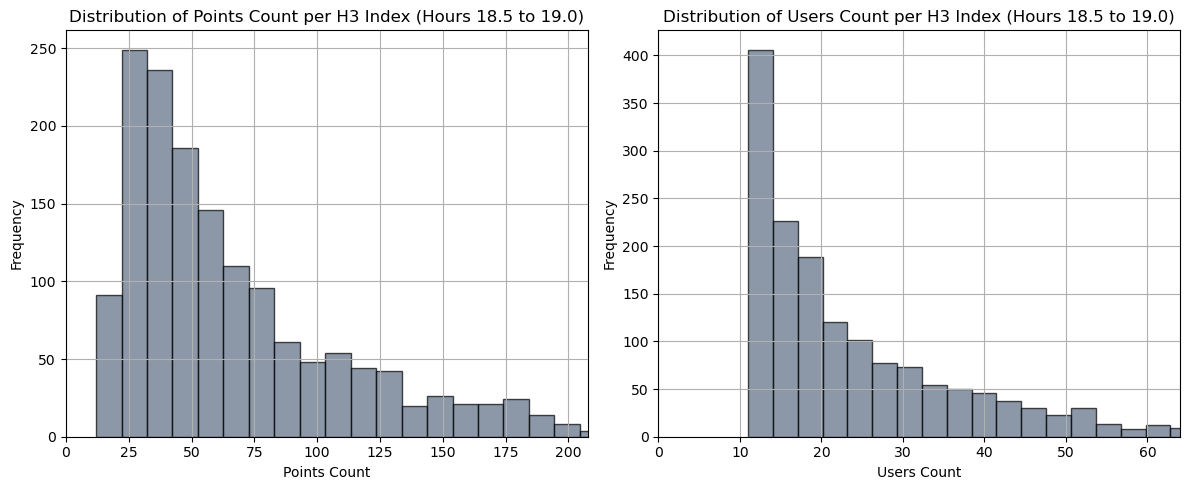

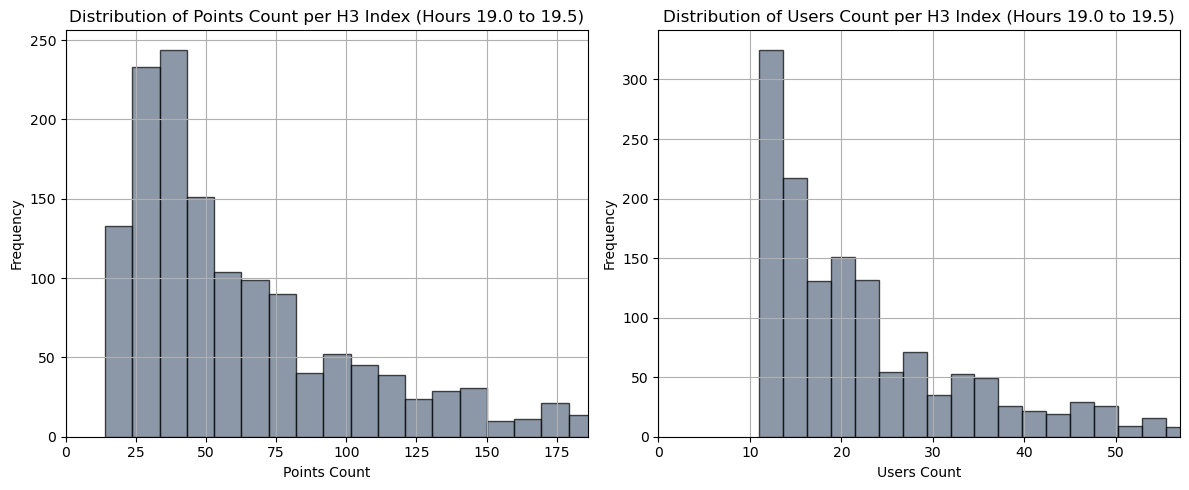

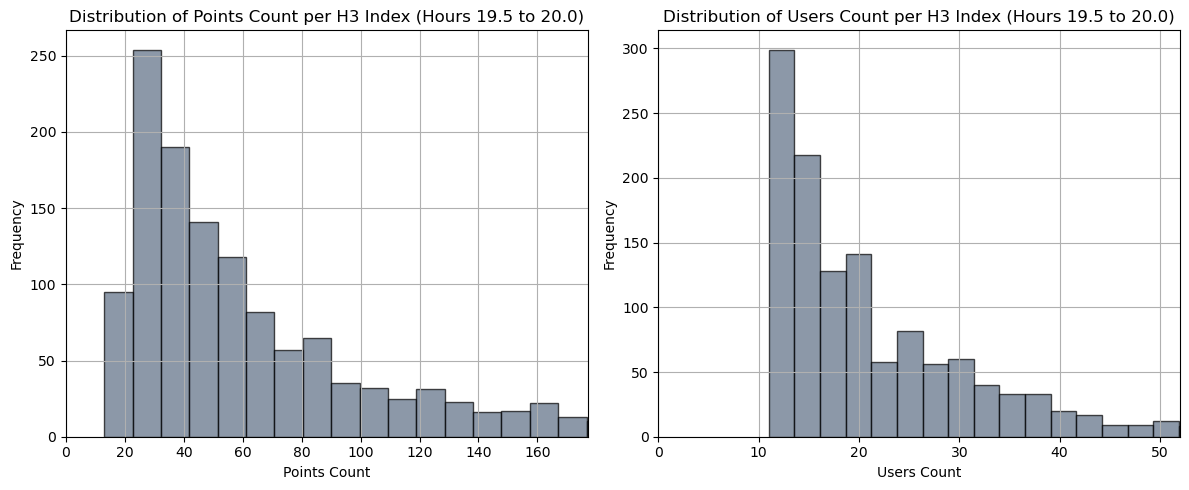

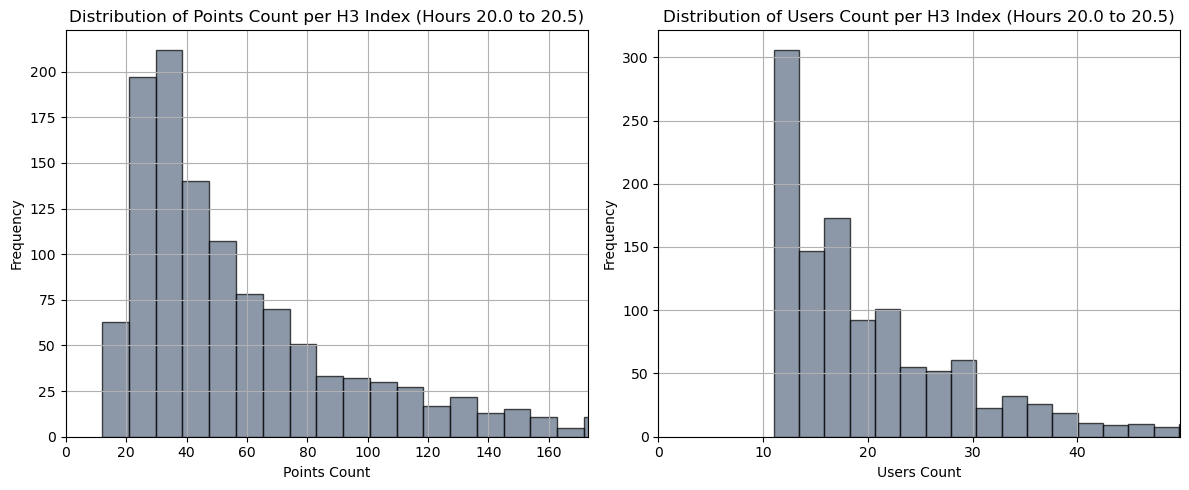

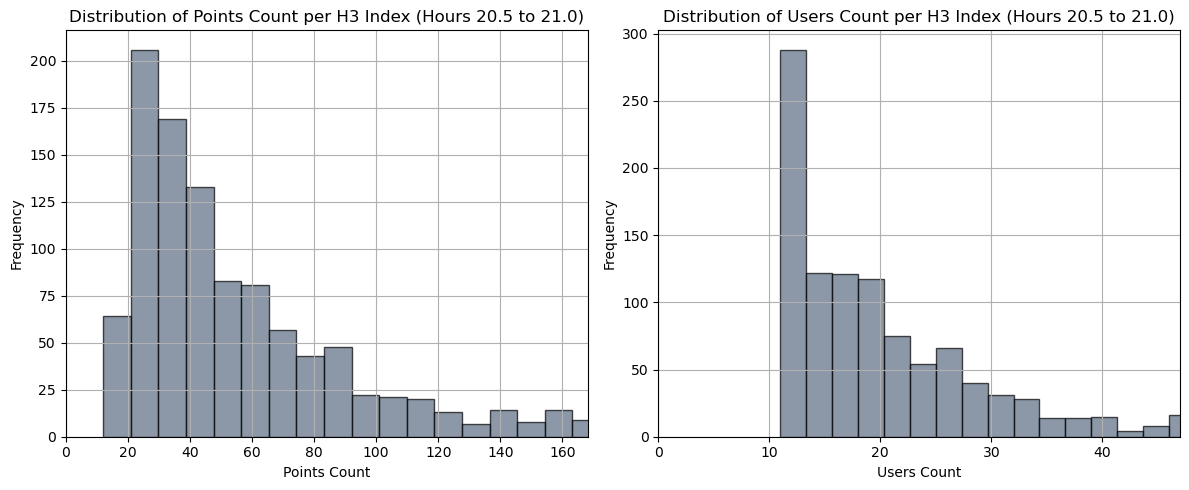

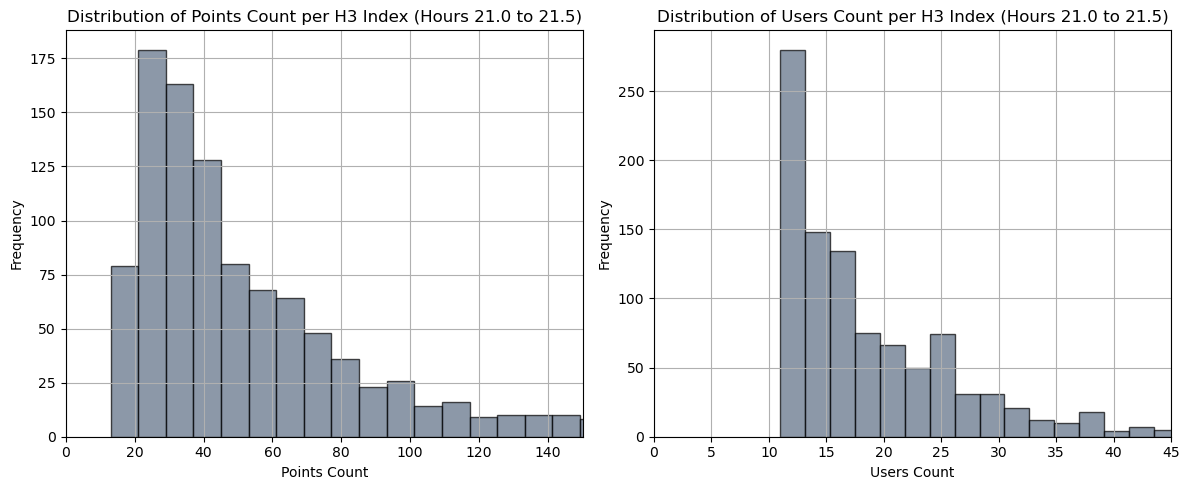

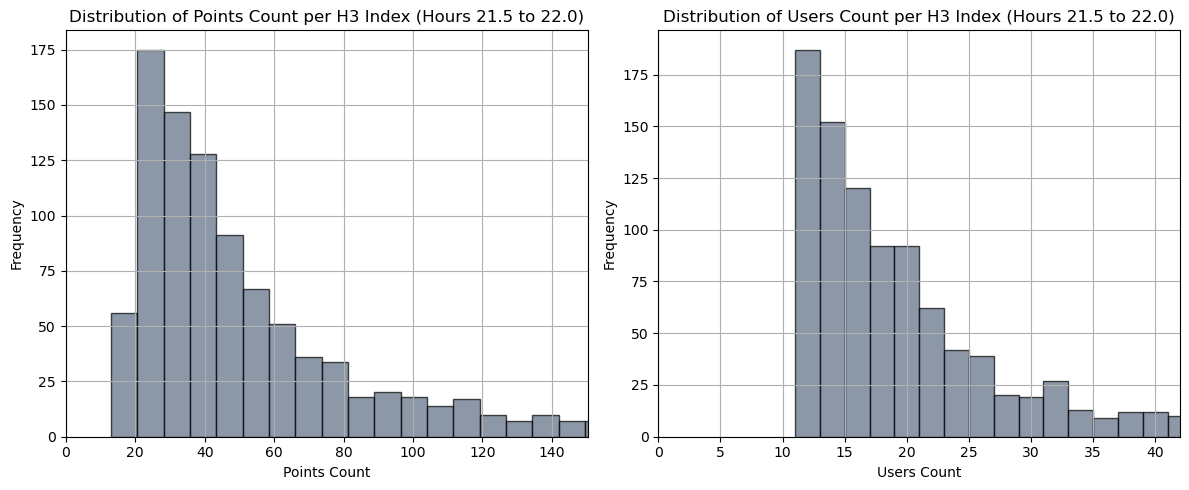

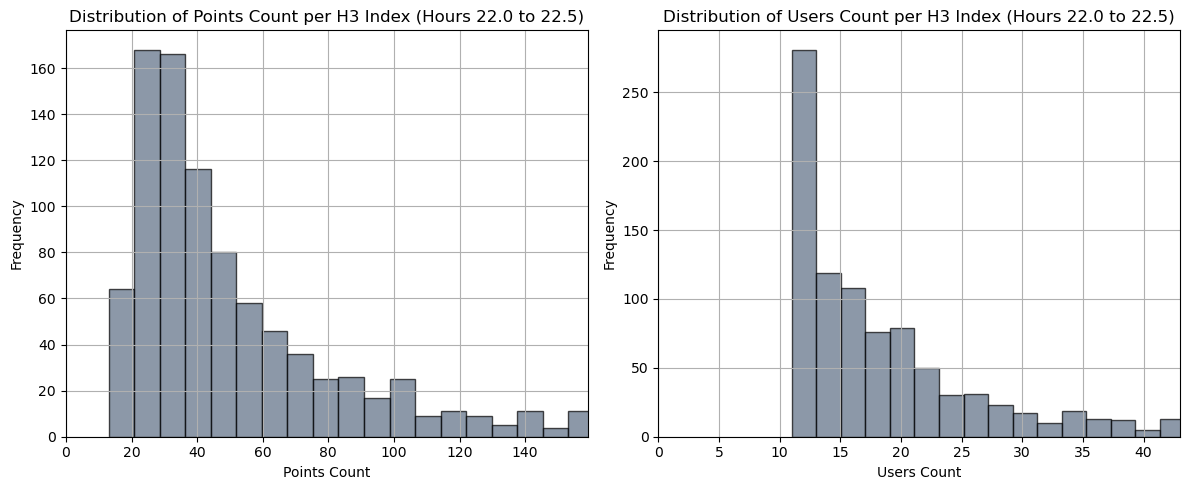

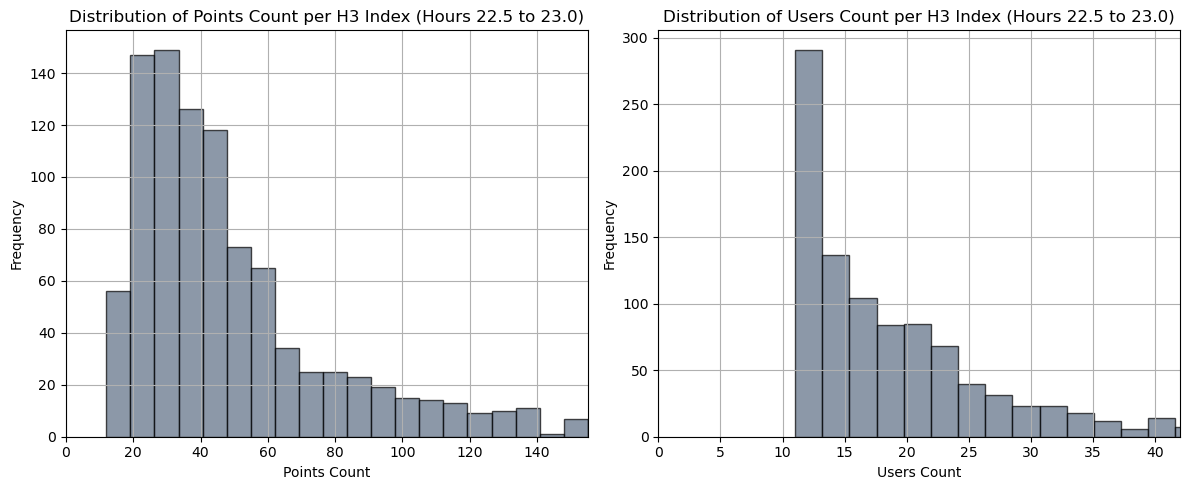

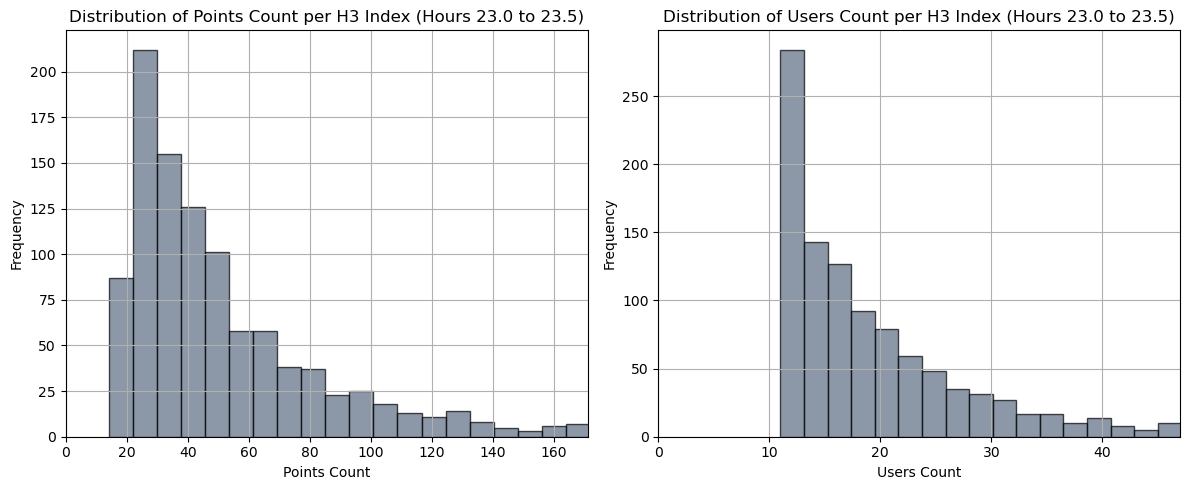

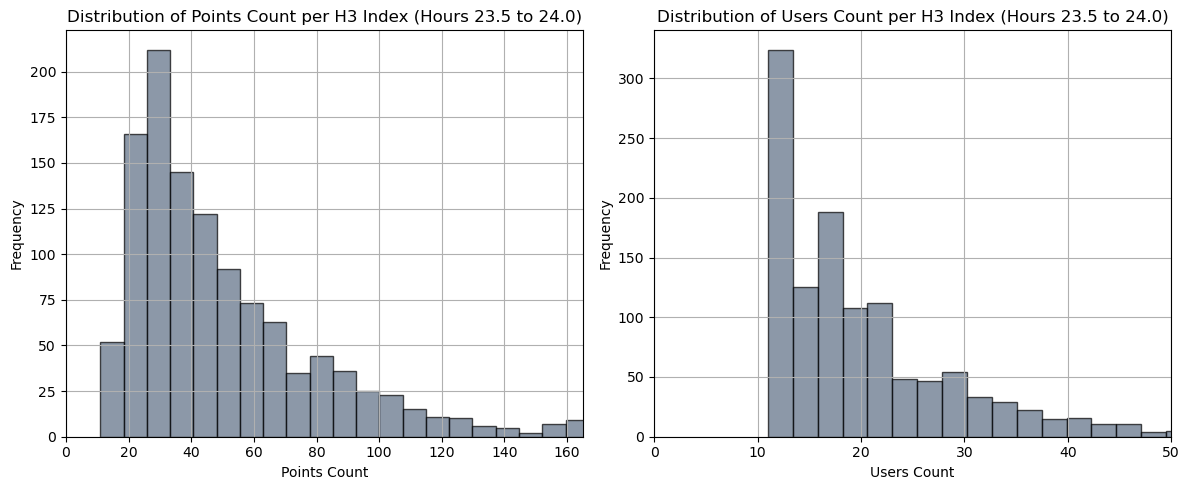

In [8]:
# Example usage
date = 20190105  
chosen_country_code = 'MX' 
color = '#5c6c84'  
aggregation_hours = 0.5  # Replace with desired aggregation hours (0.25, 0.5, 1, 2, 3, 4, 6, 8, or 24)

process_and_plot(chosen_country_code, date, color, aggregation_hours)

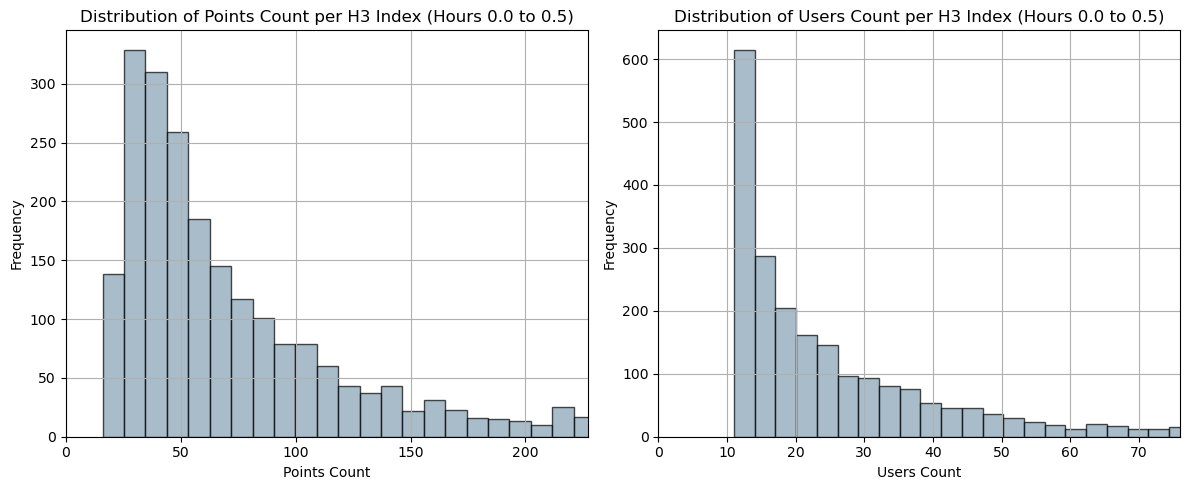

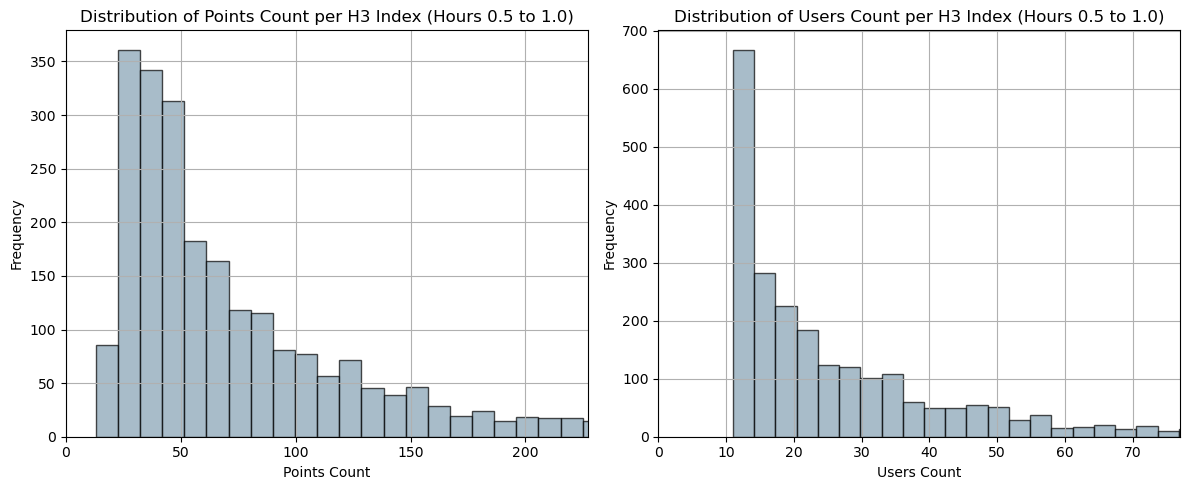

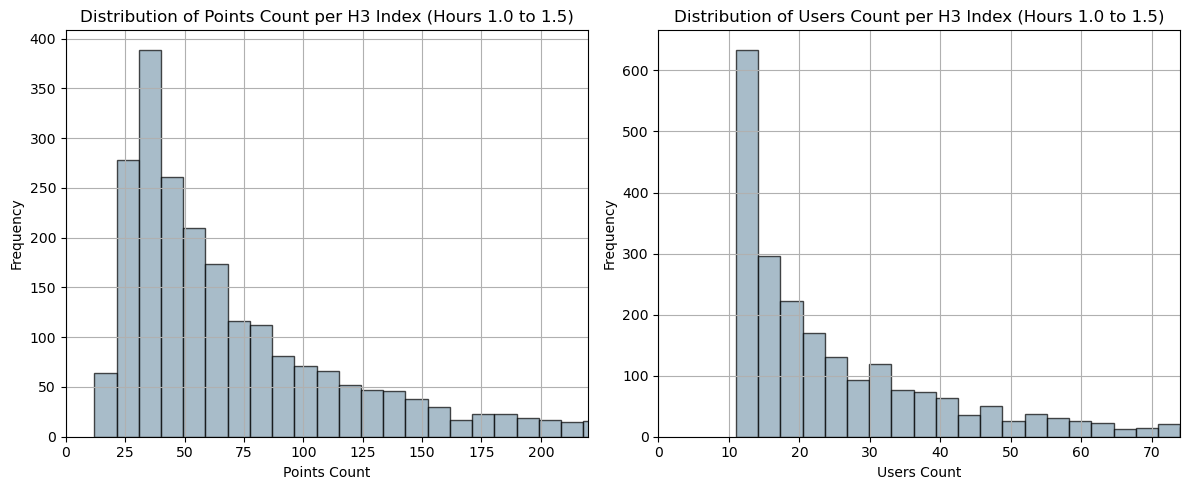

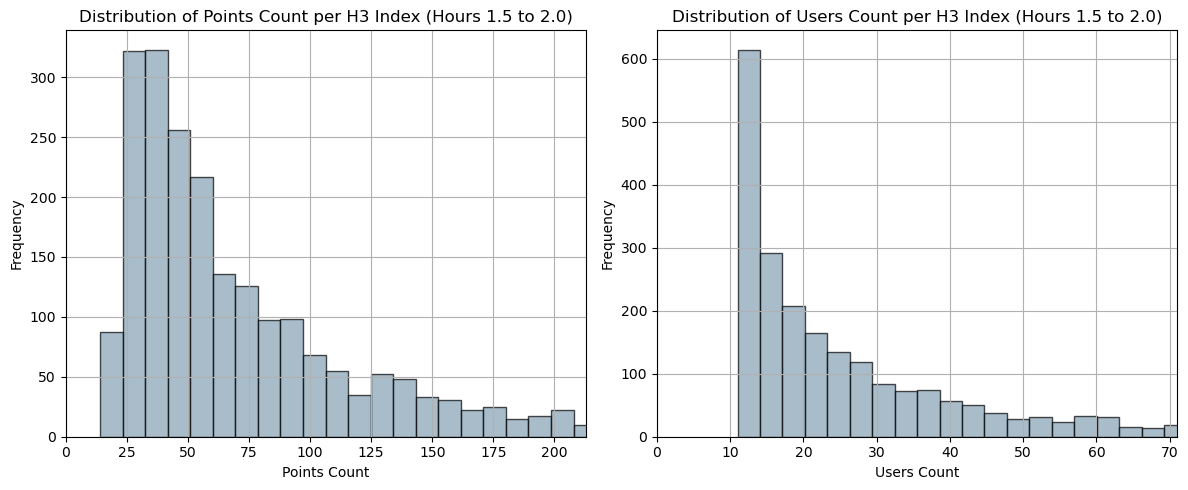

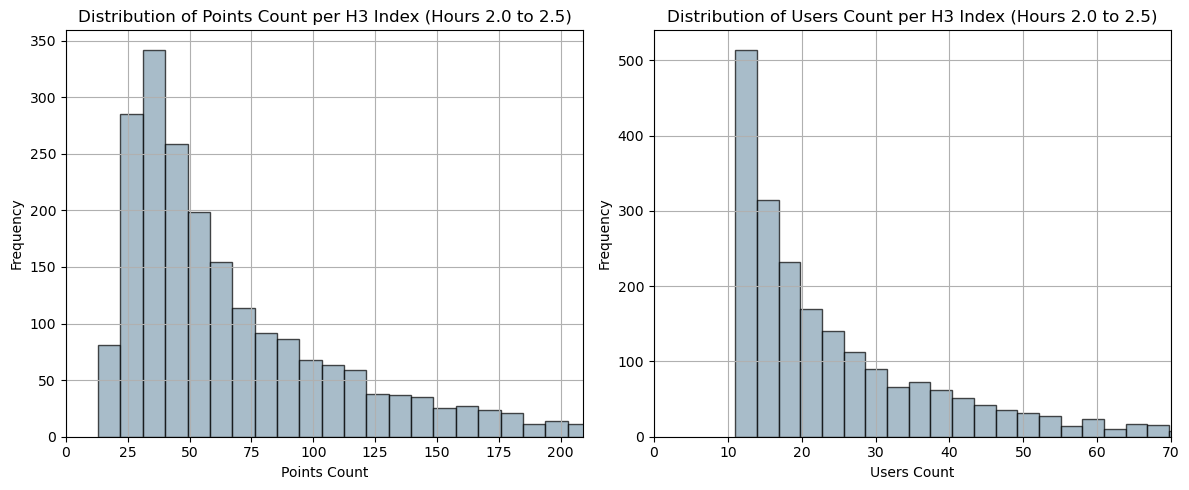

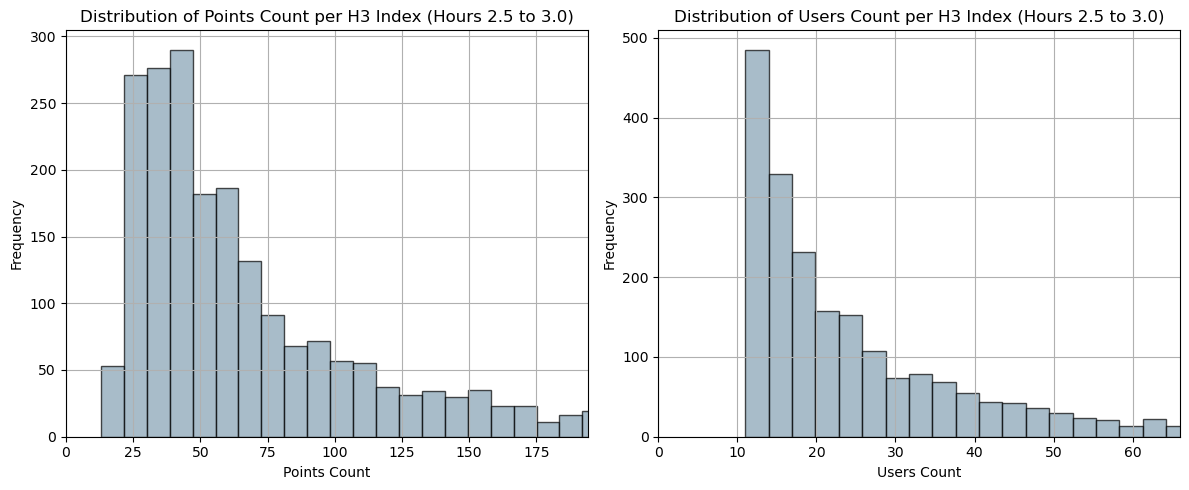

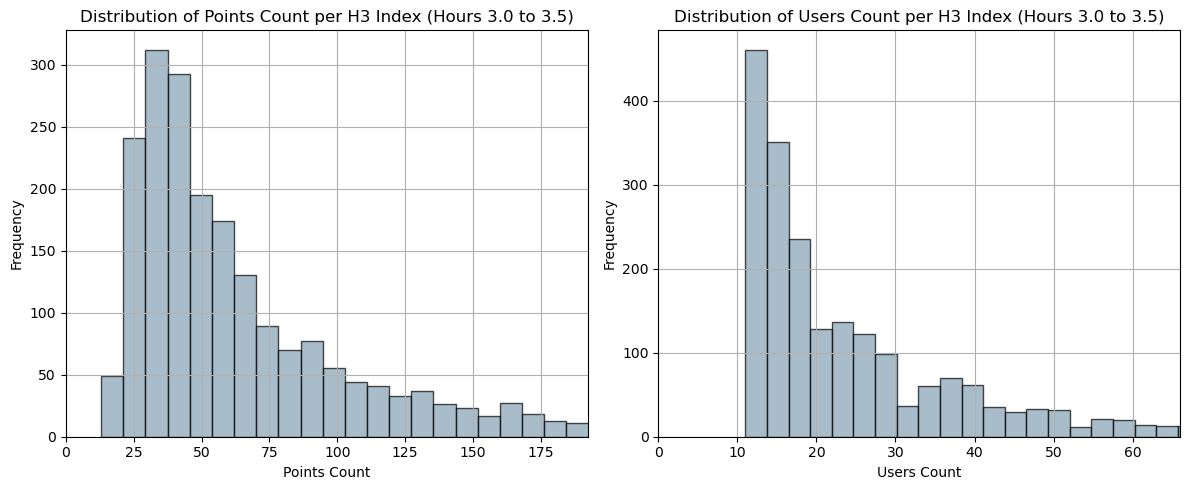

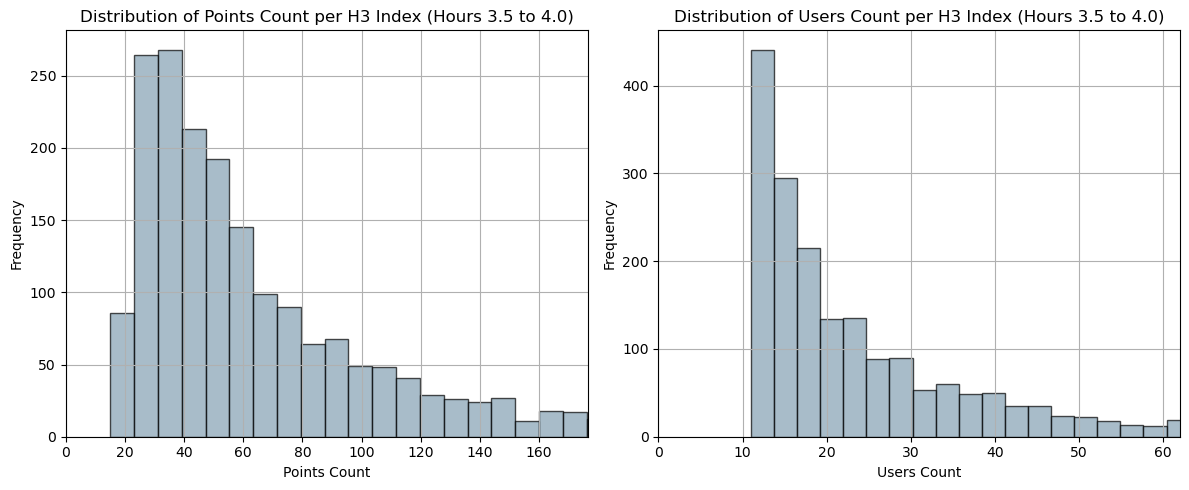

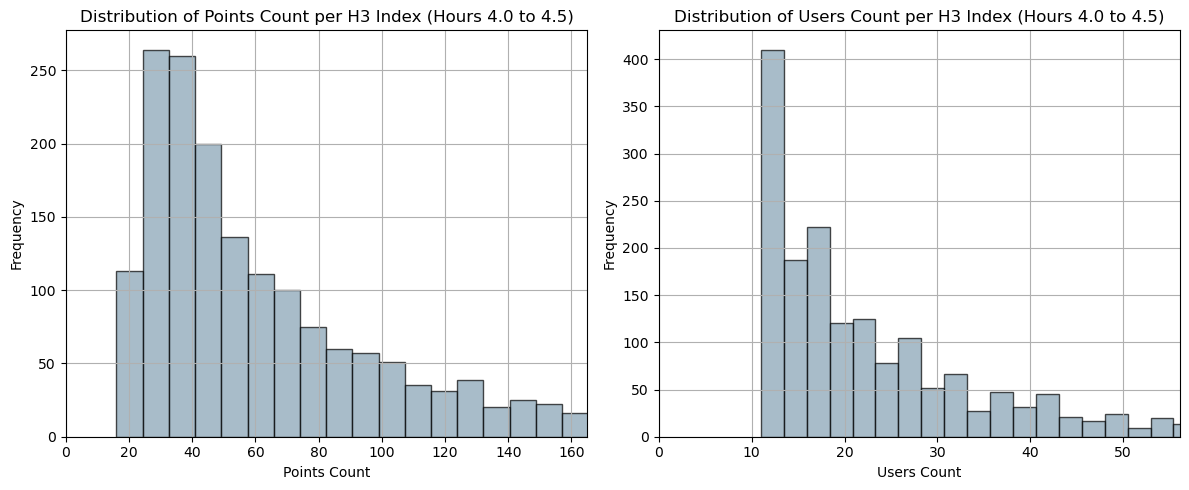

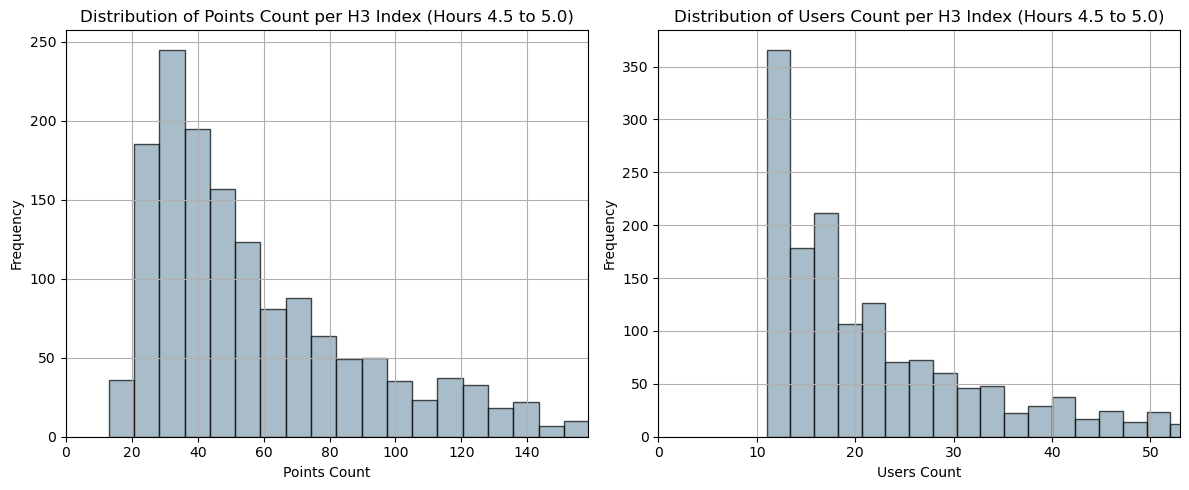

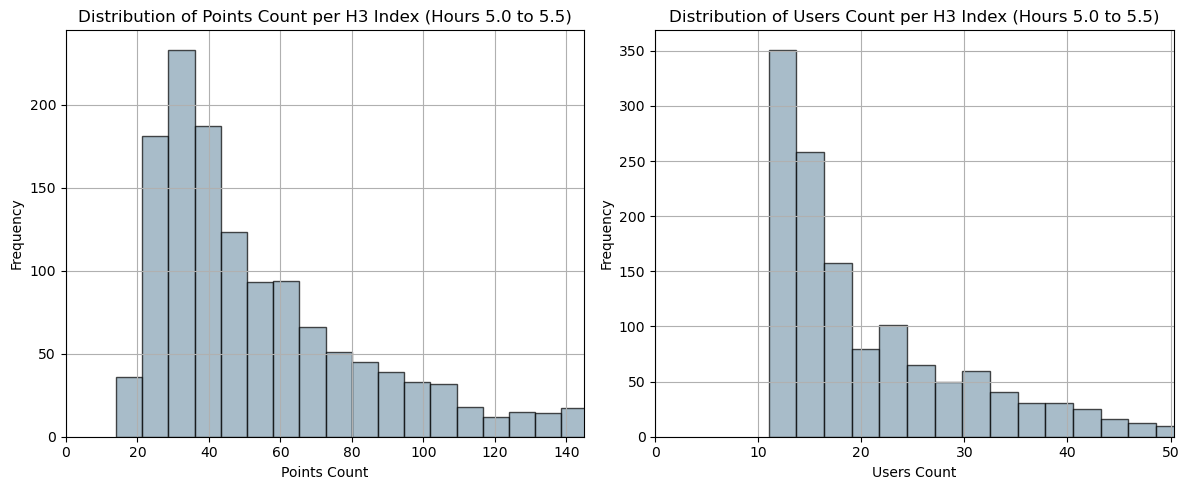

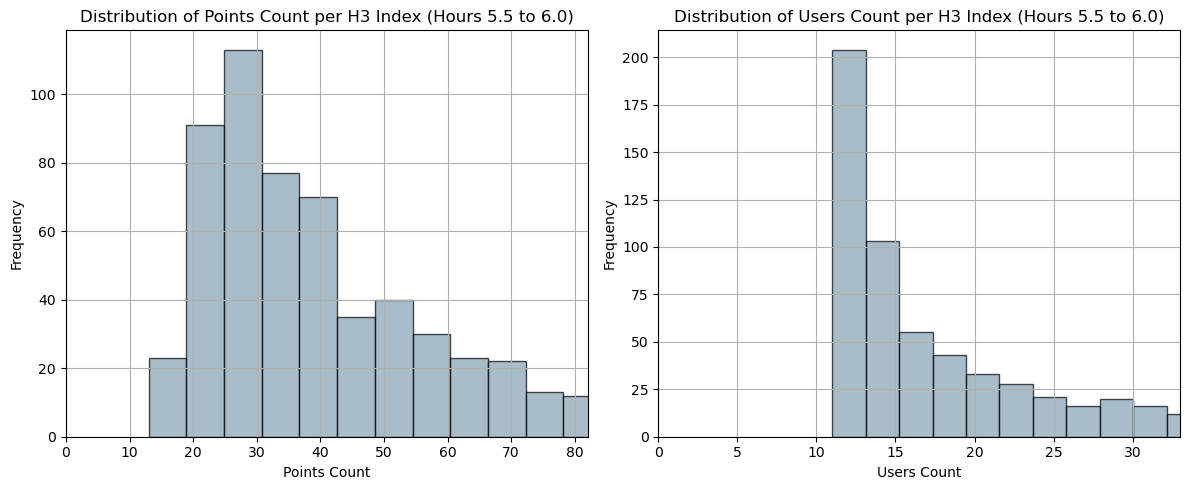

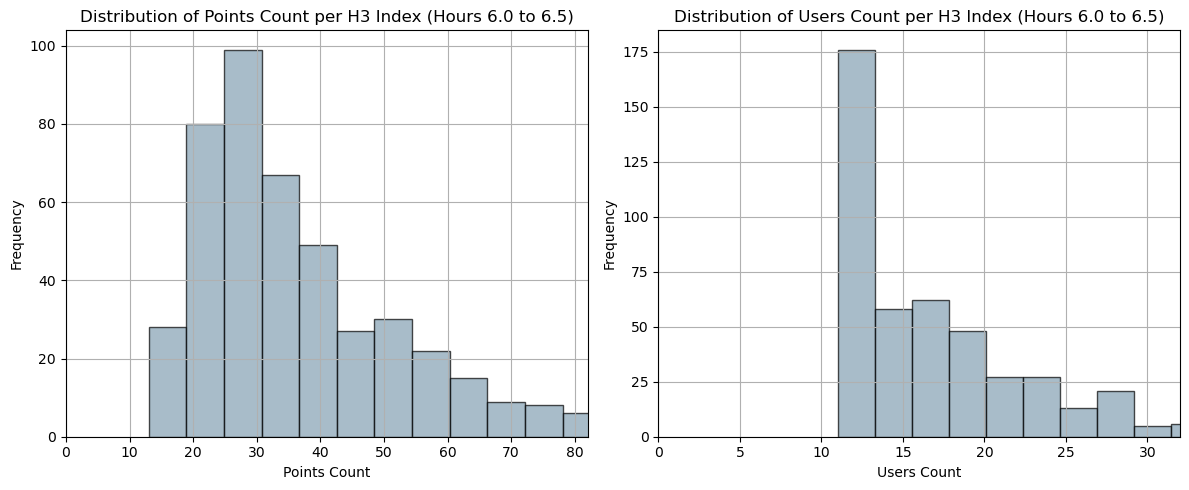

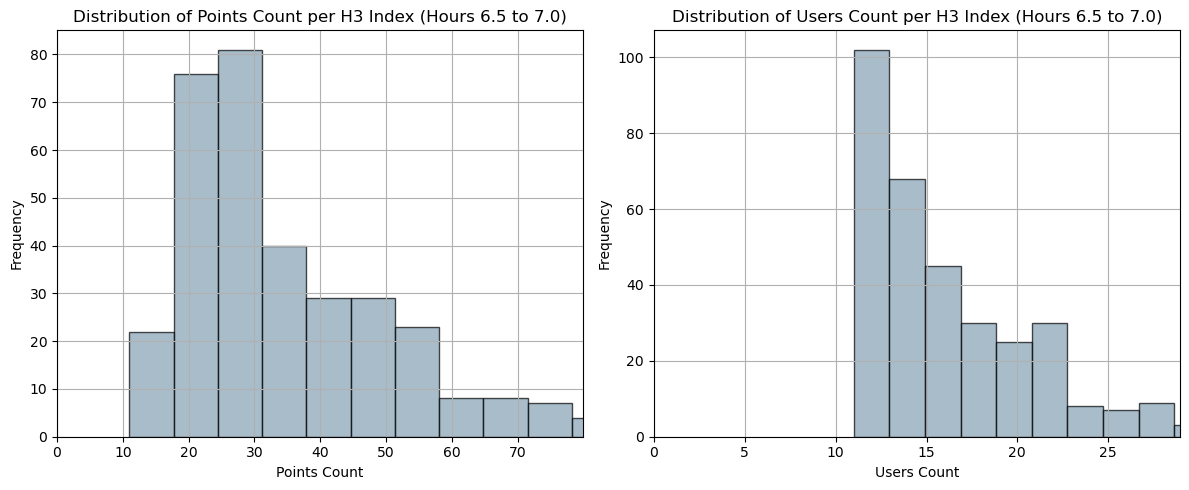

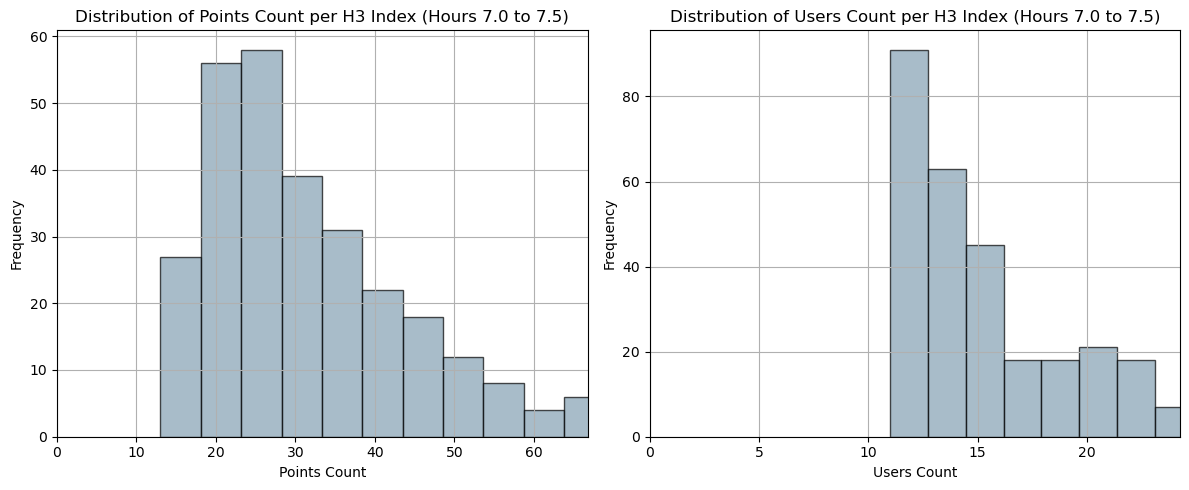

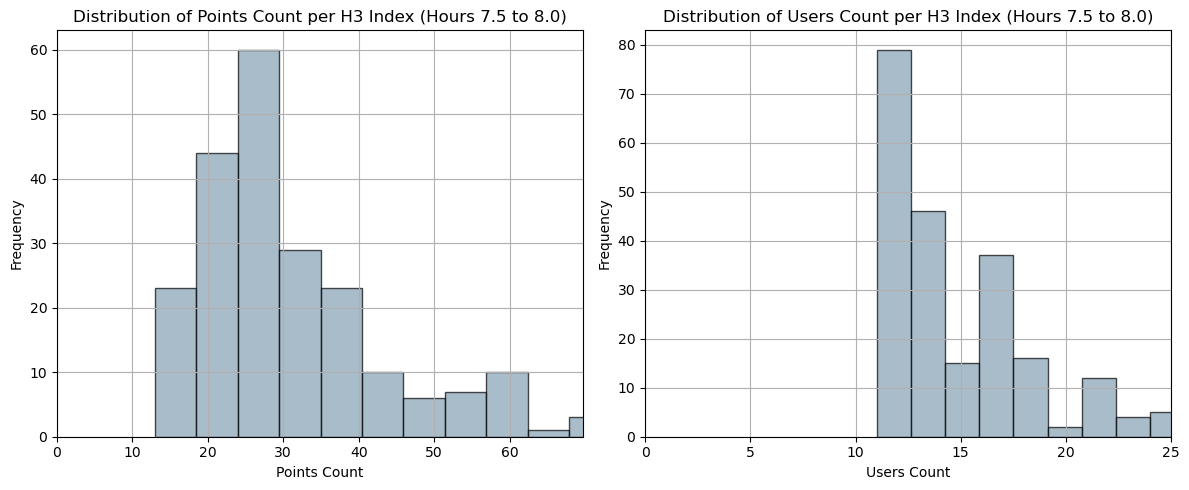

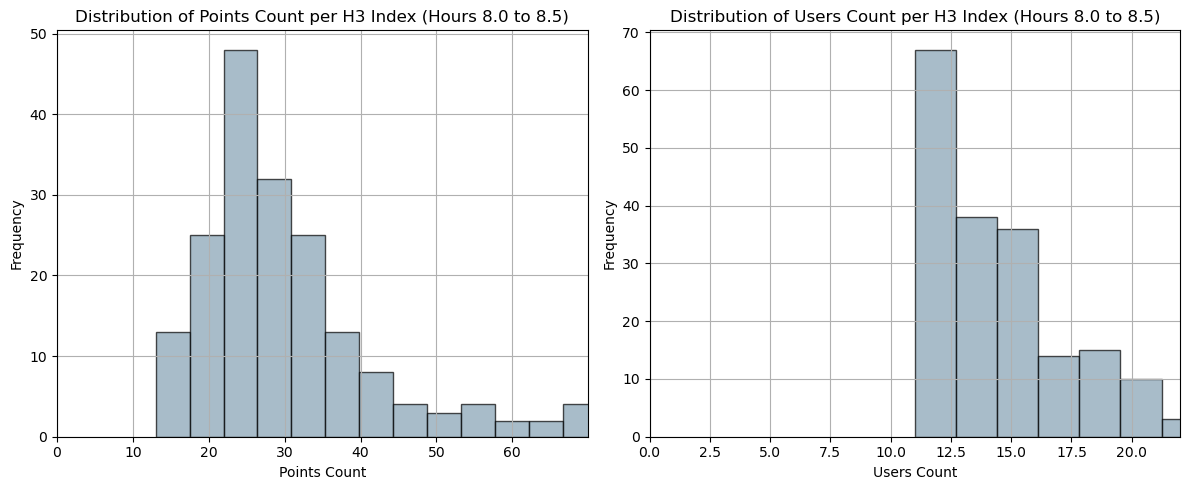

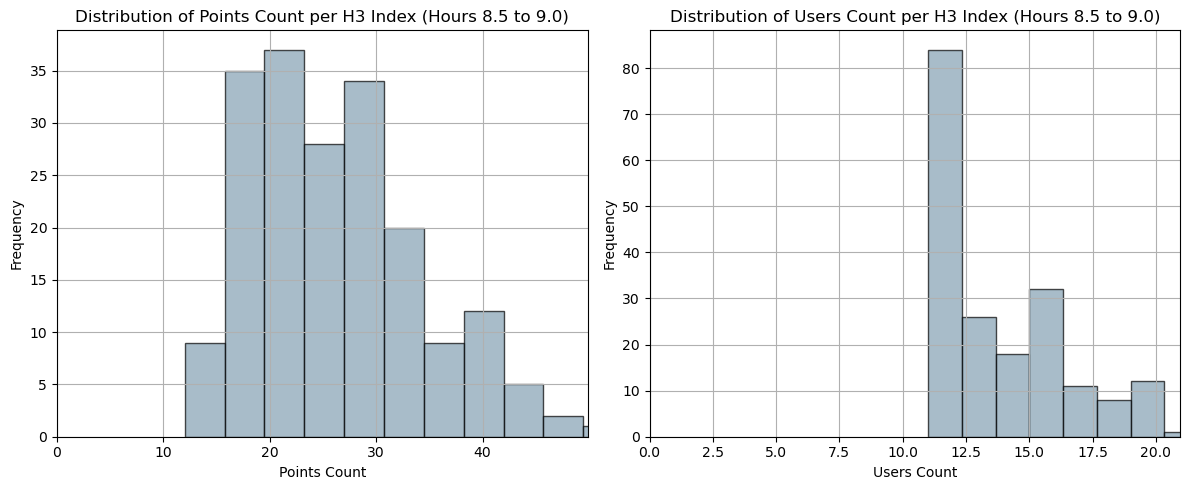

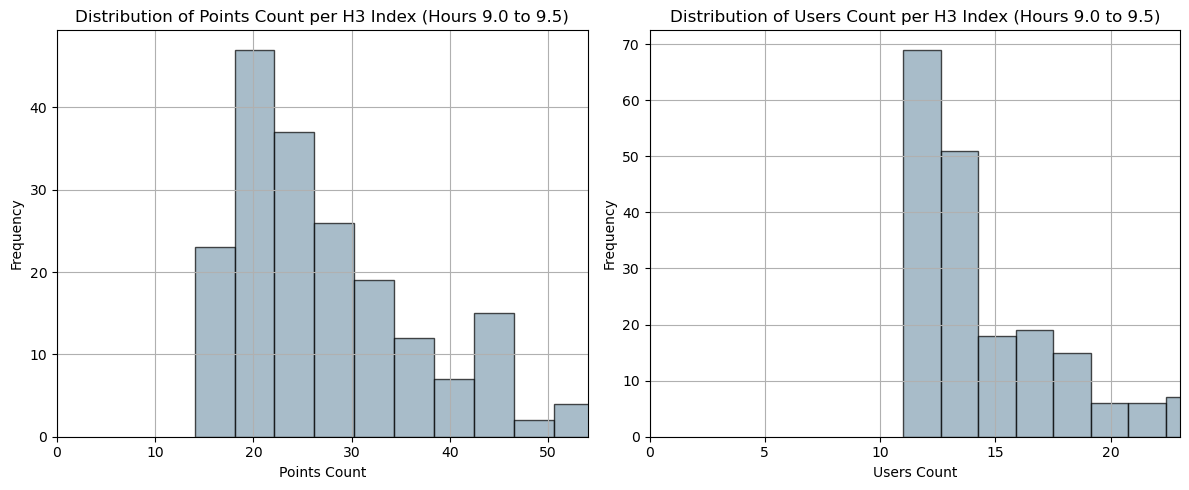

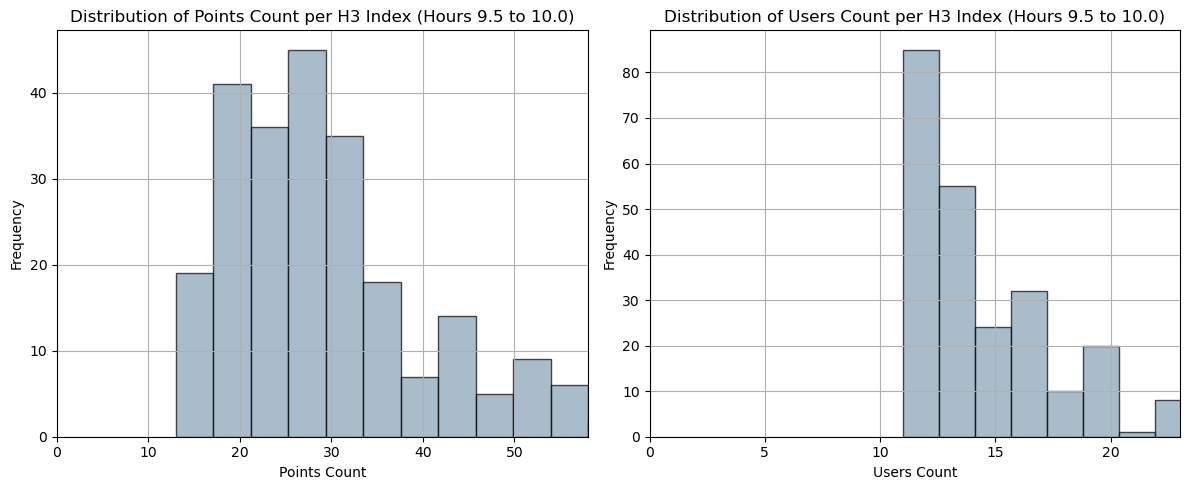

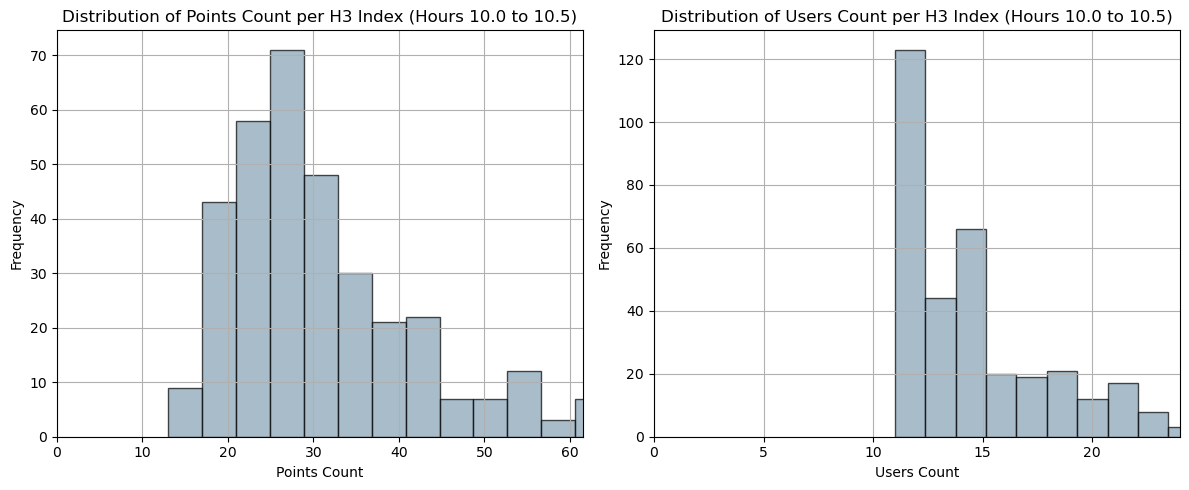

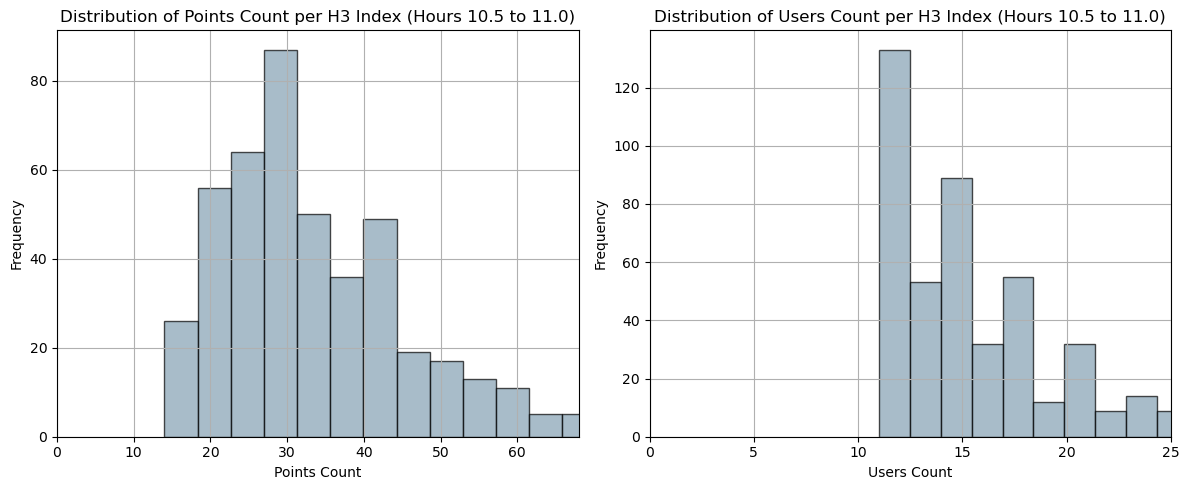

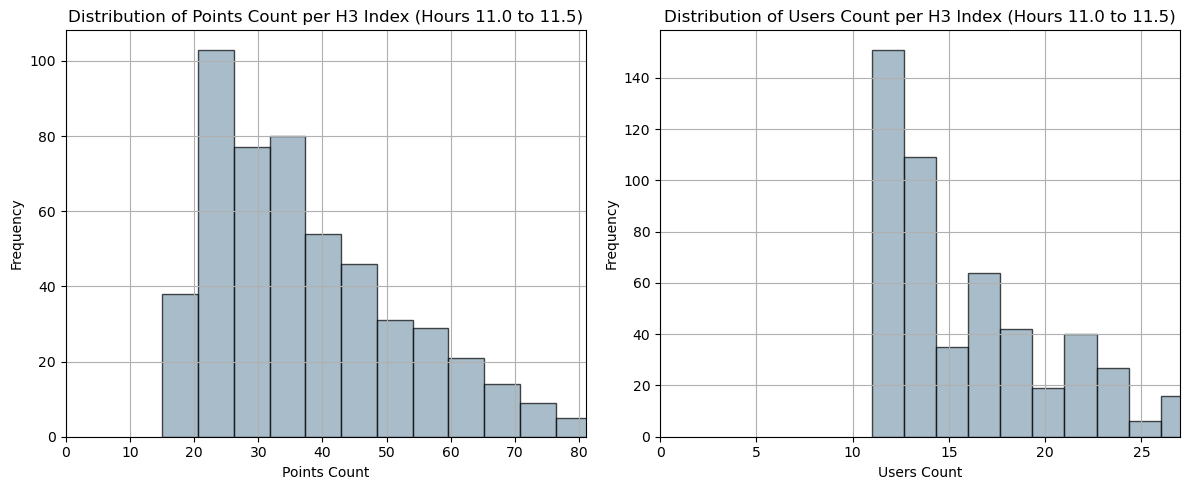

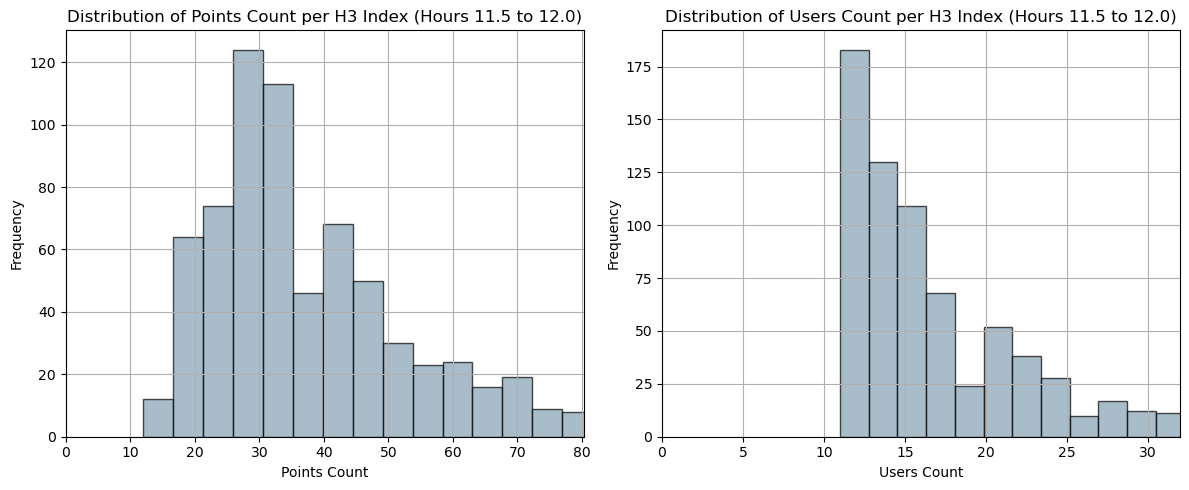

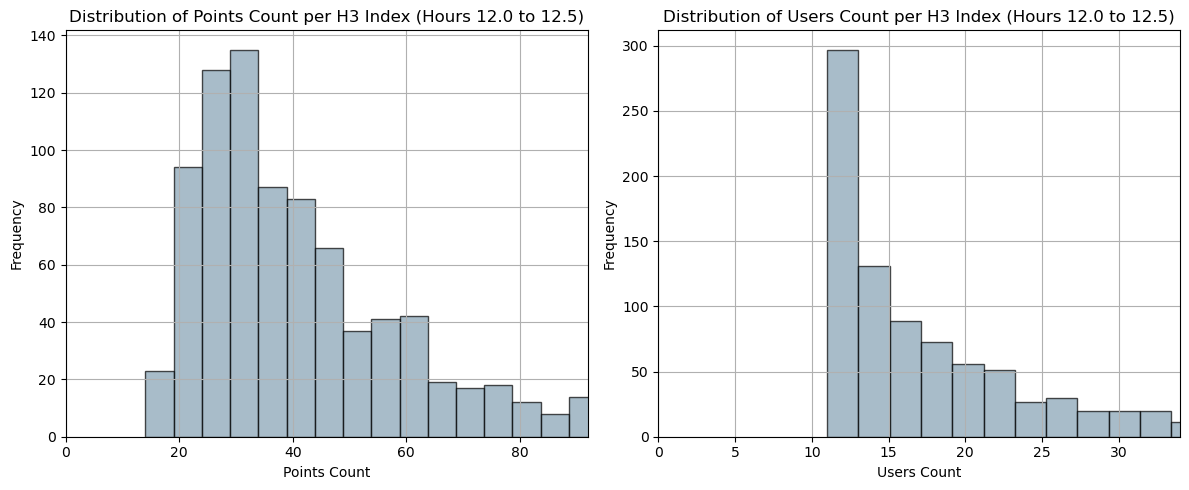

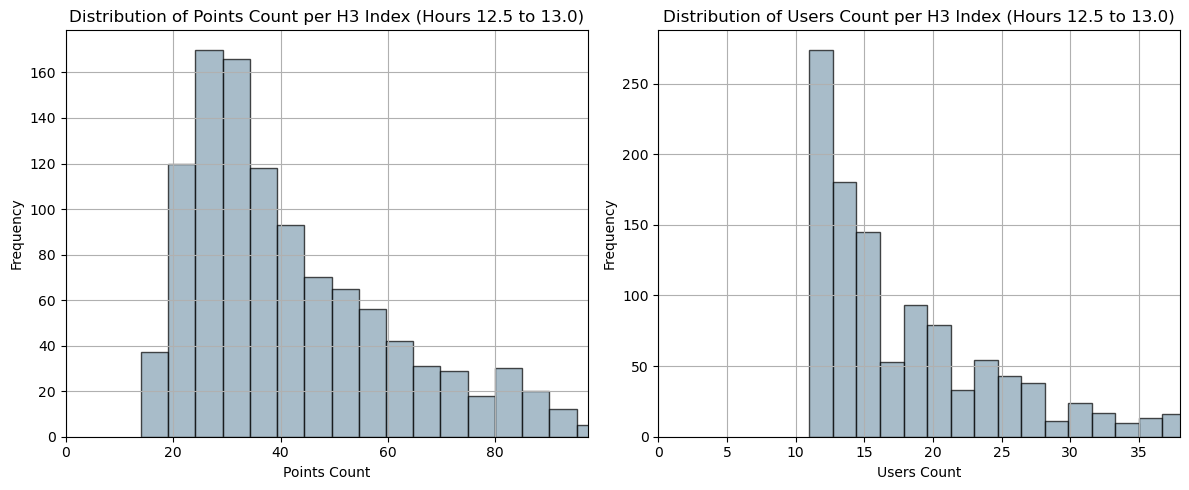

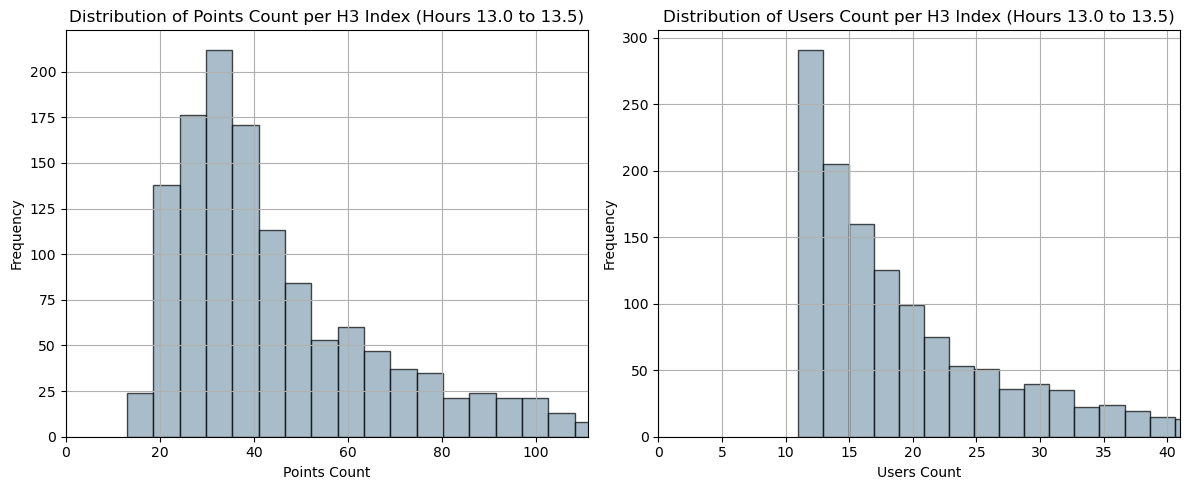

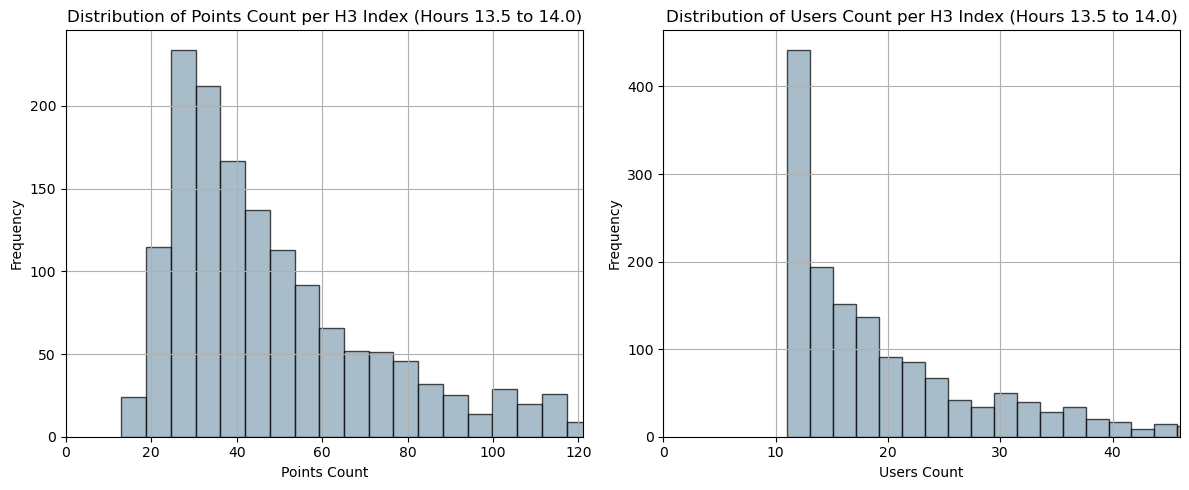

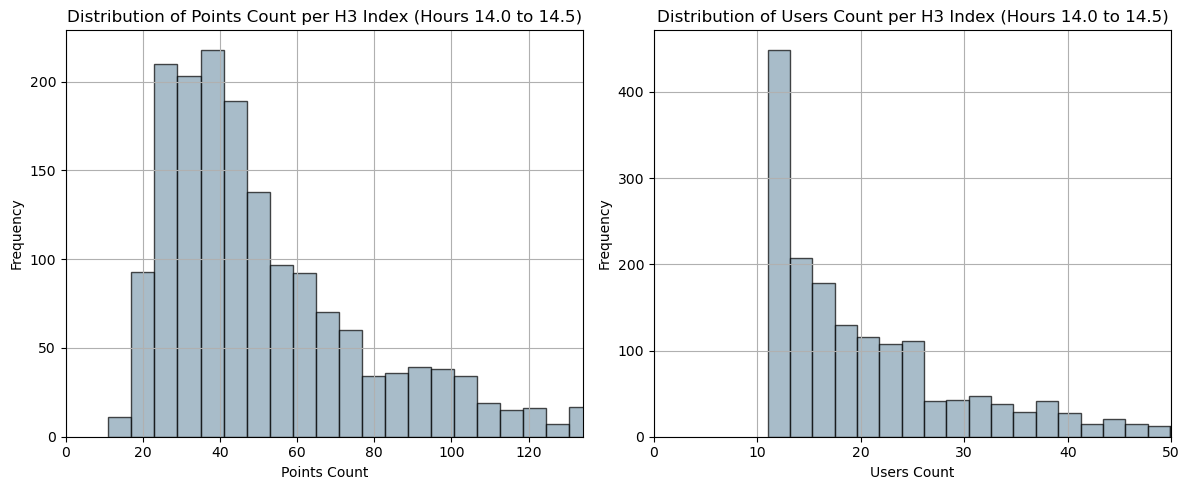

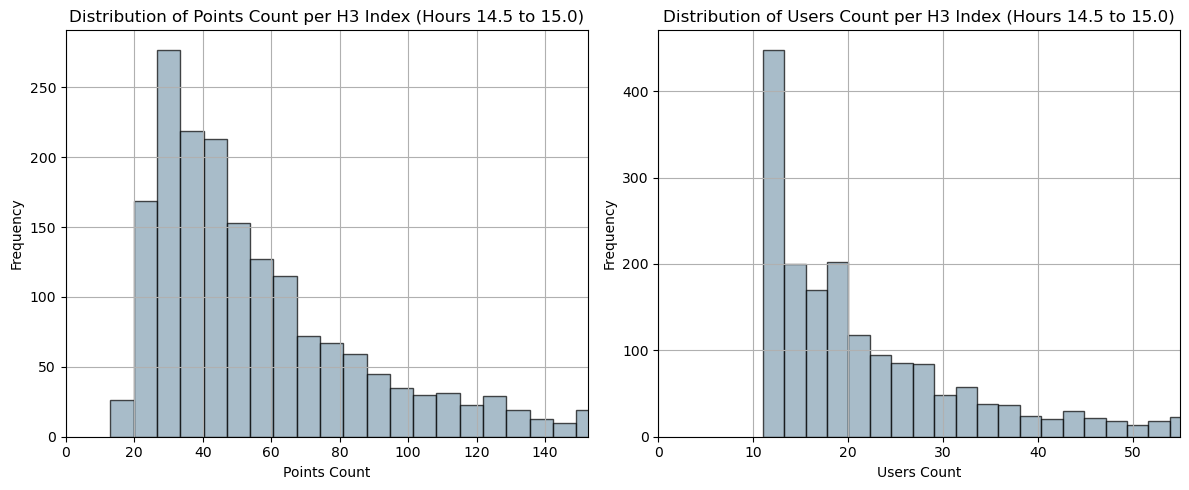

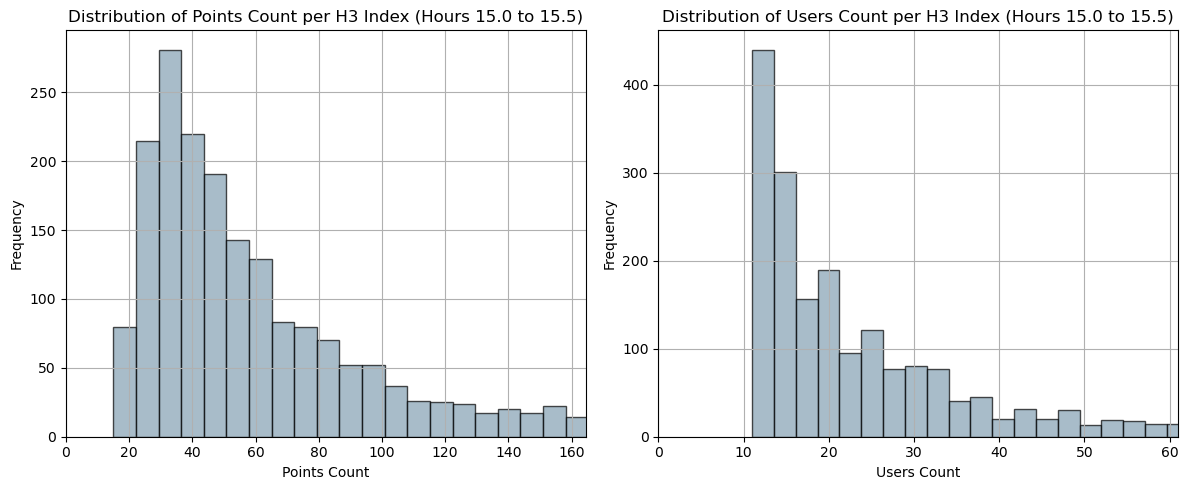

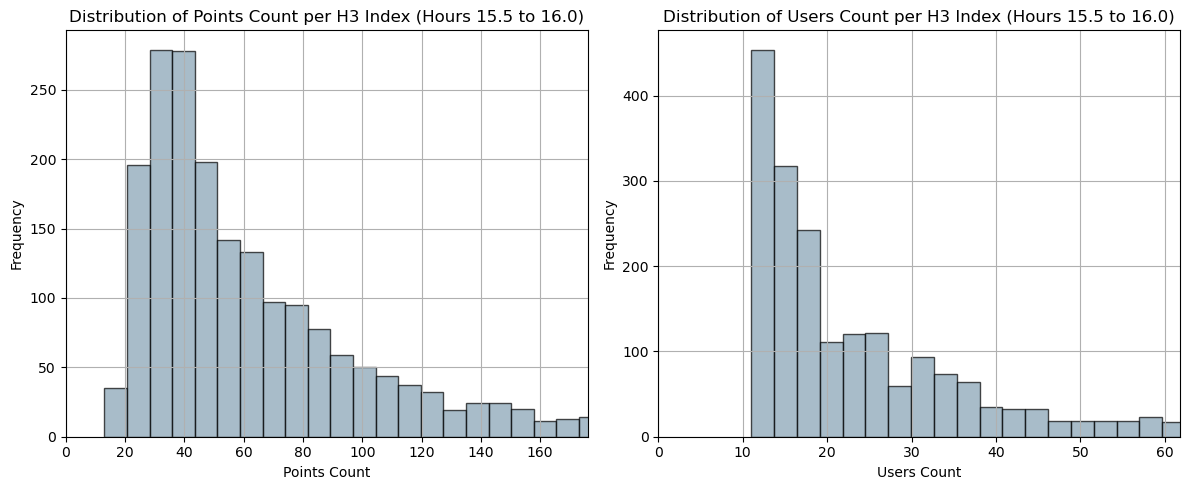

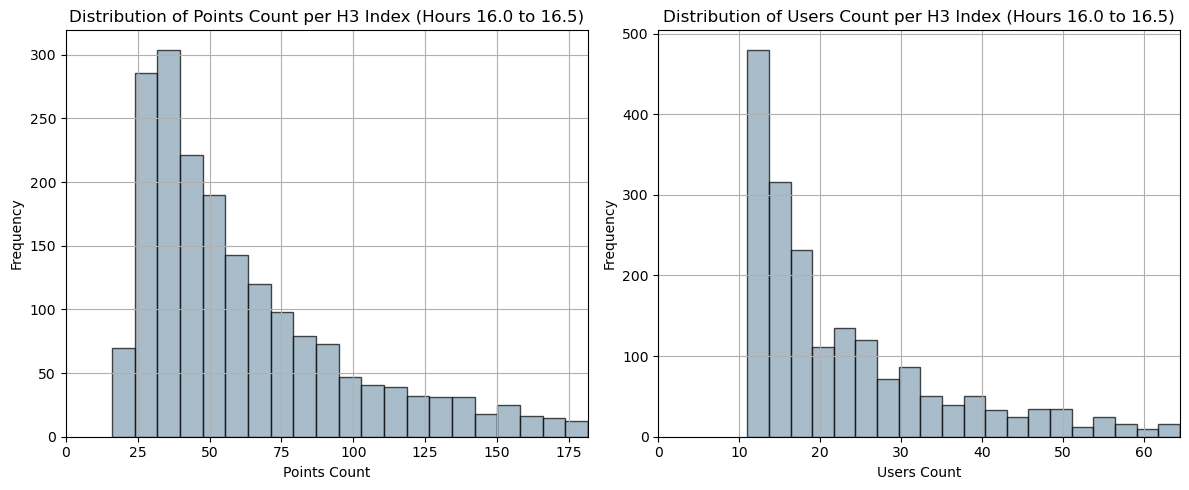

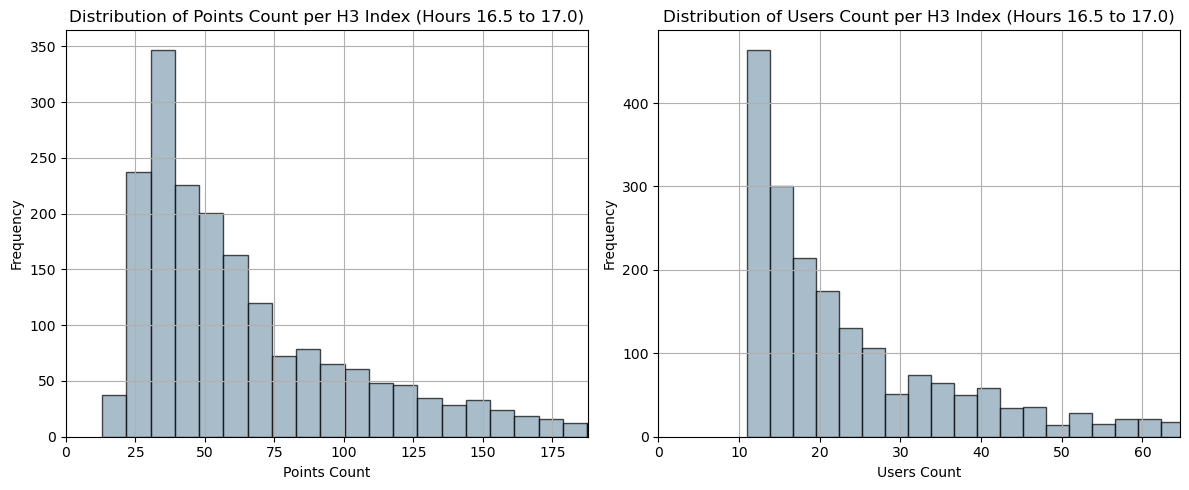

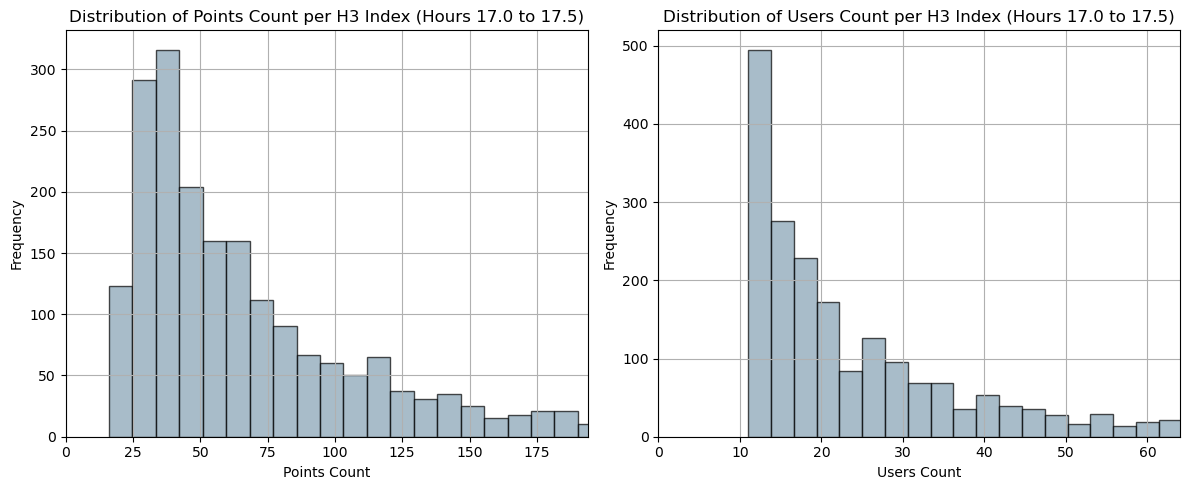

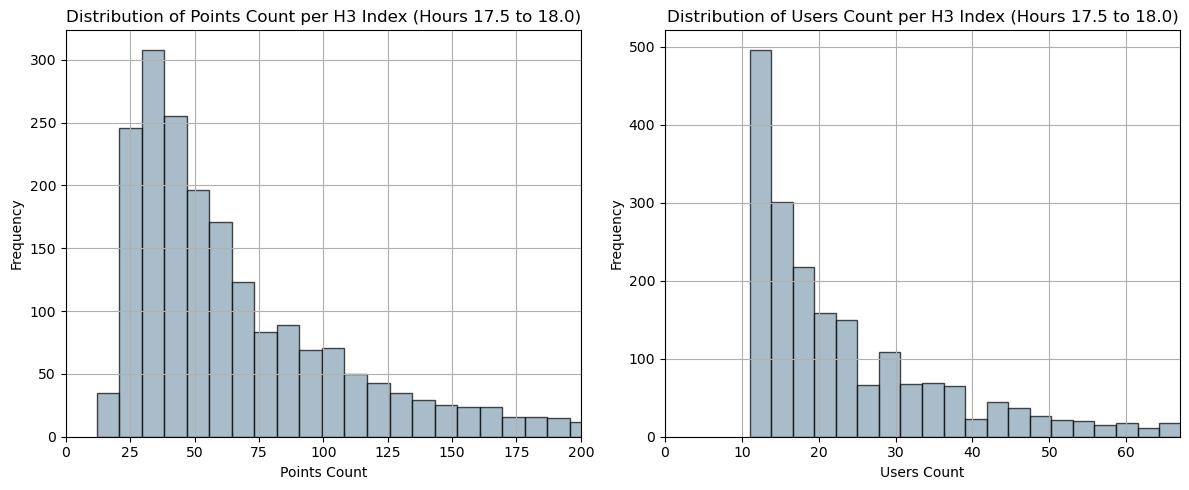

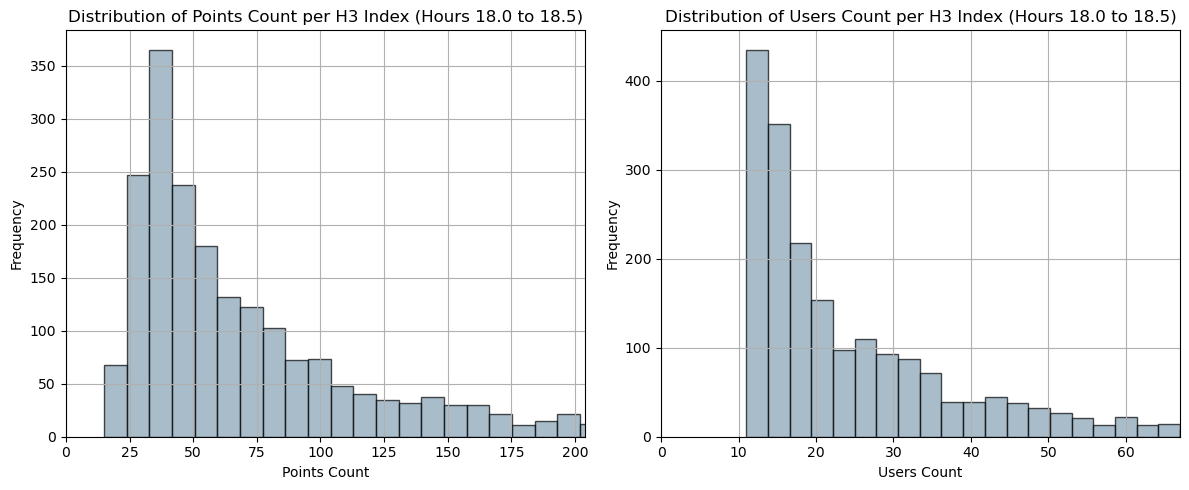

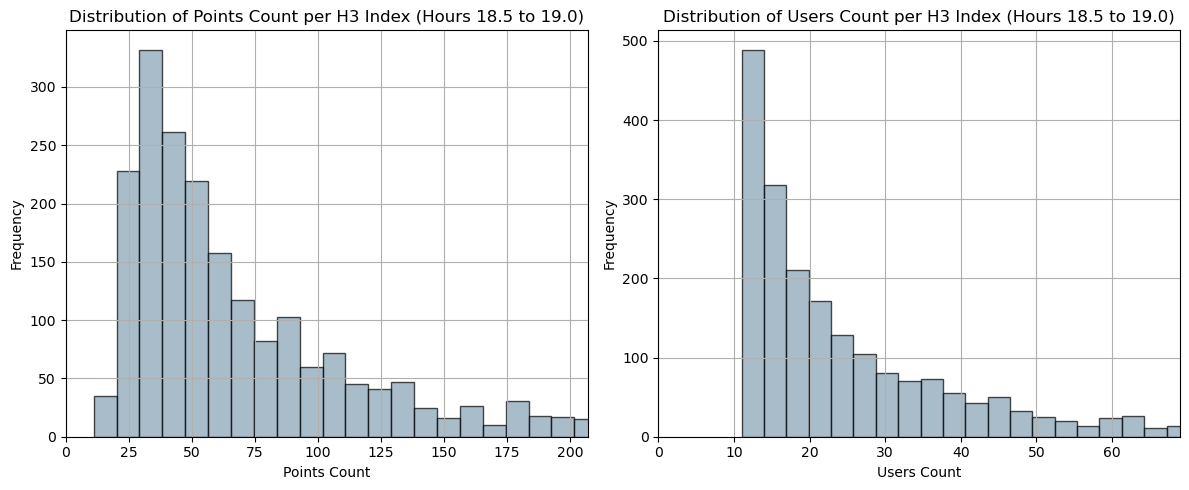

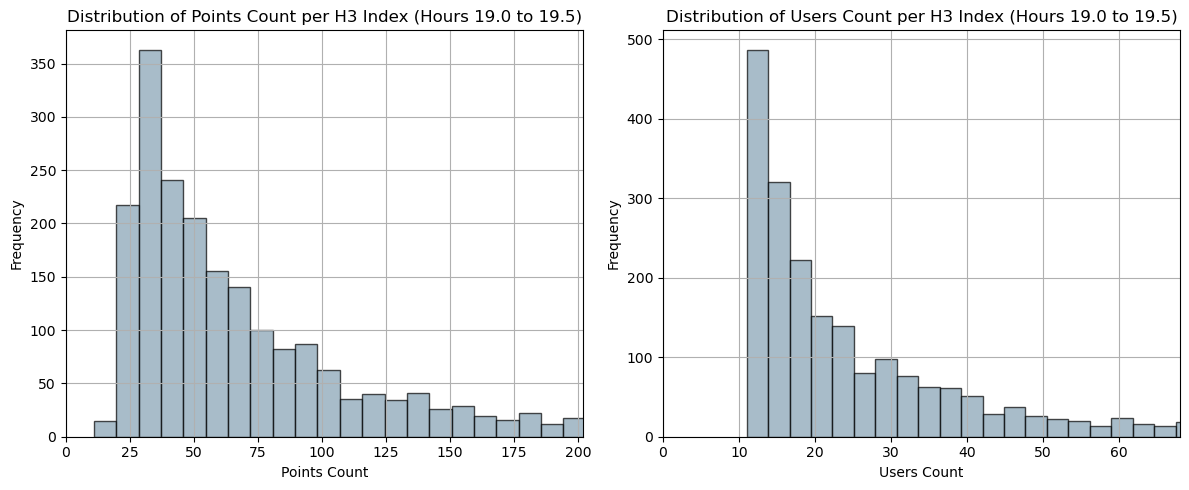

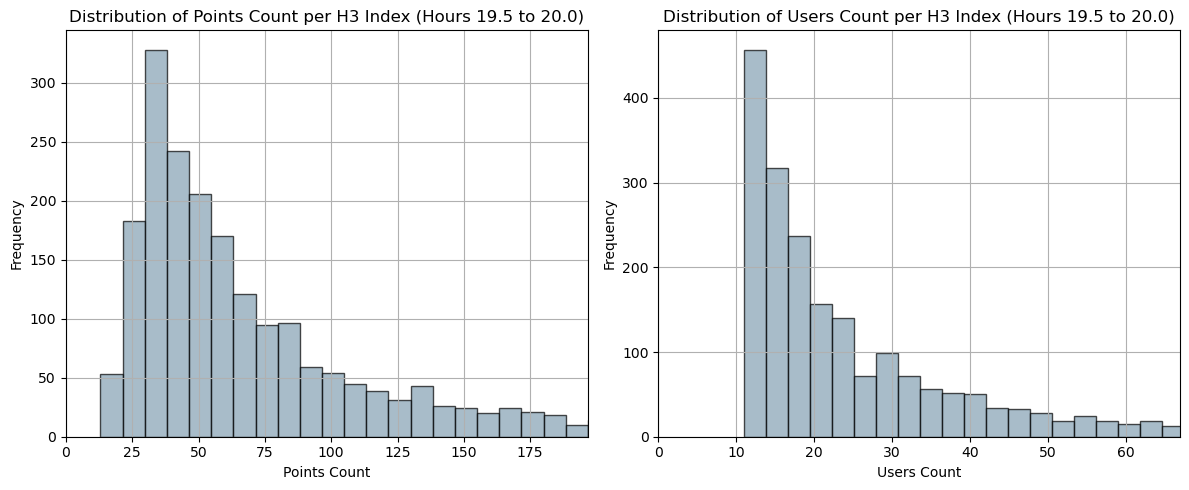

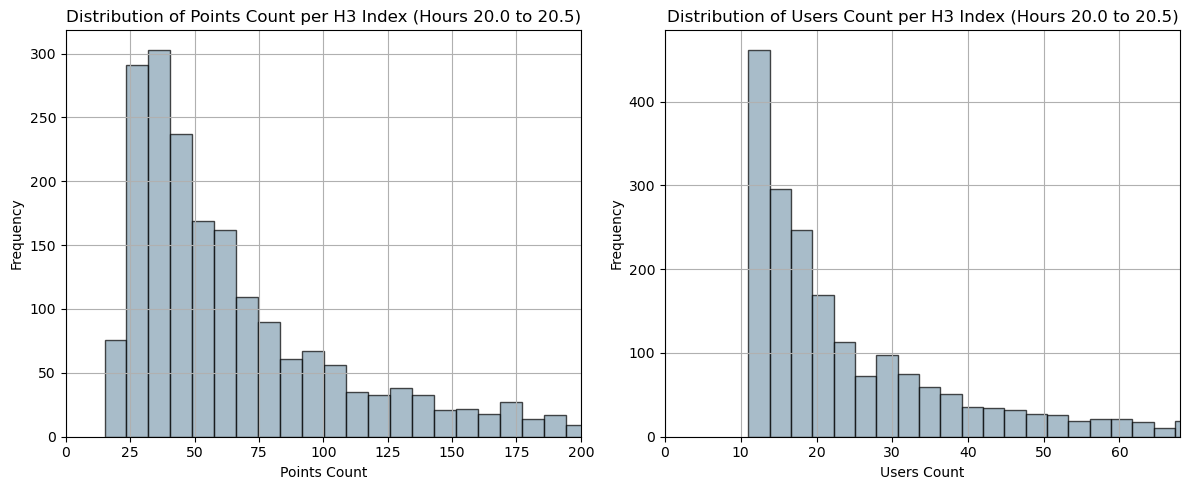

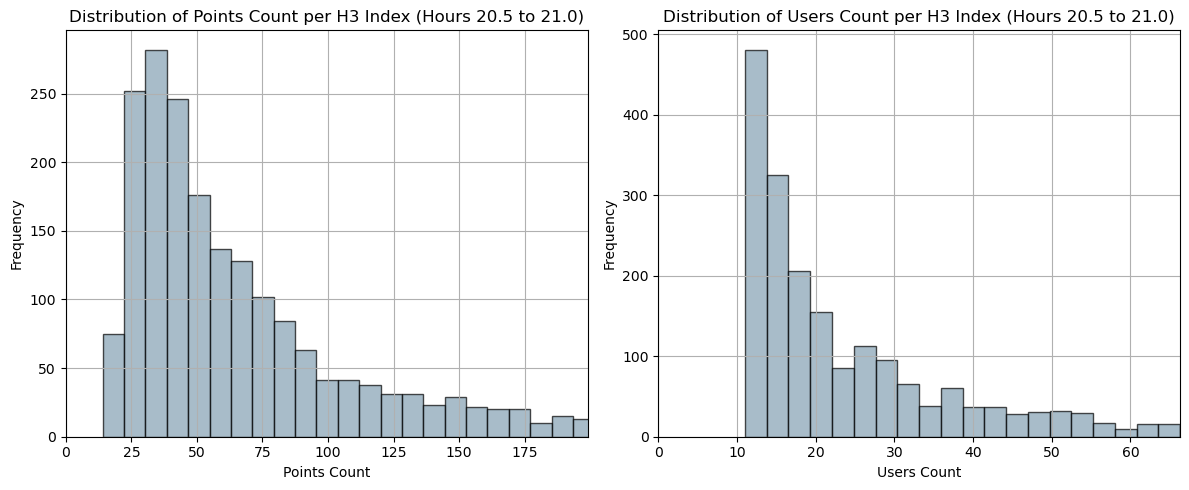

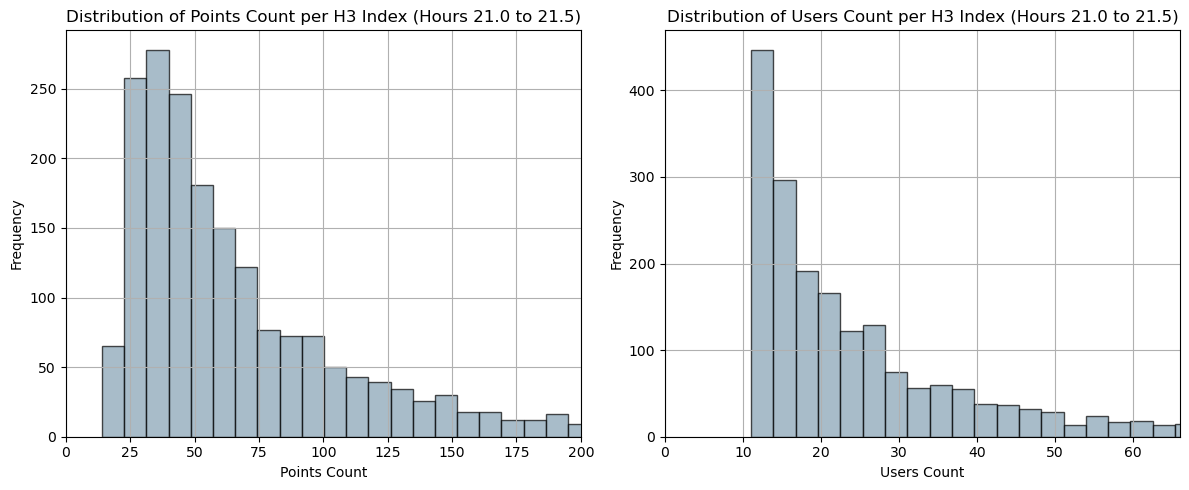

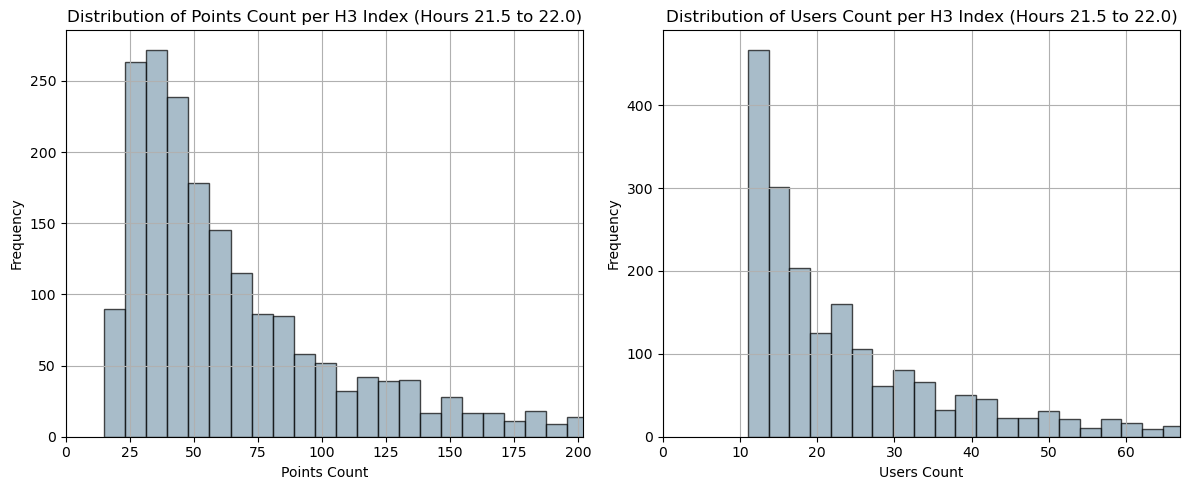

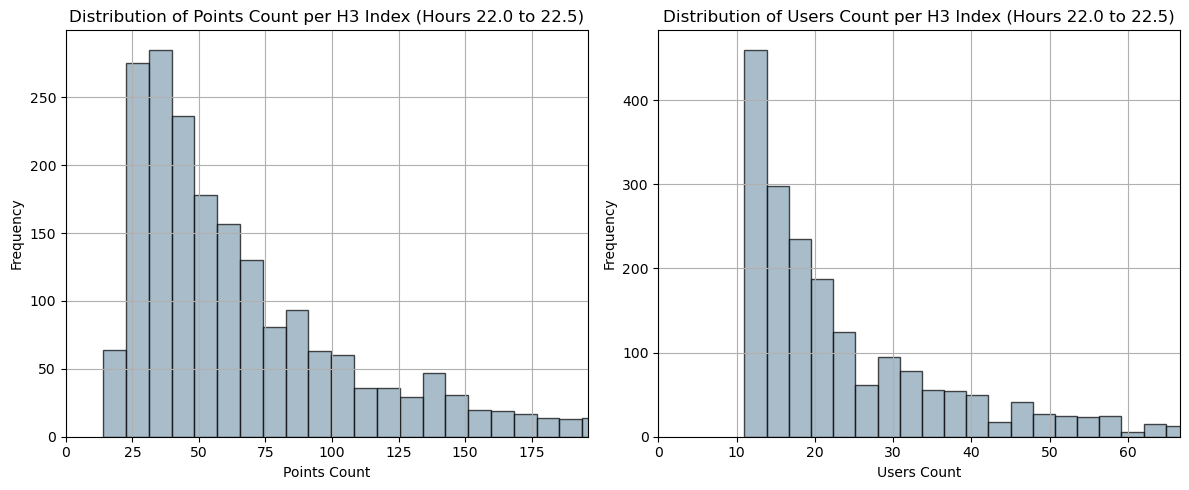

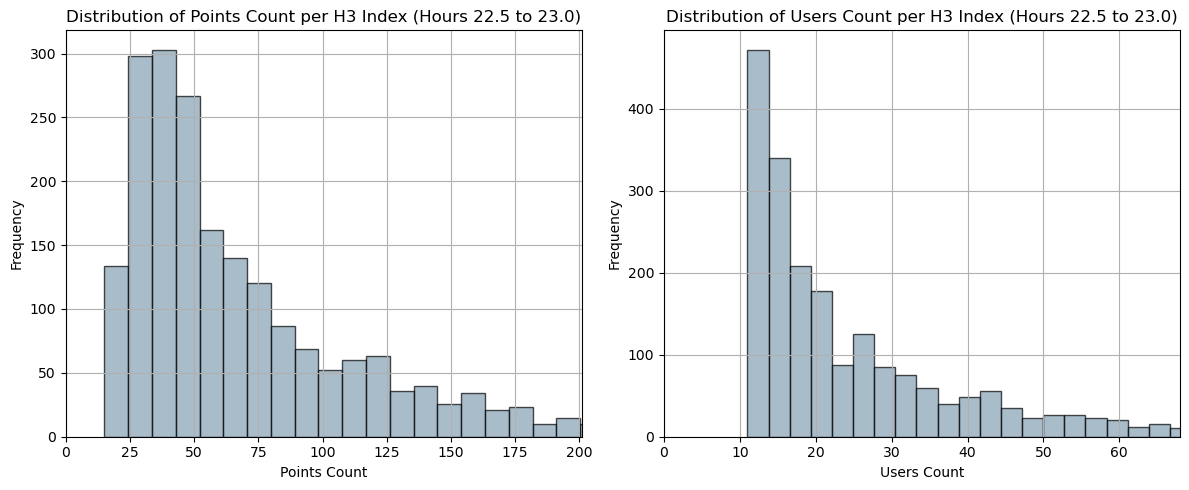

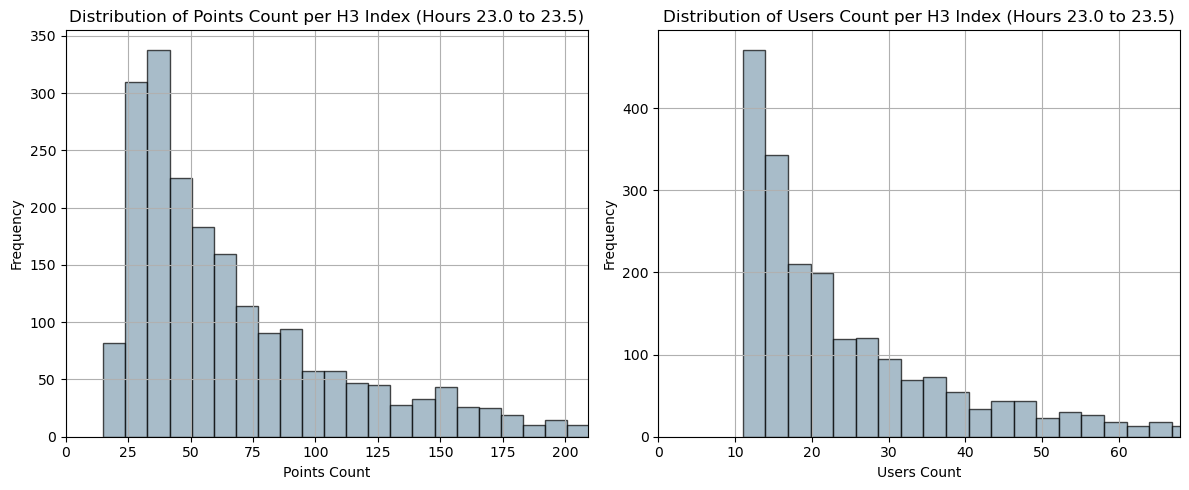

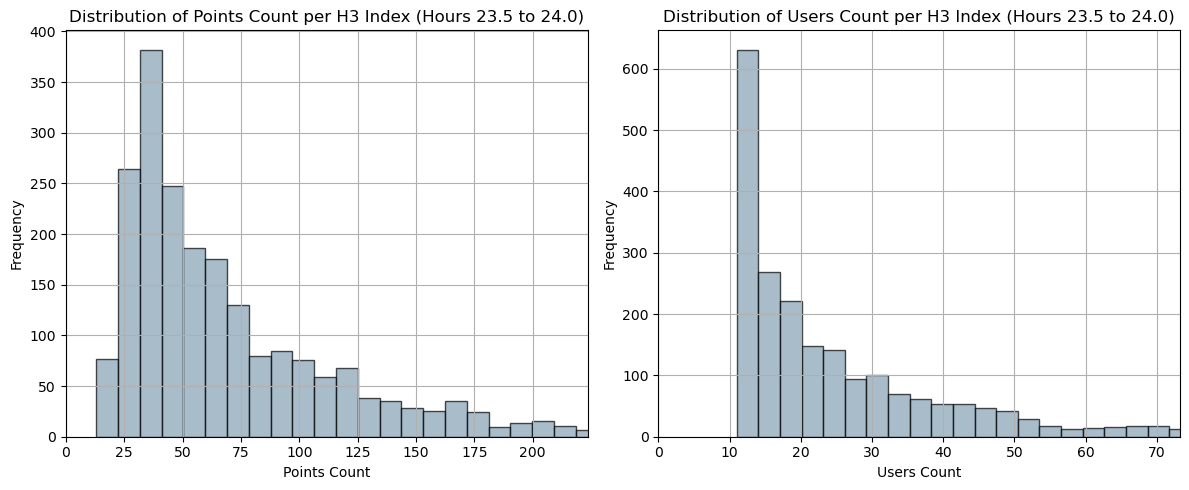

In [3]:
# Example usage
date = 20190105  
chosen_country_code = 'IN' 
color = '#83a0b2'  
aggregation_hours = 0.5  # Replace with desired aggregation hours (0.25, 0.5, 1, 2, 3, 4, 6, 8, or 24)

process_and_plot(chosen_country_code, date, color, aggregation_hours)

# country_codes = ['MX', 'IN', 'ID', 'CO']
# colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']

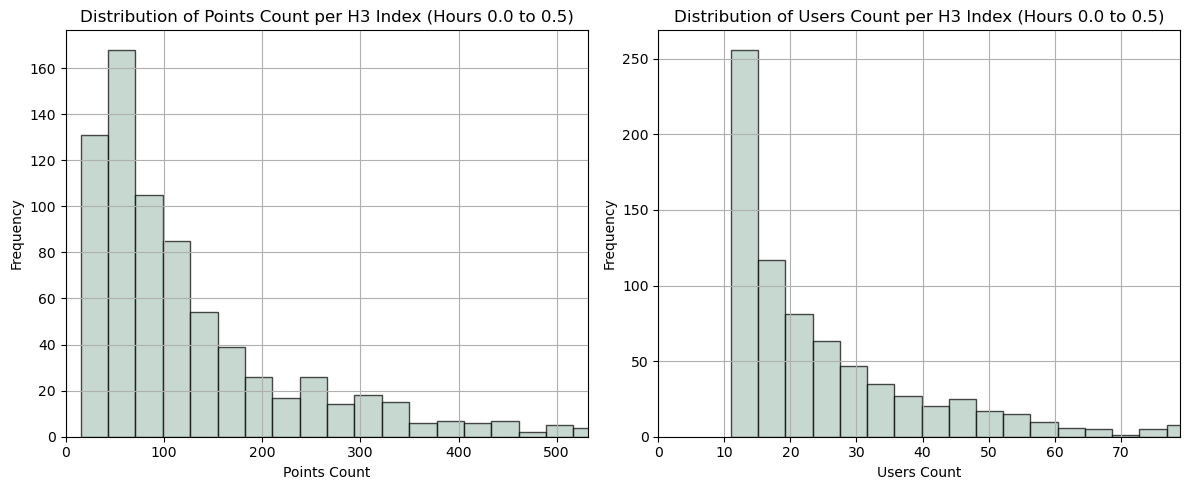

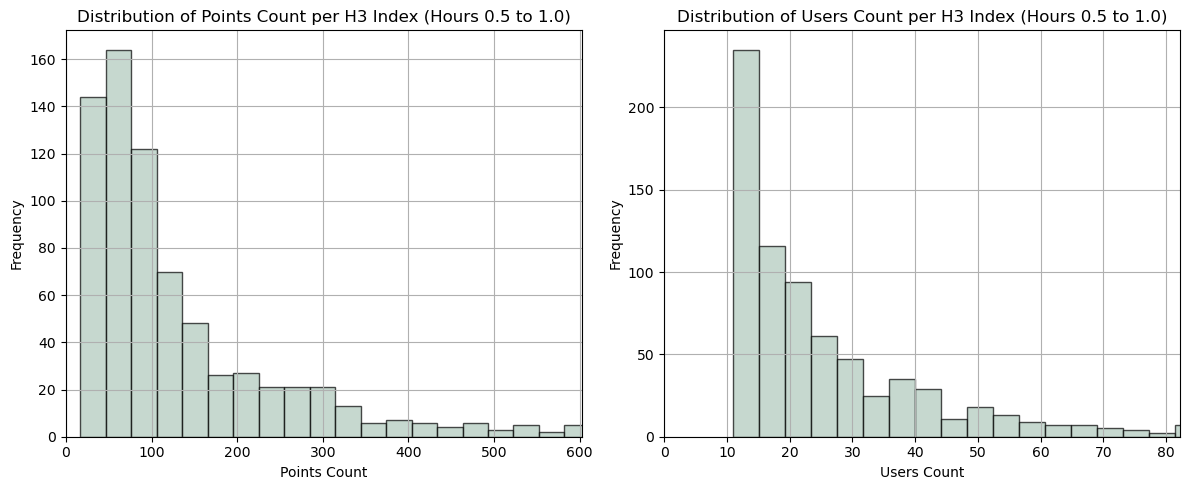

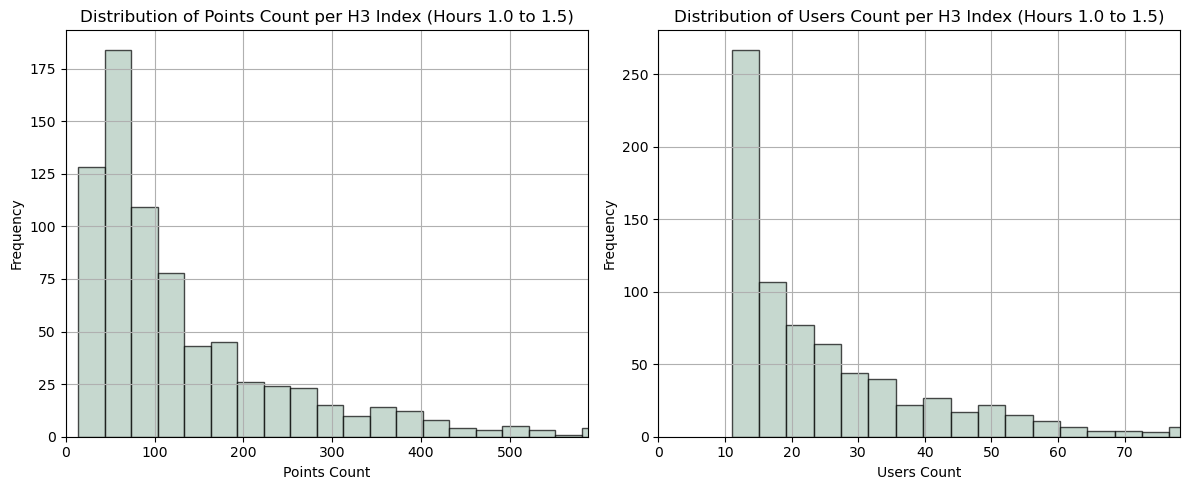

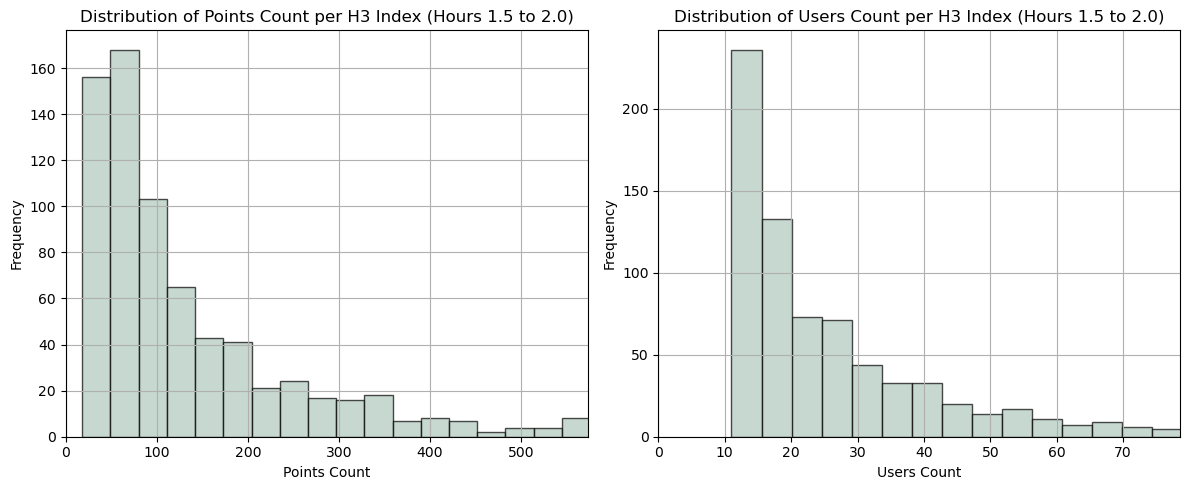

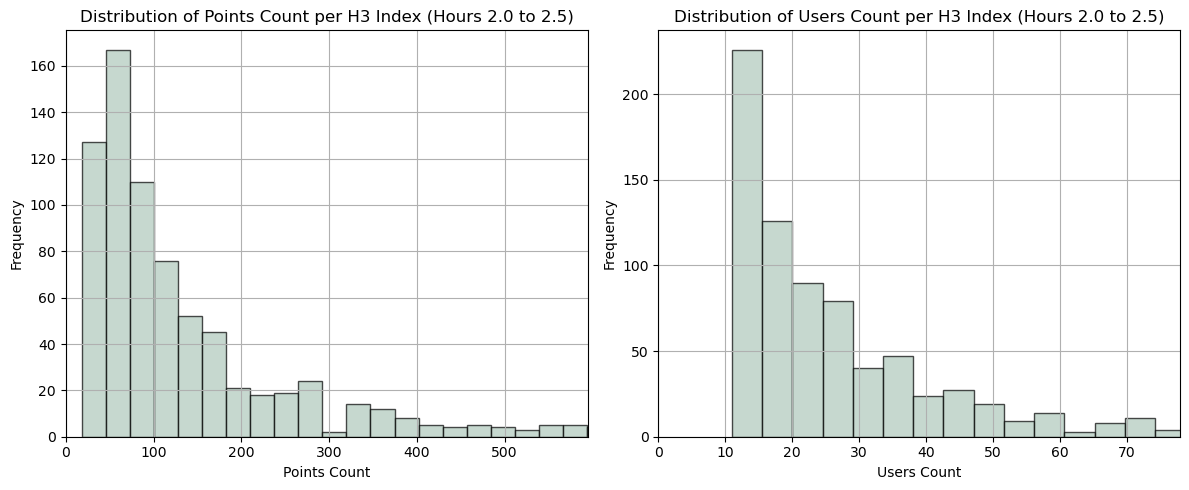

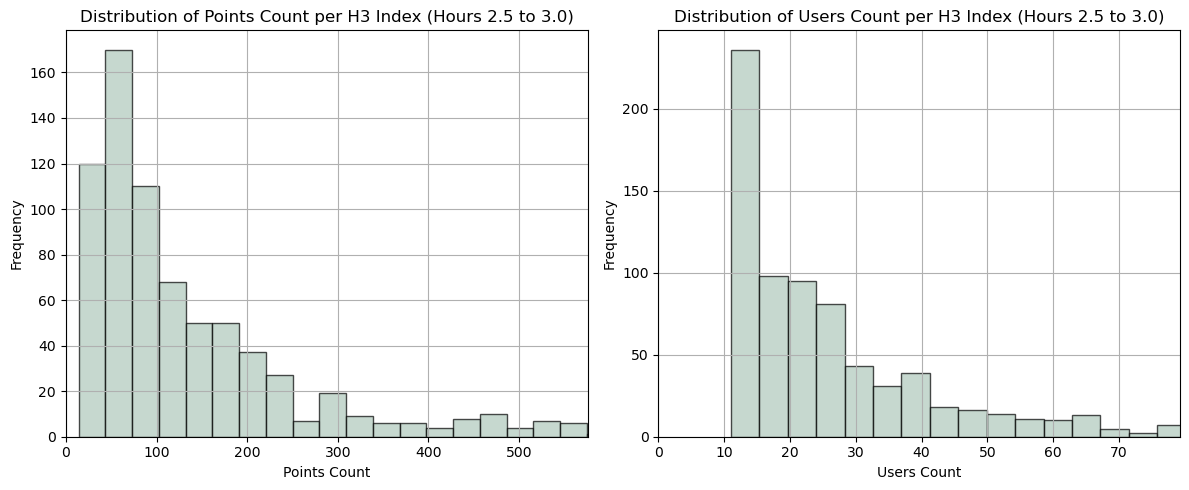

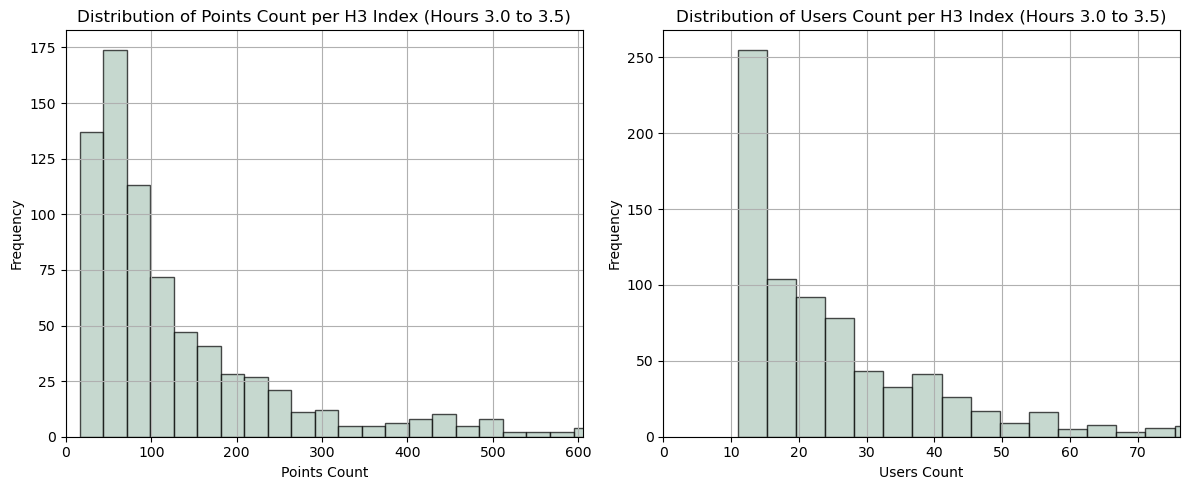

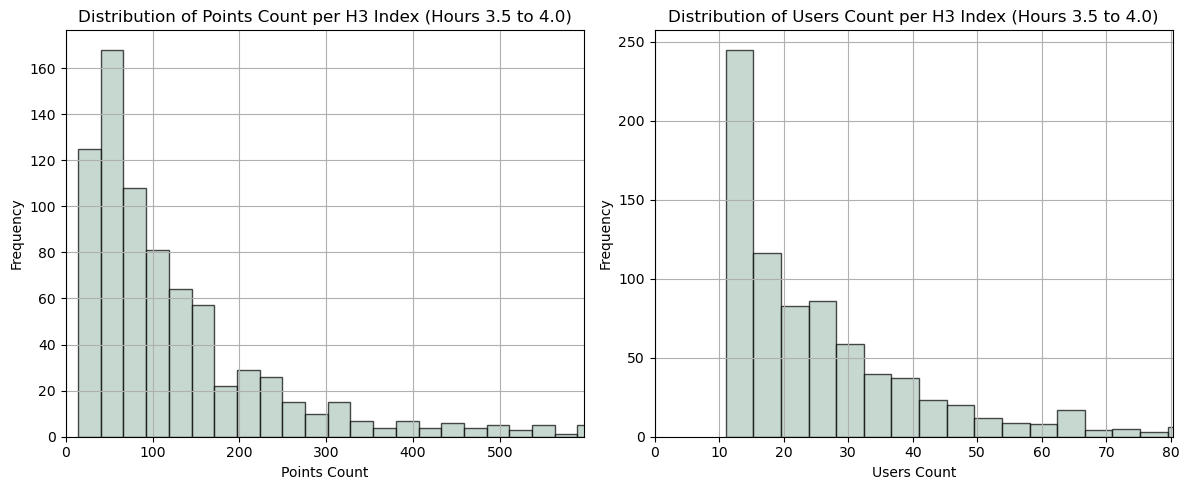

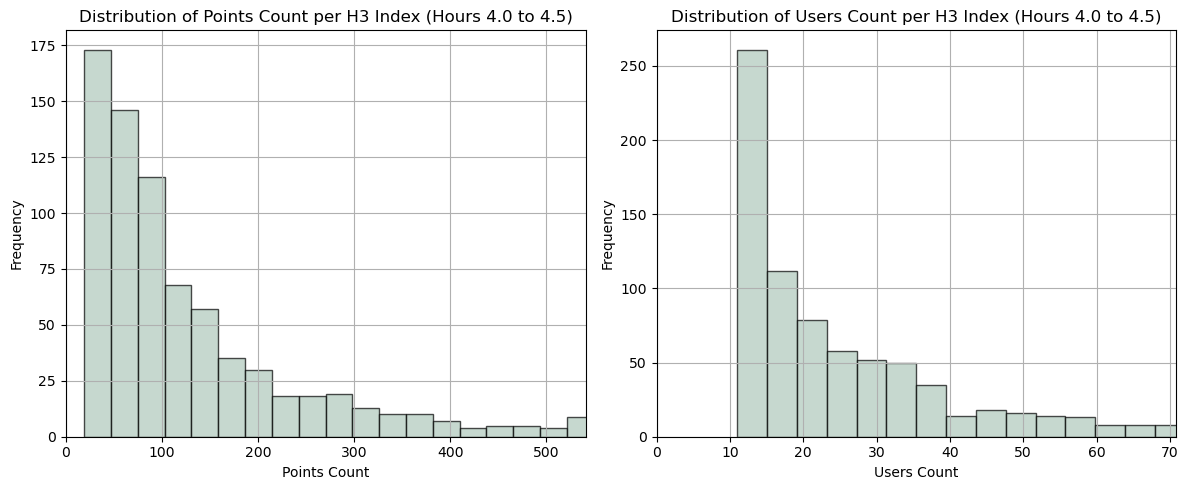

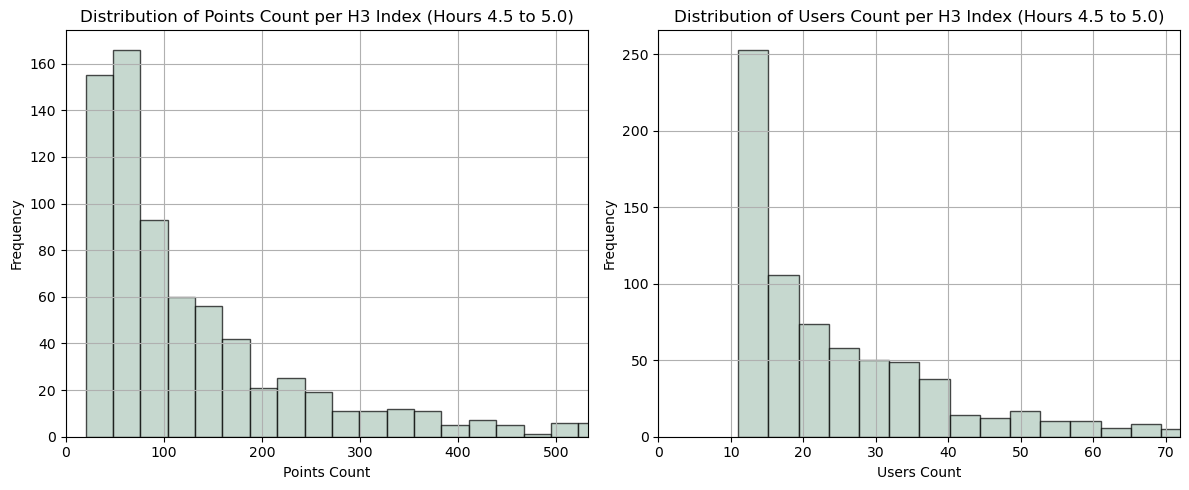

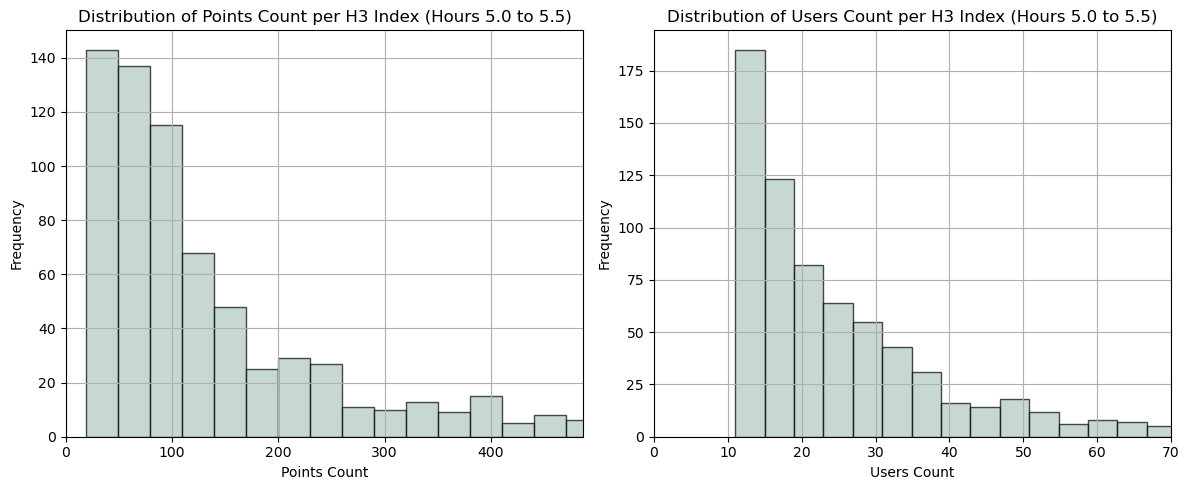

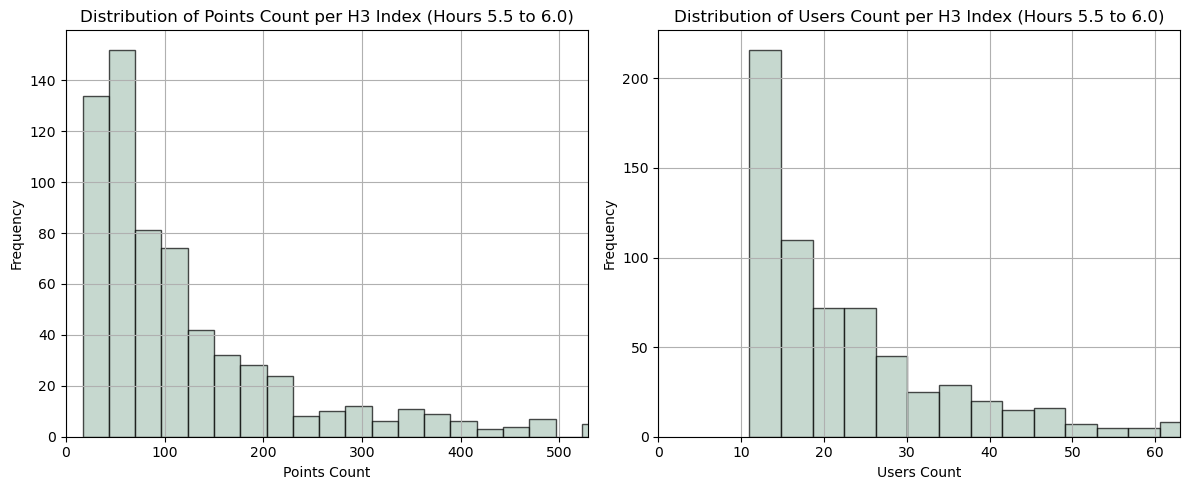

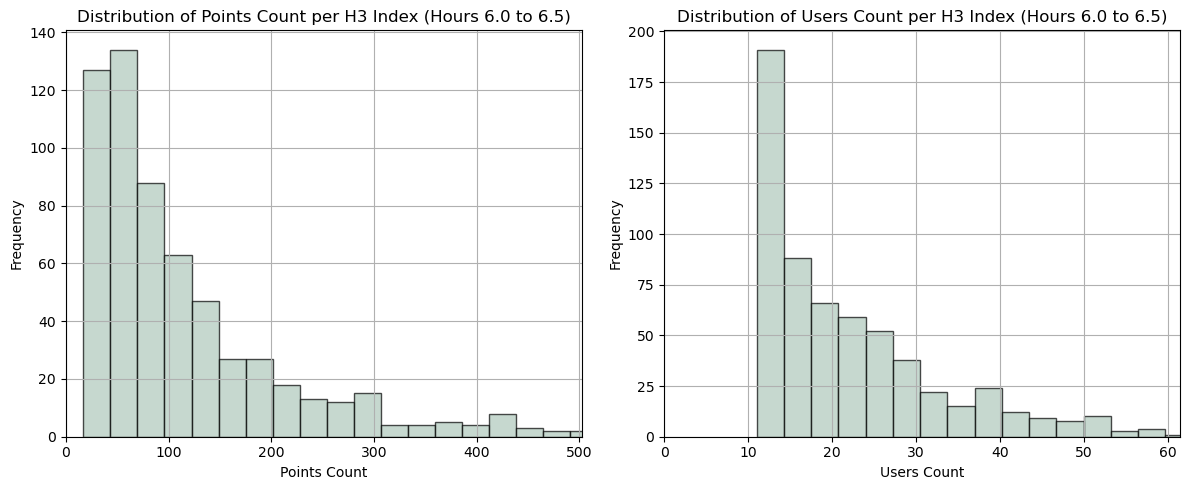

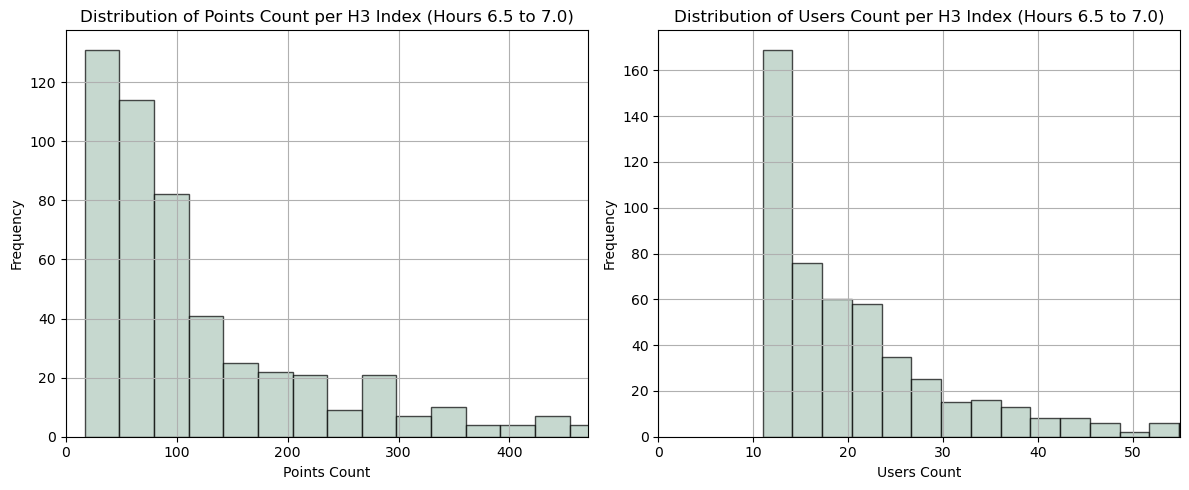

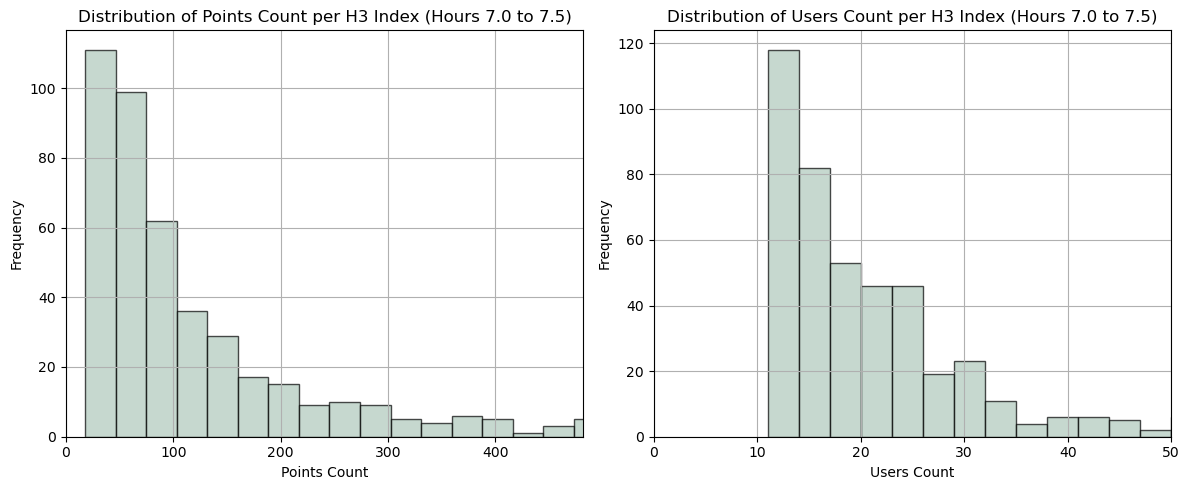

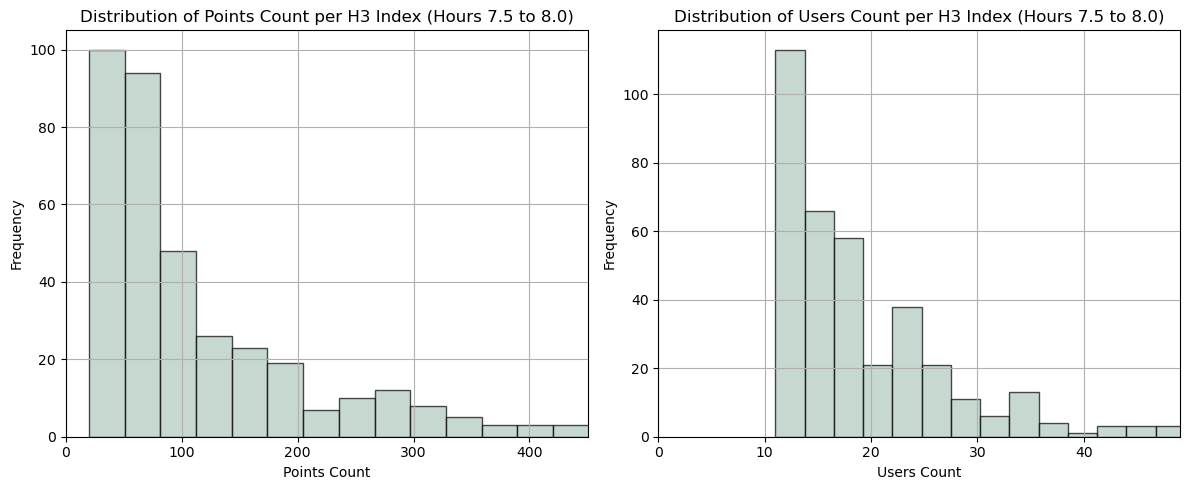

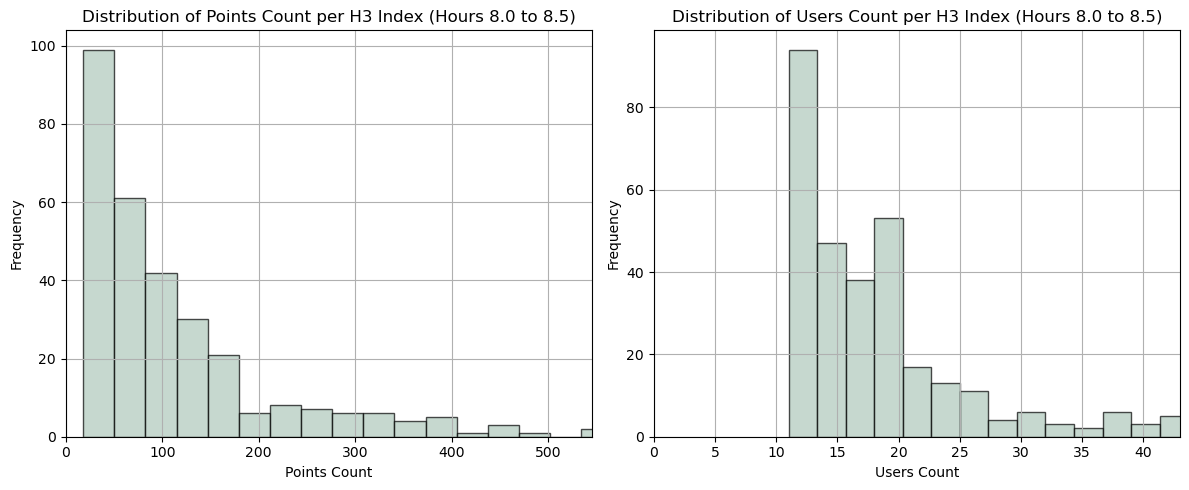

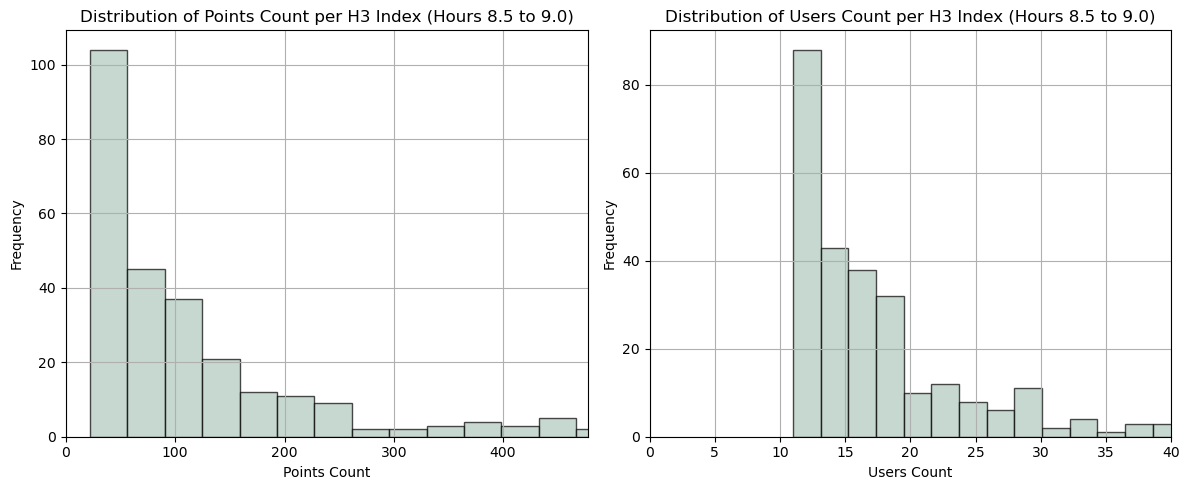

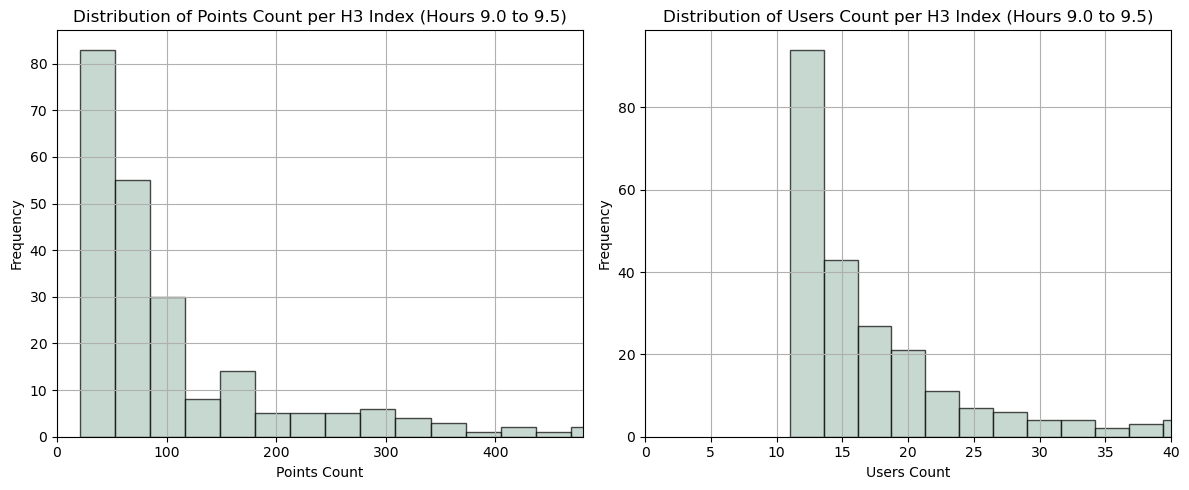

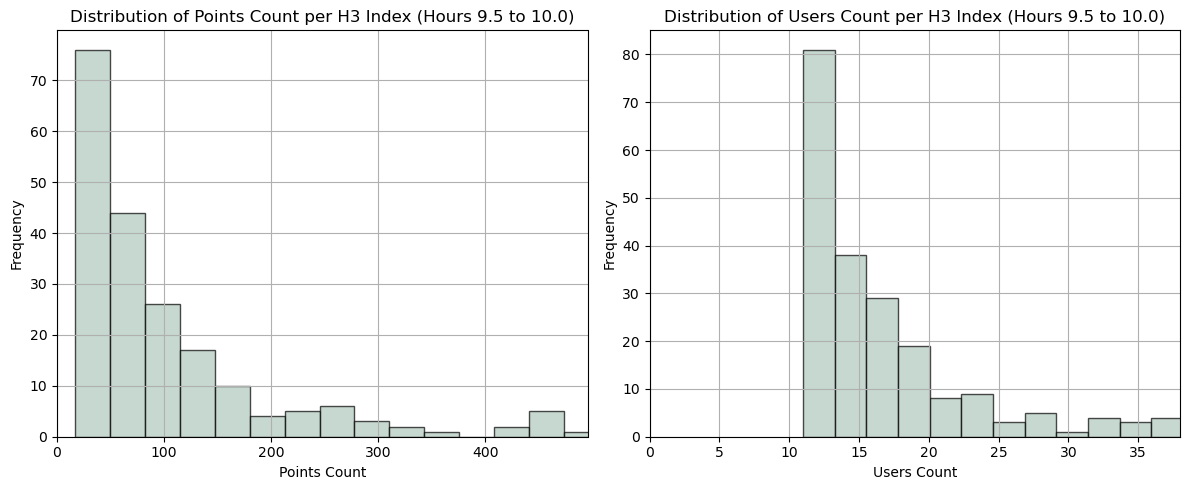

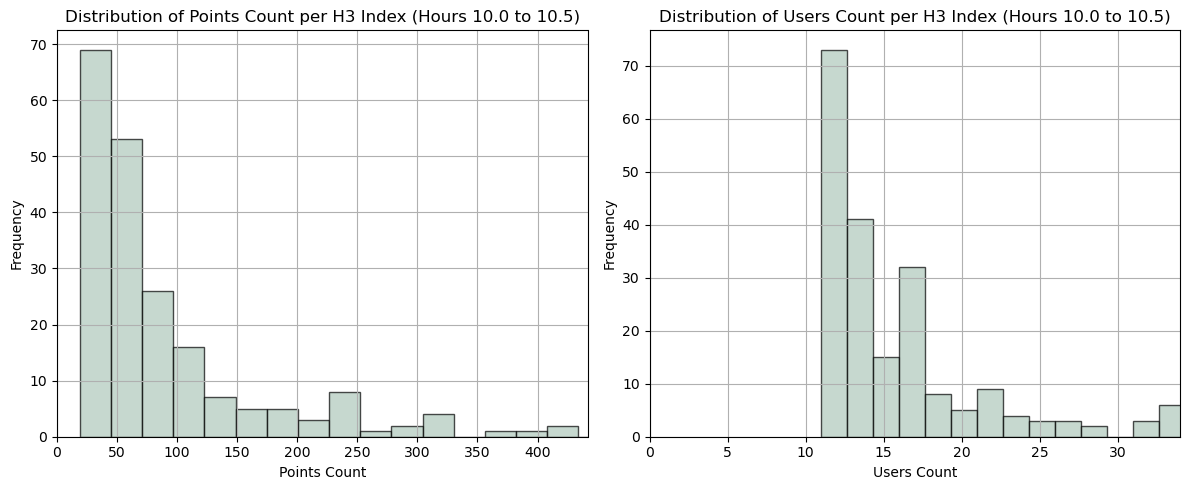

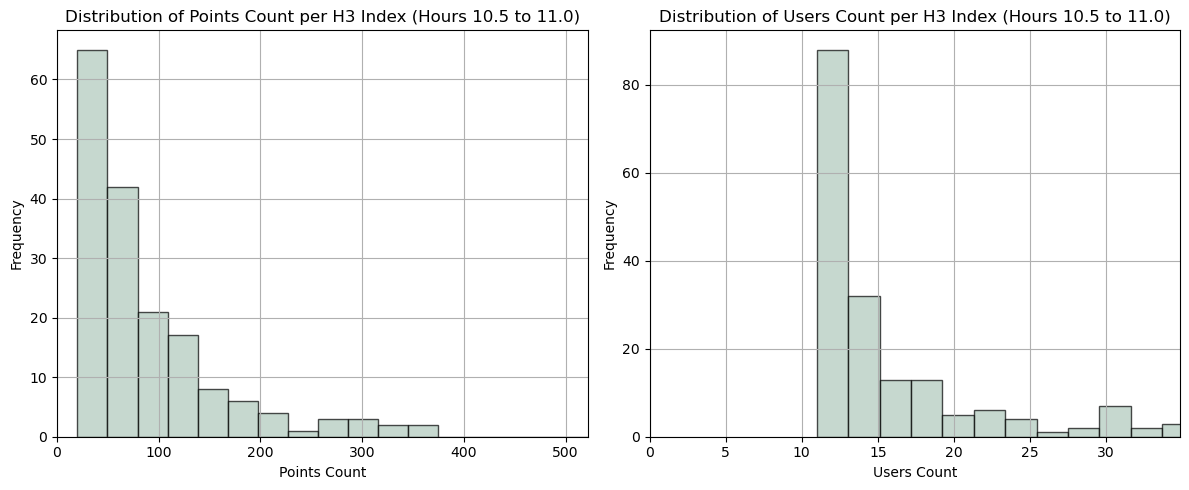

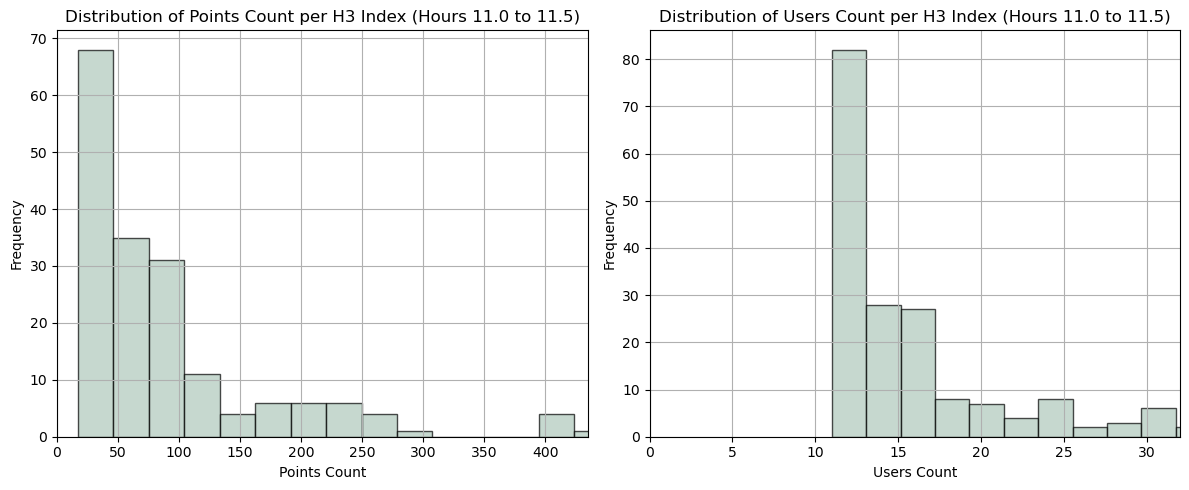

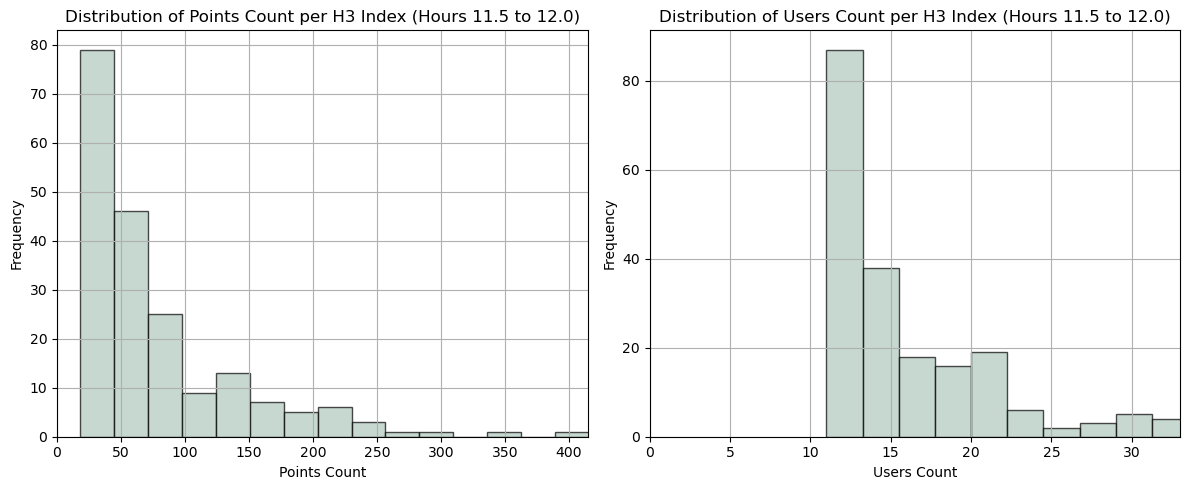

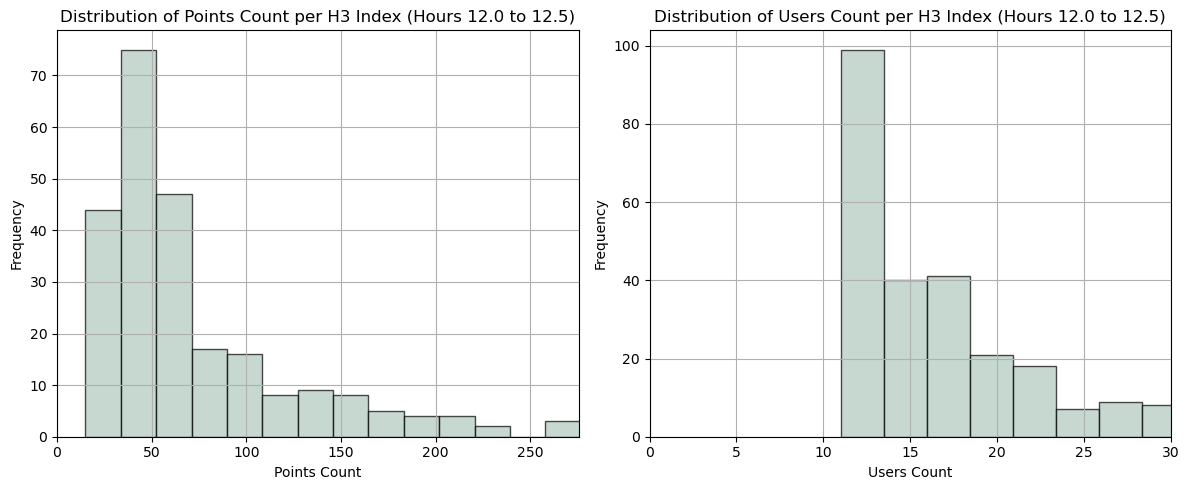

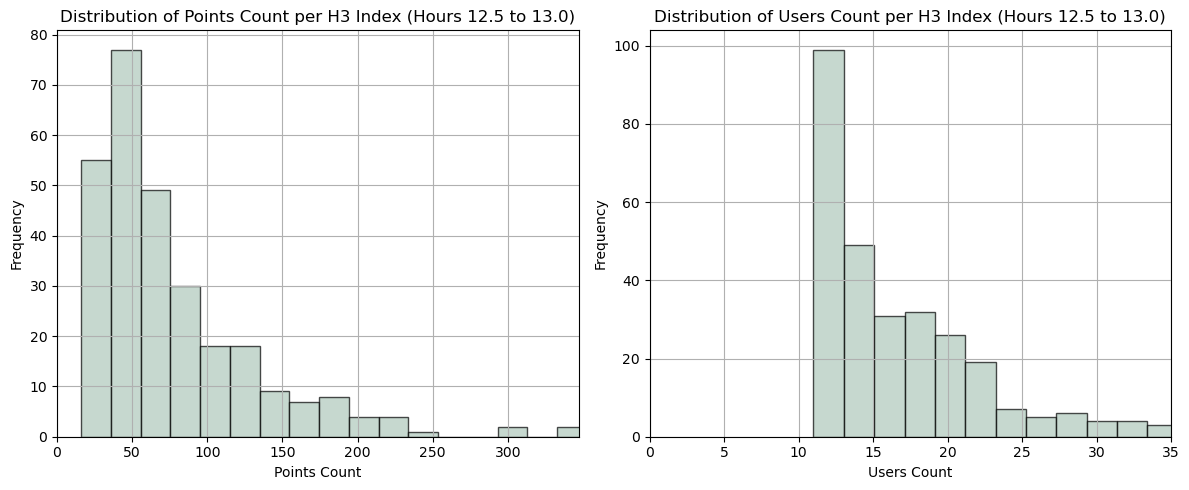

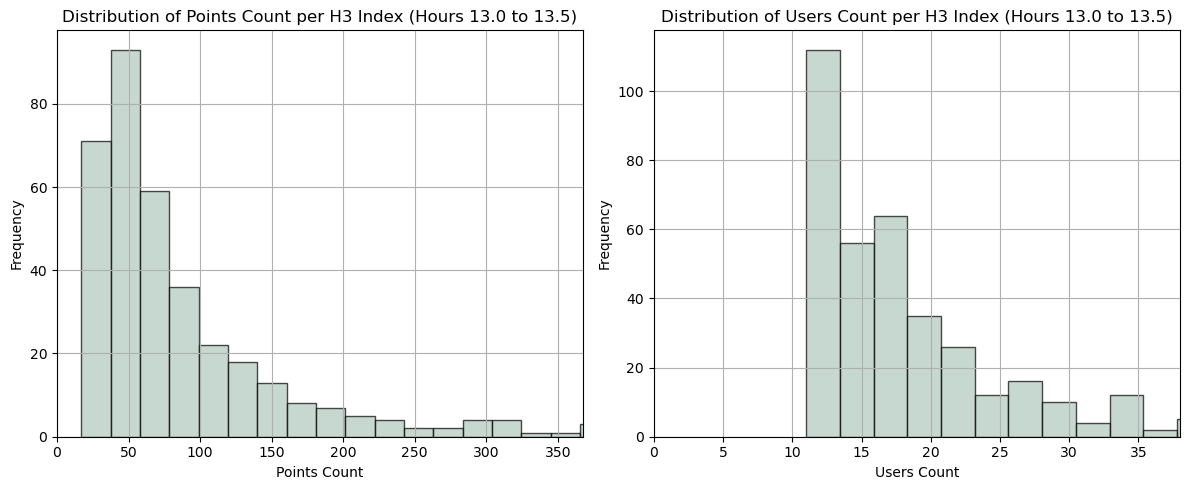

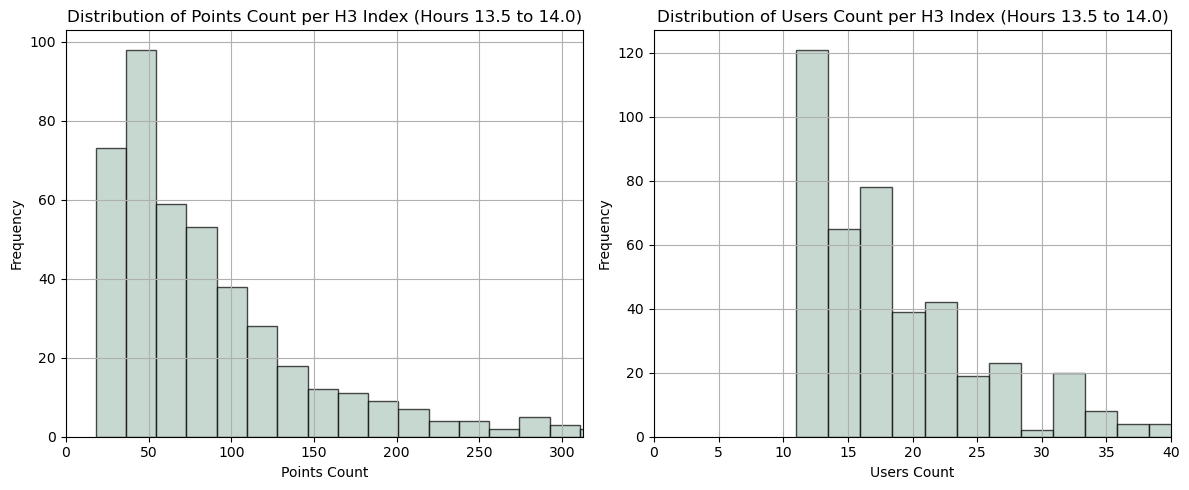

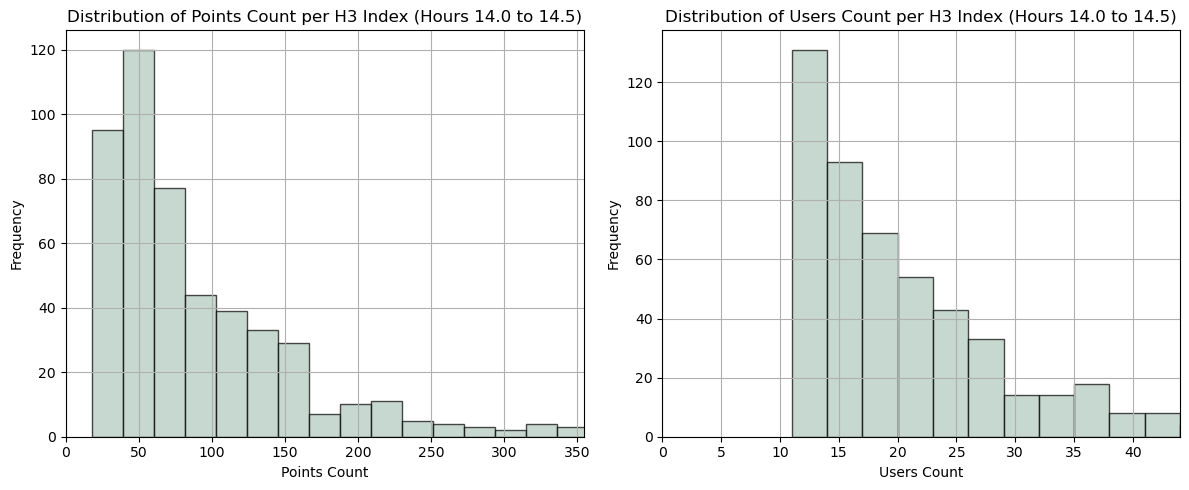

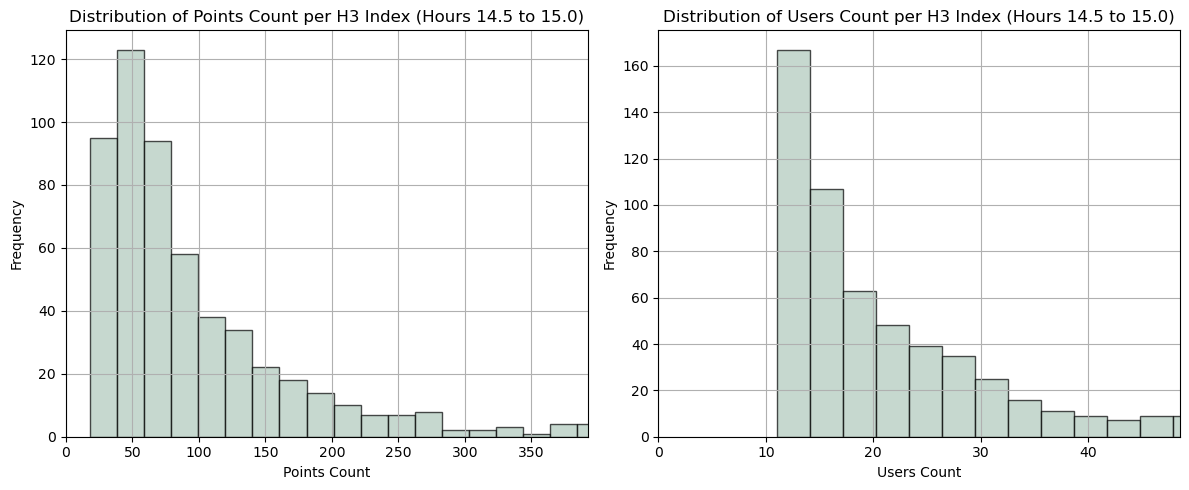

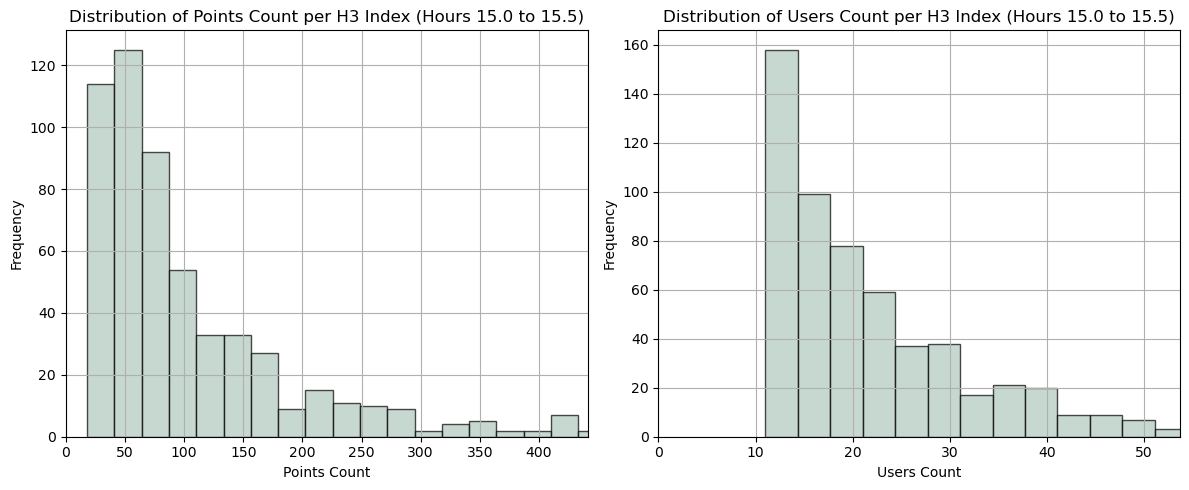

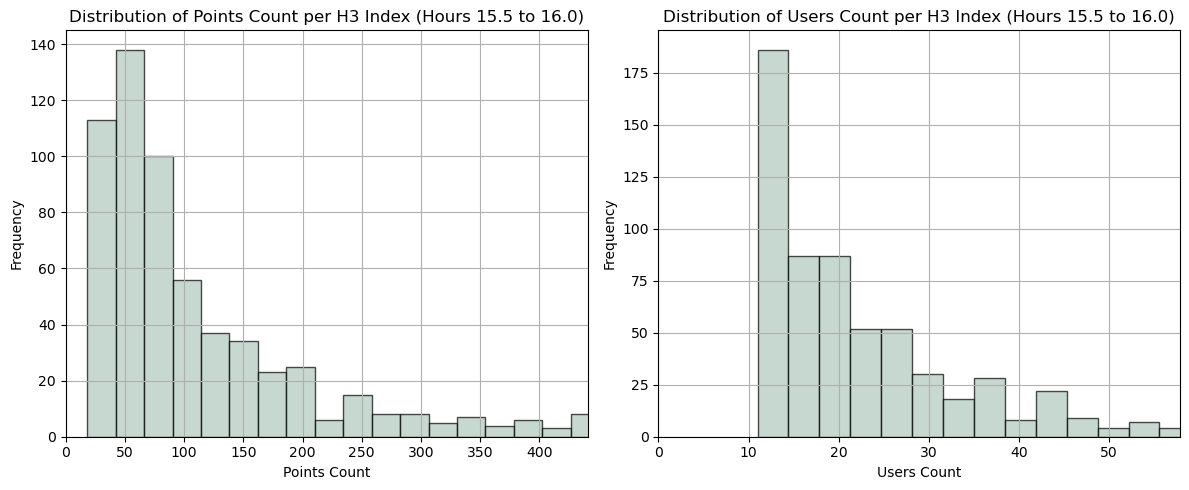

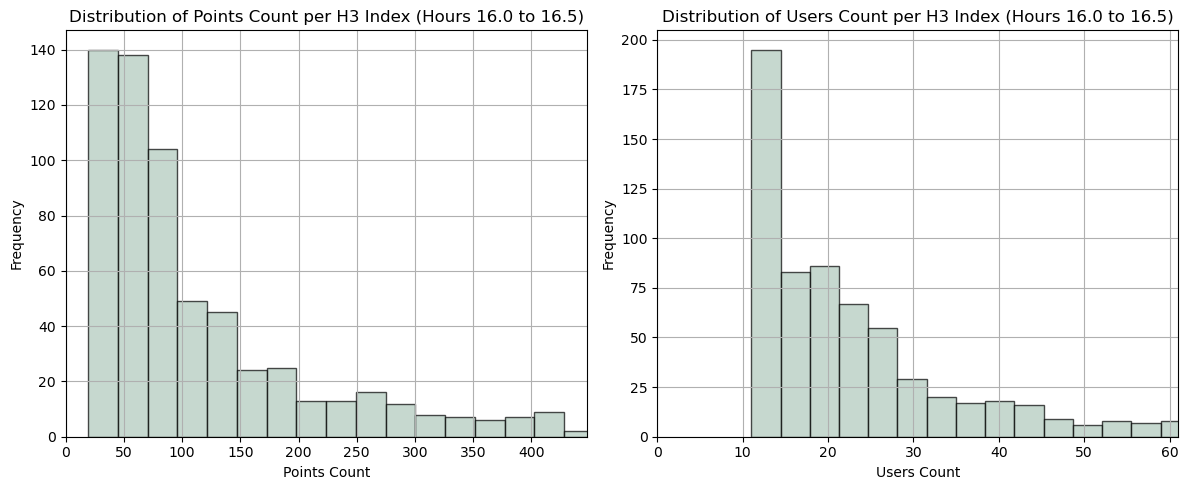

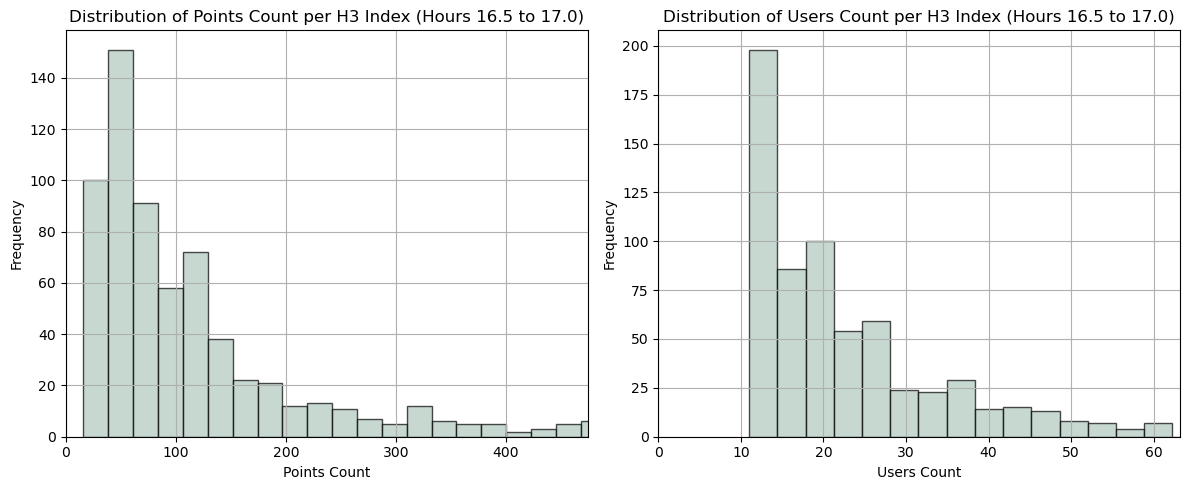

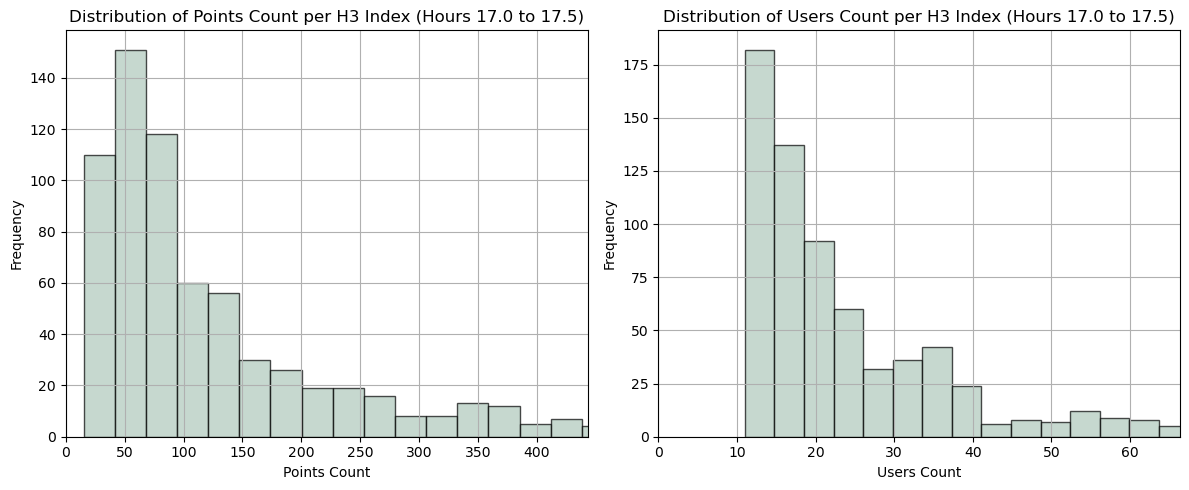

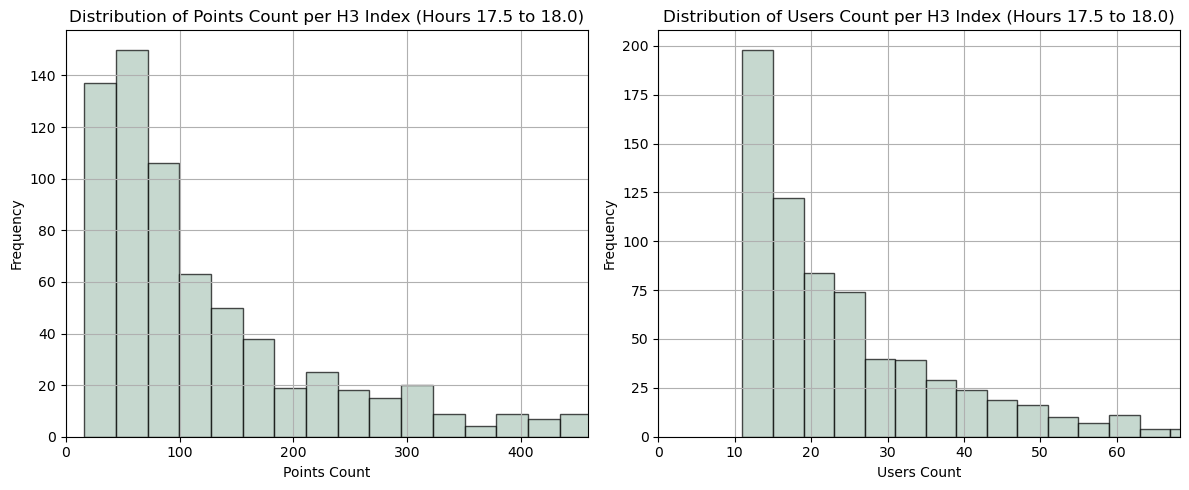

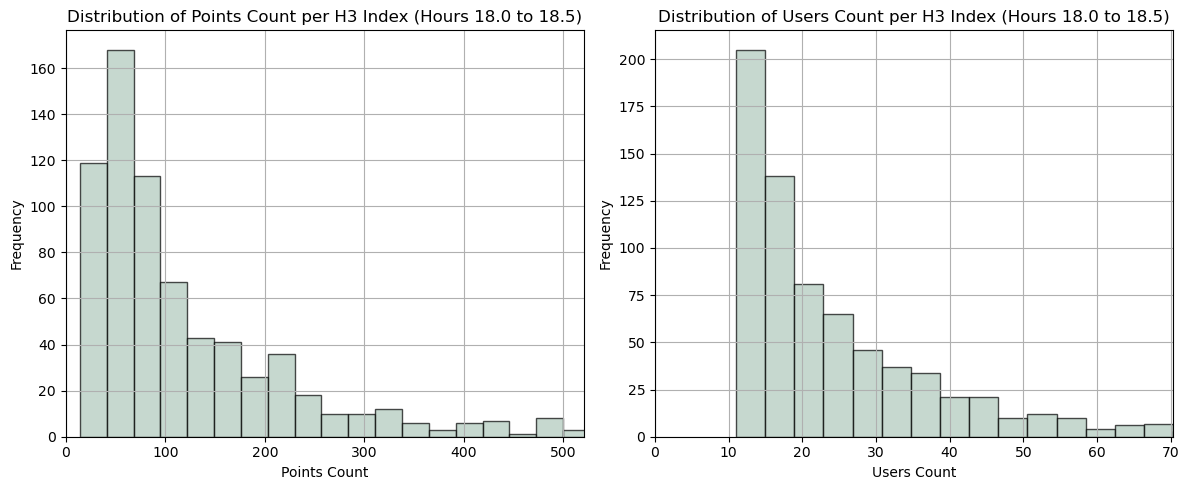

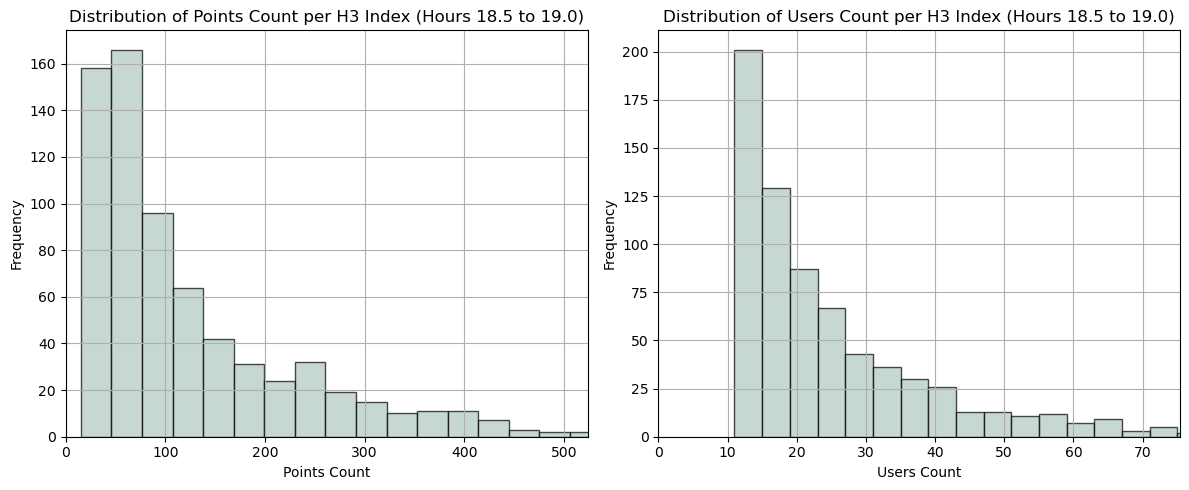

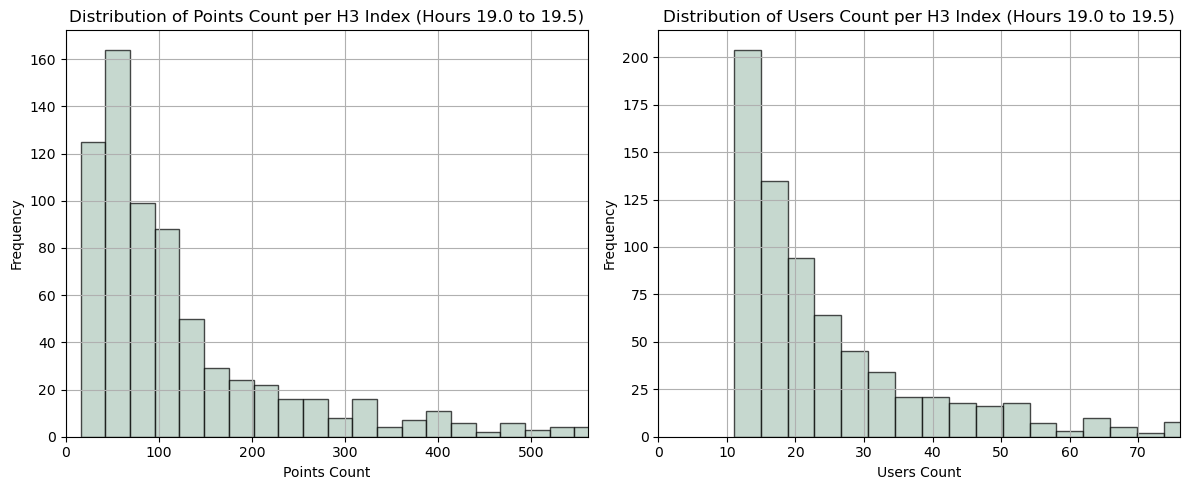

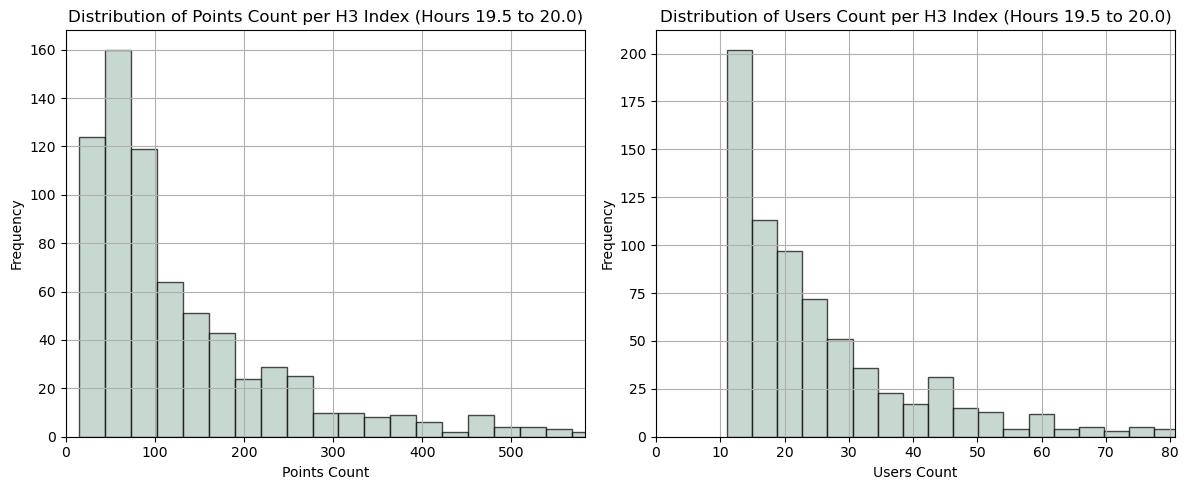

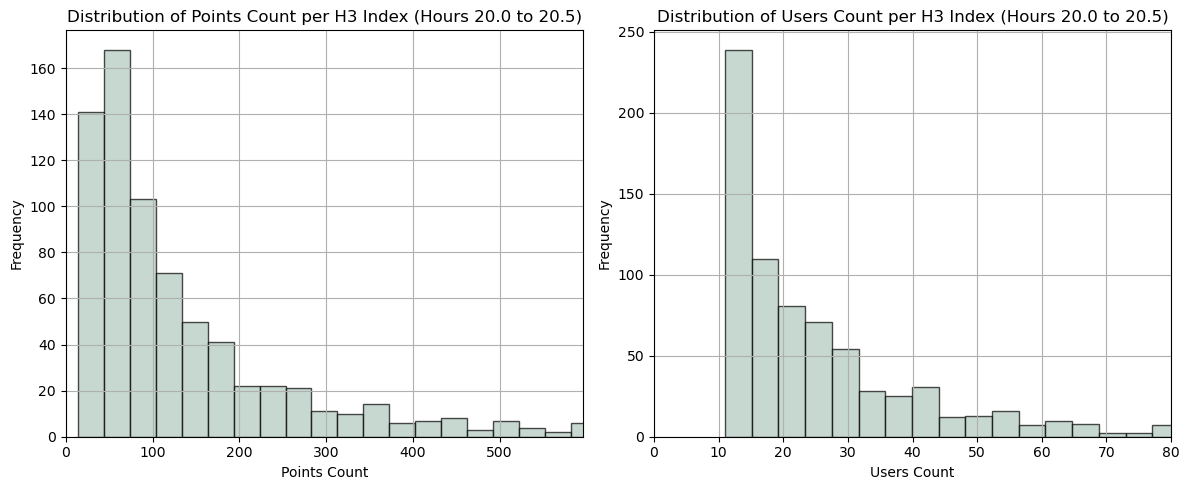

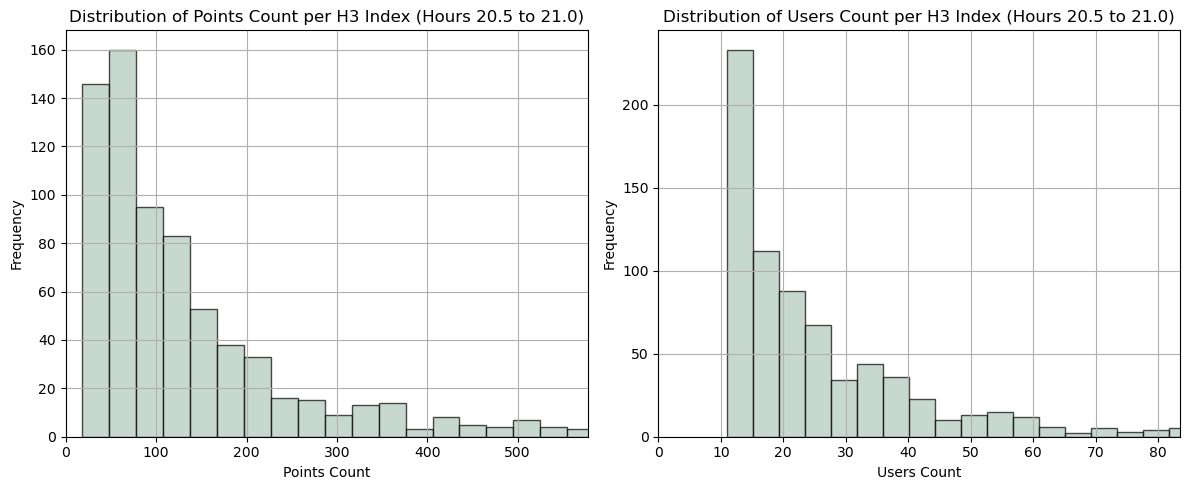

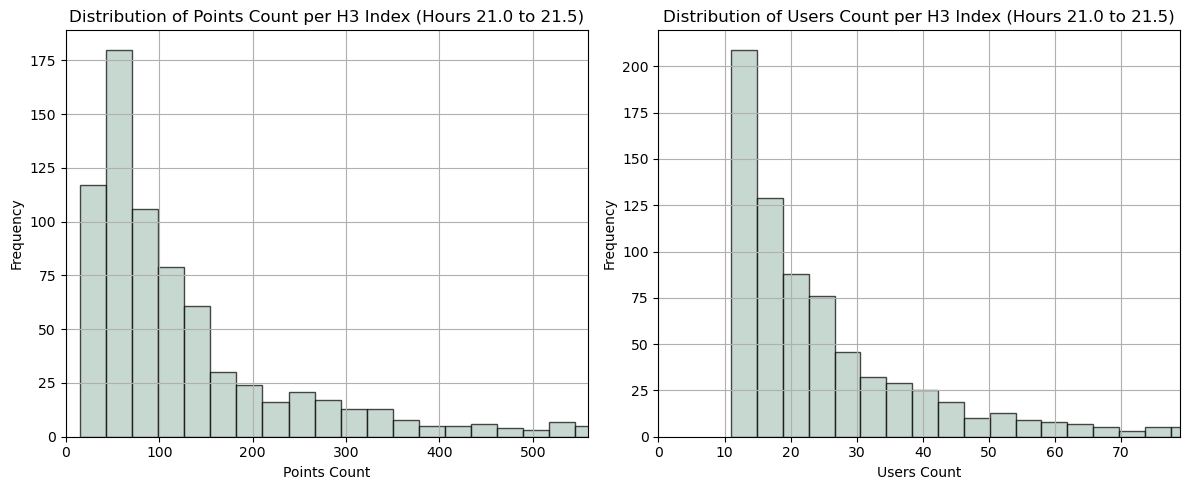

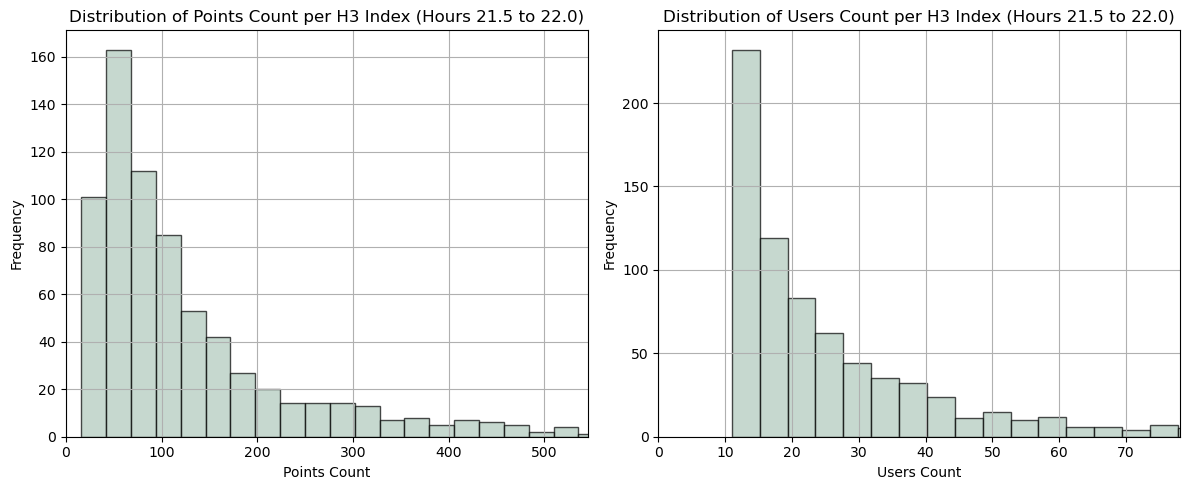

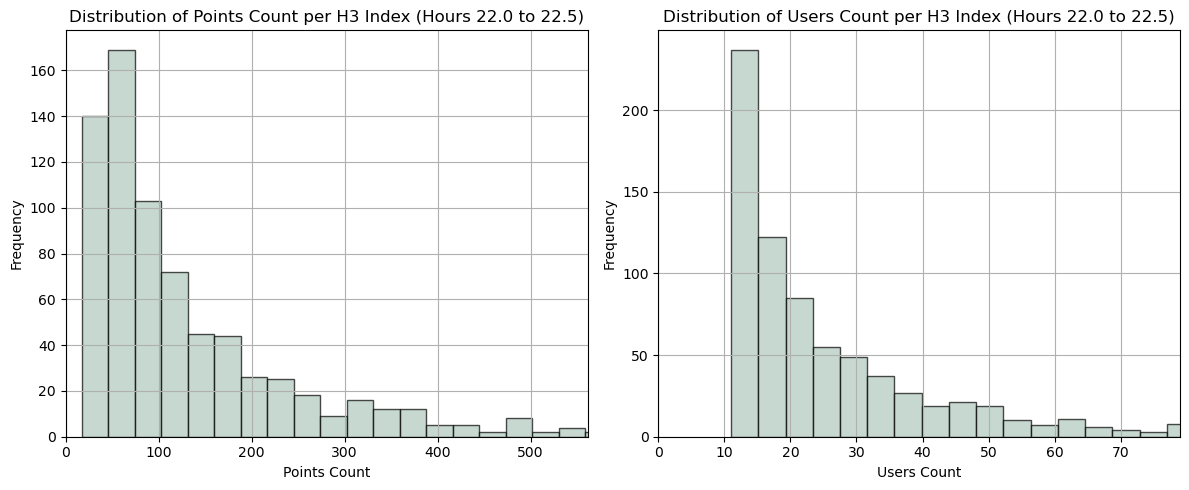

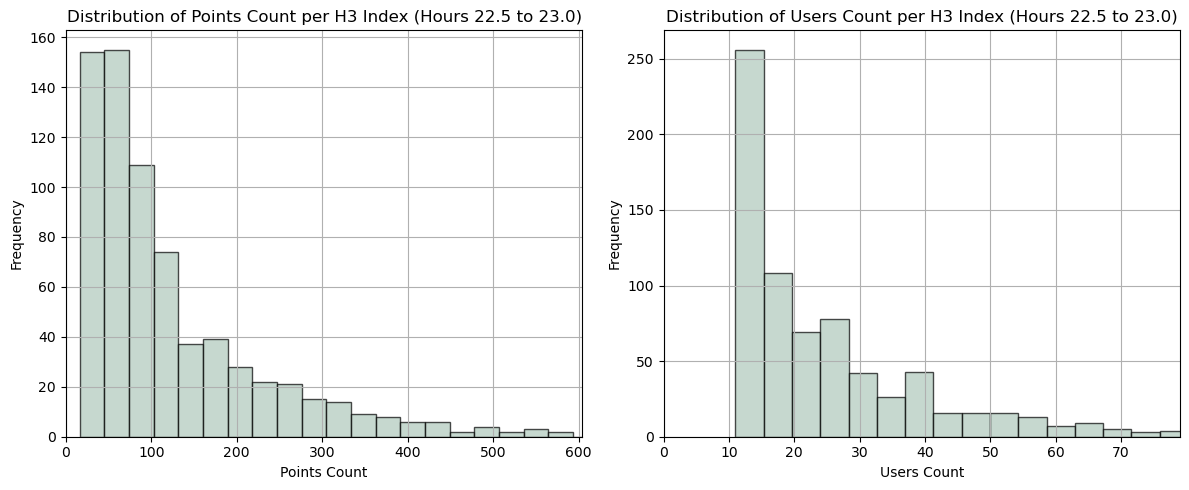

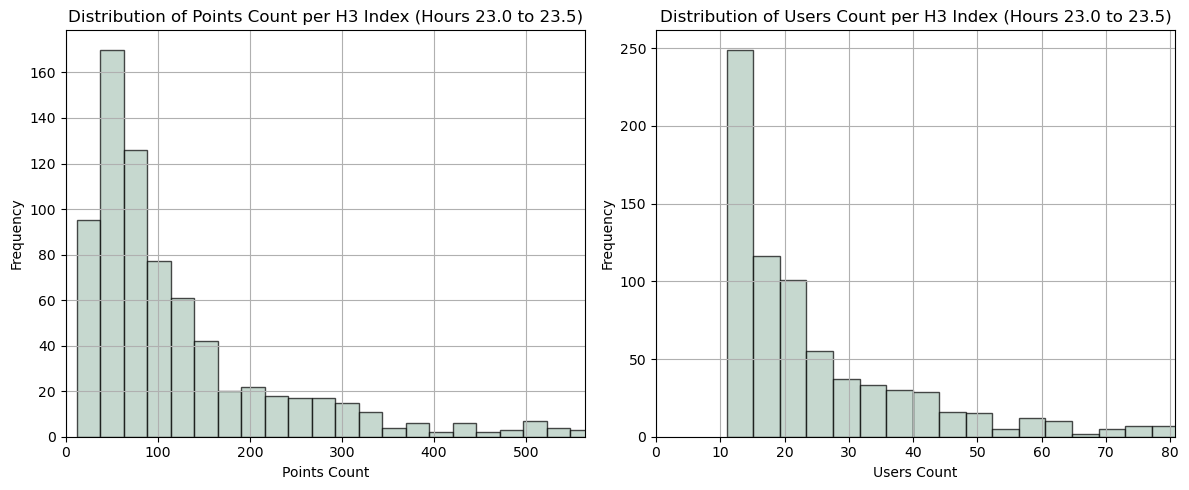

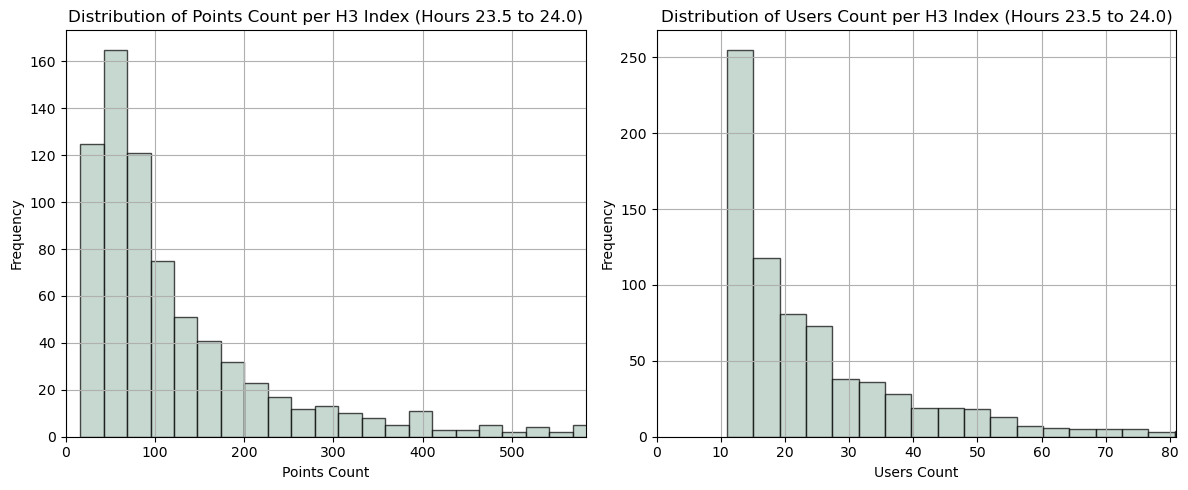

In [3]:
# Example usage
date = 20190105  
chosen_country_code = 'ID' 
color = '#afc8bb'  
aggregation_hours = 0.5  # Replace with desired aggregation hours (0.25, 0.5, 1, 2, 3, 4, 6, 8, or 24)

process_and_plot(chosen_country_code, date, color, aggregation_hours)

No H3 cells with more than 10 users for hour segment 0 (hours 0 to 1).


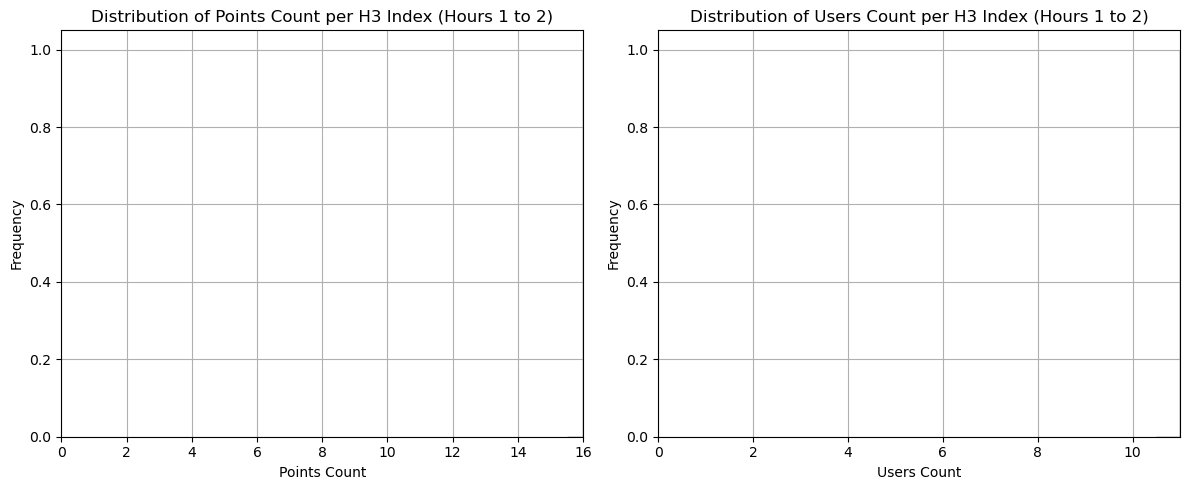

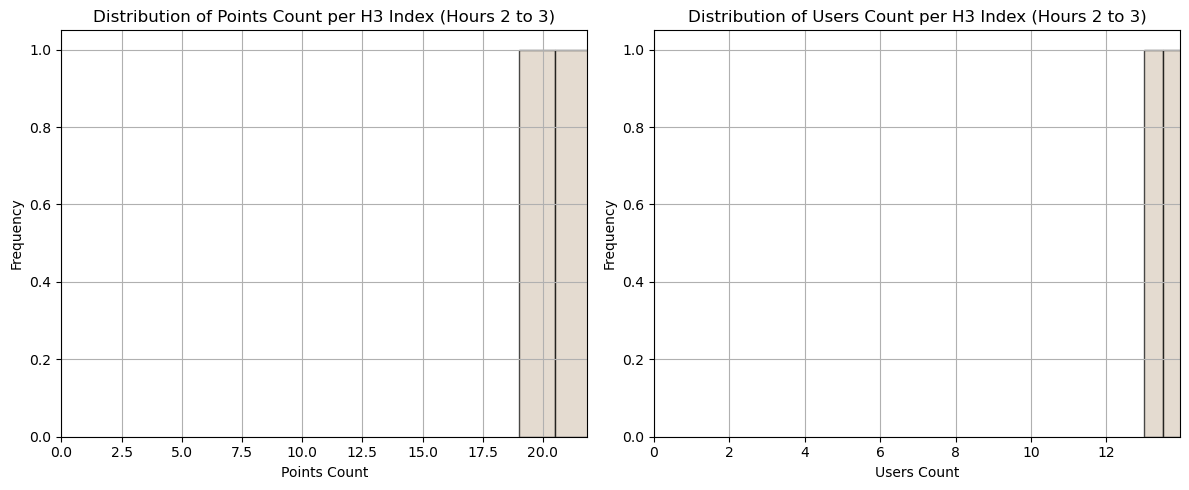

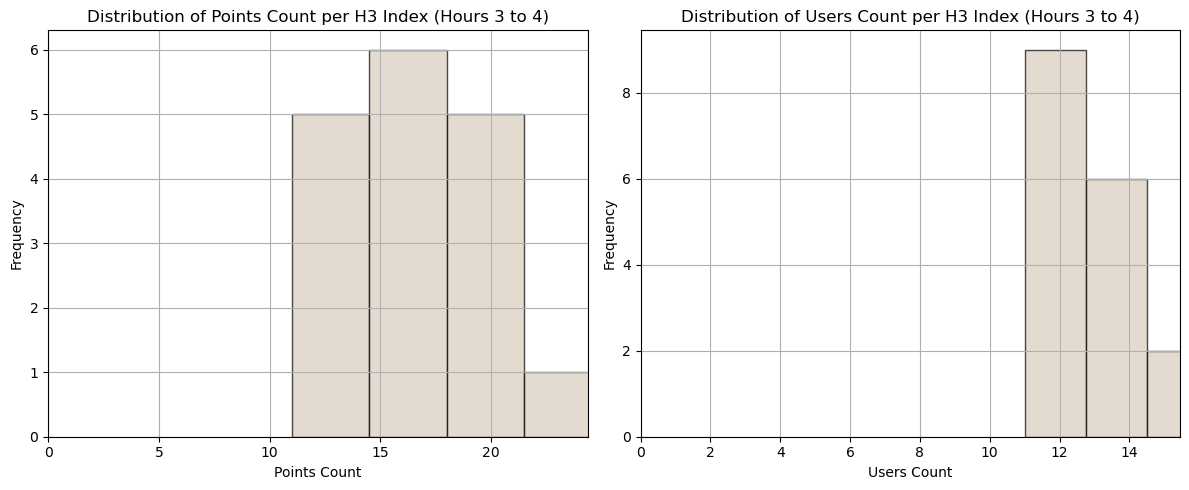

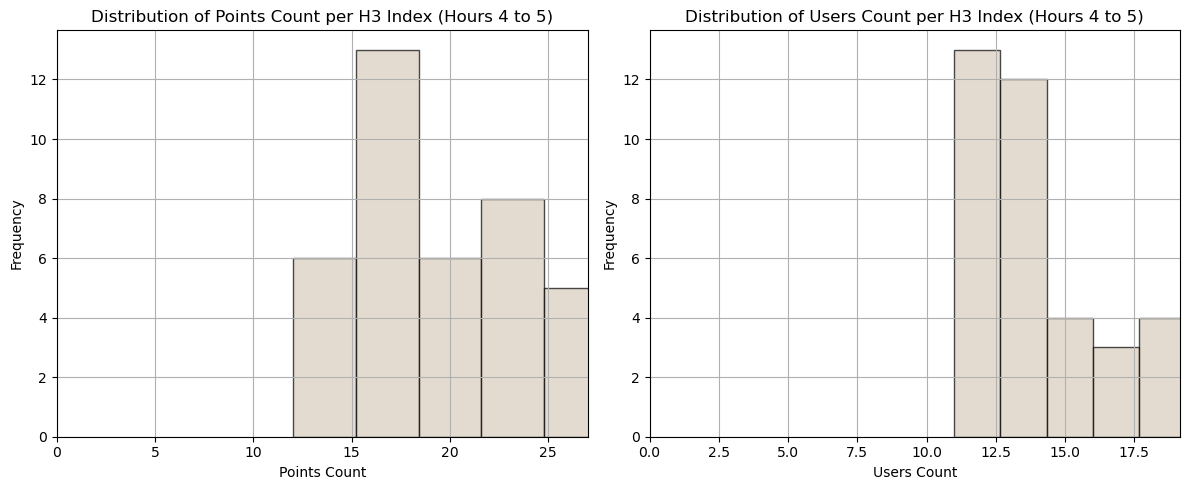

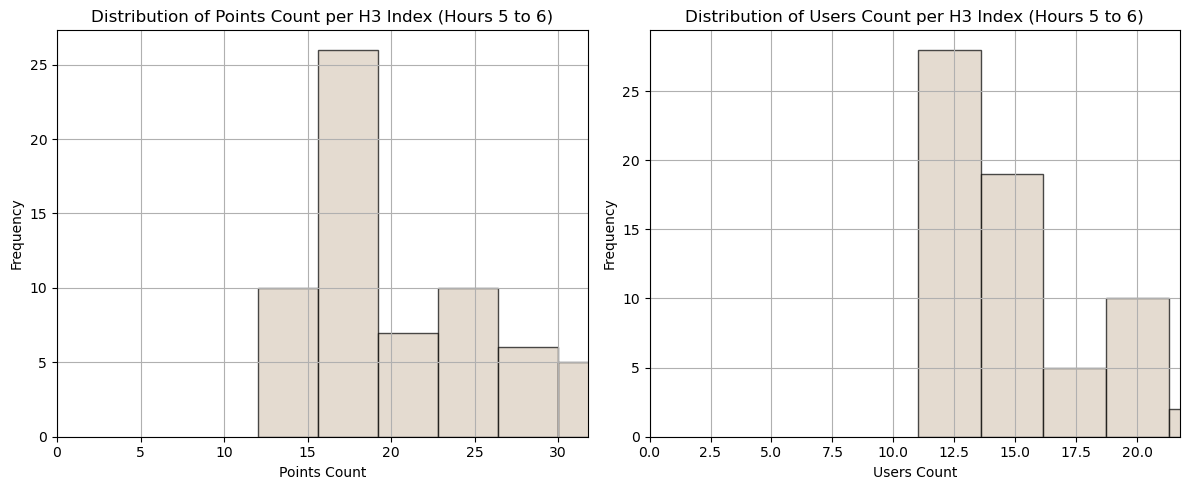

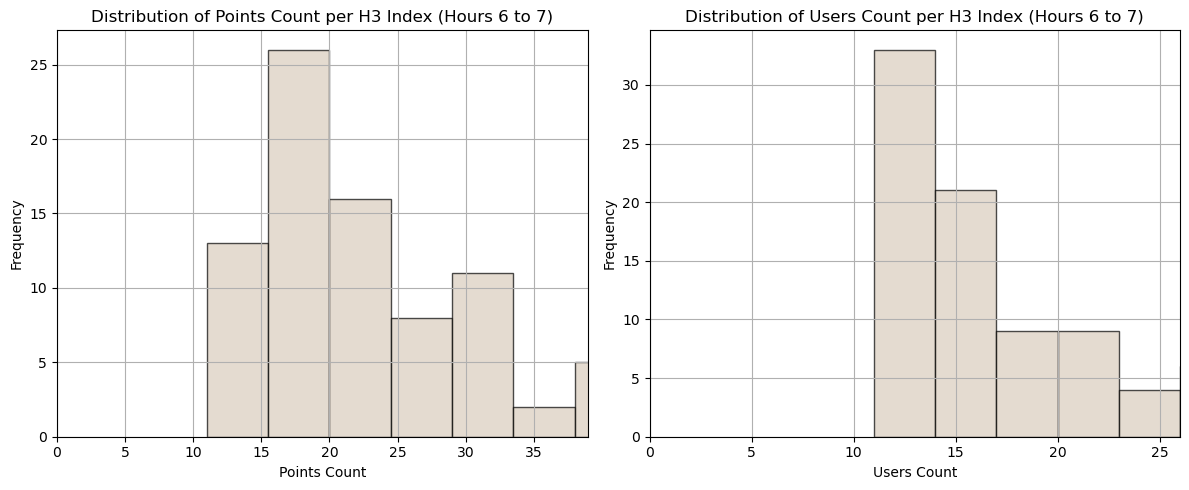

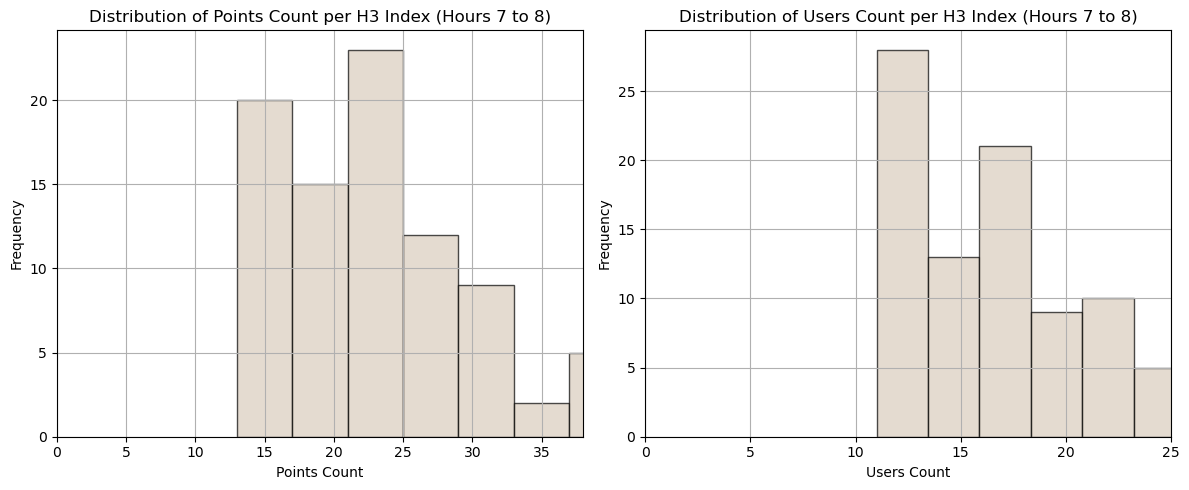

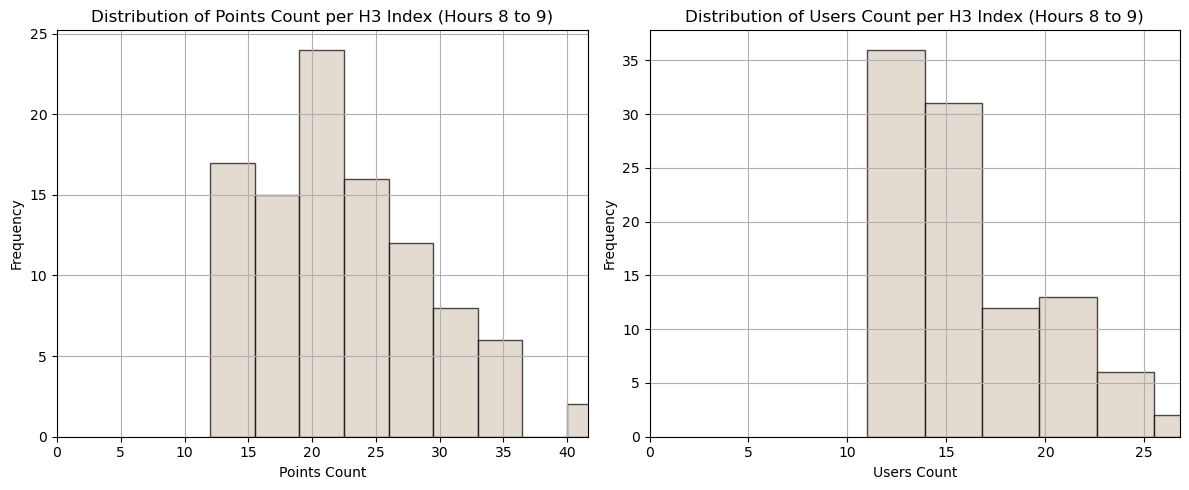

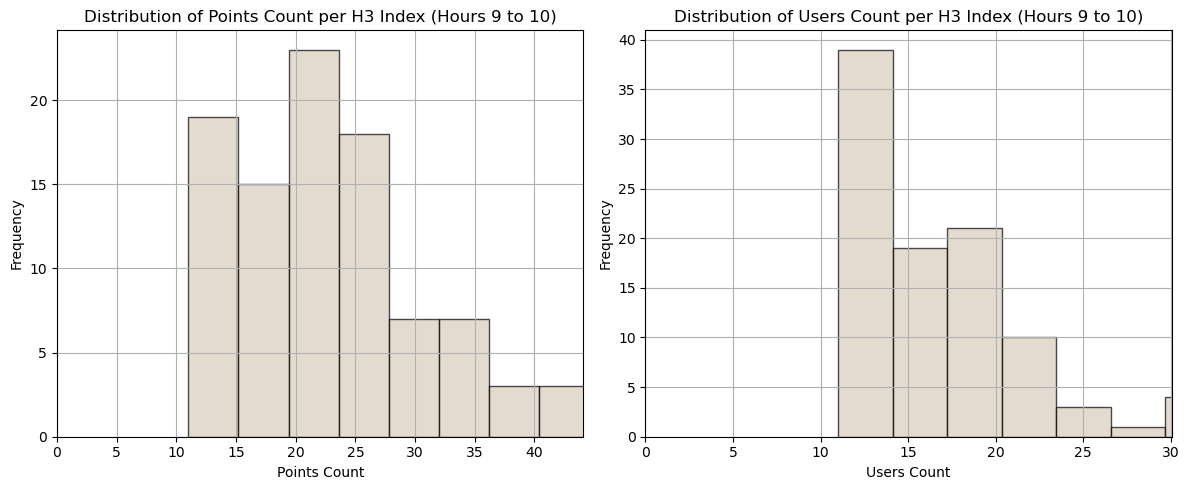

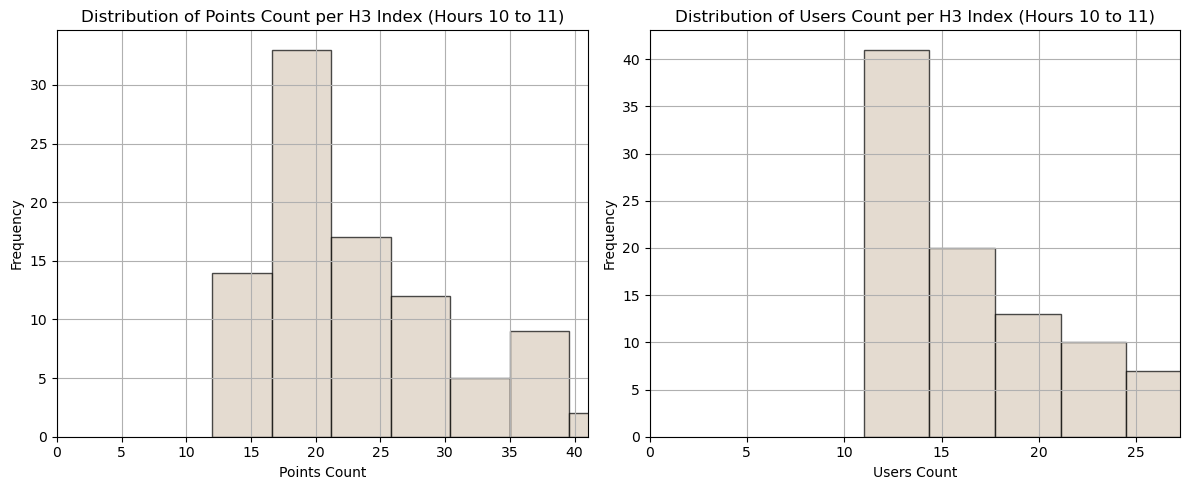

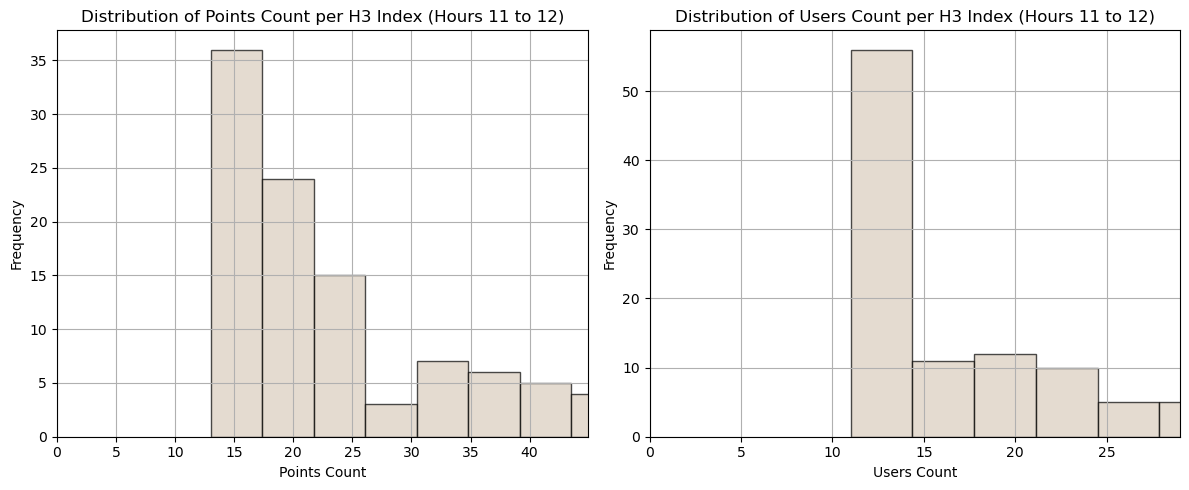

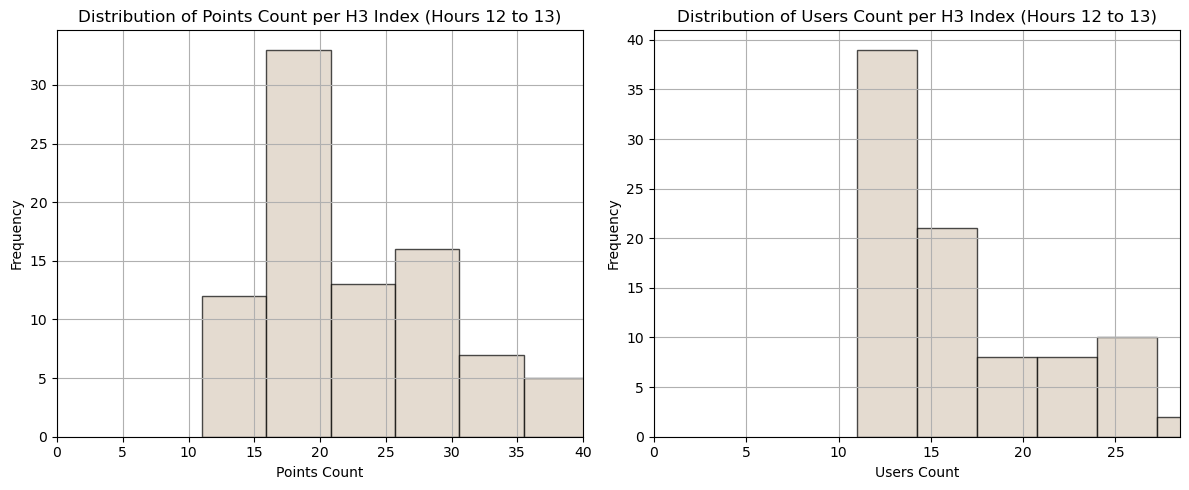

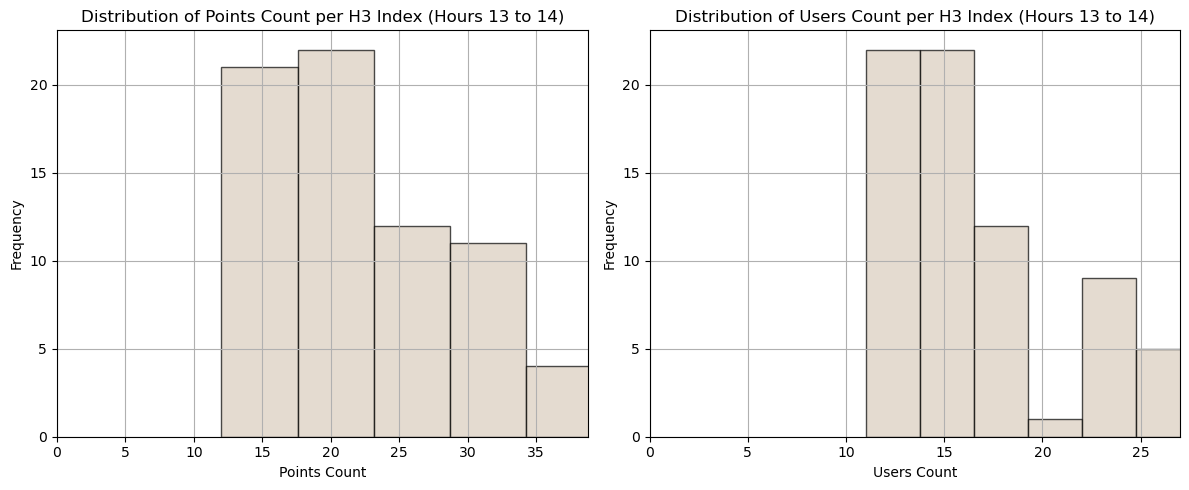

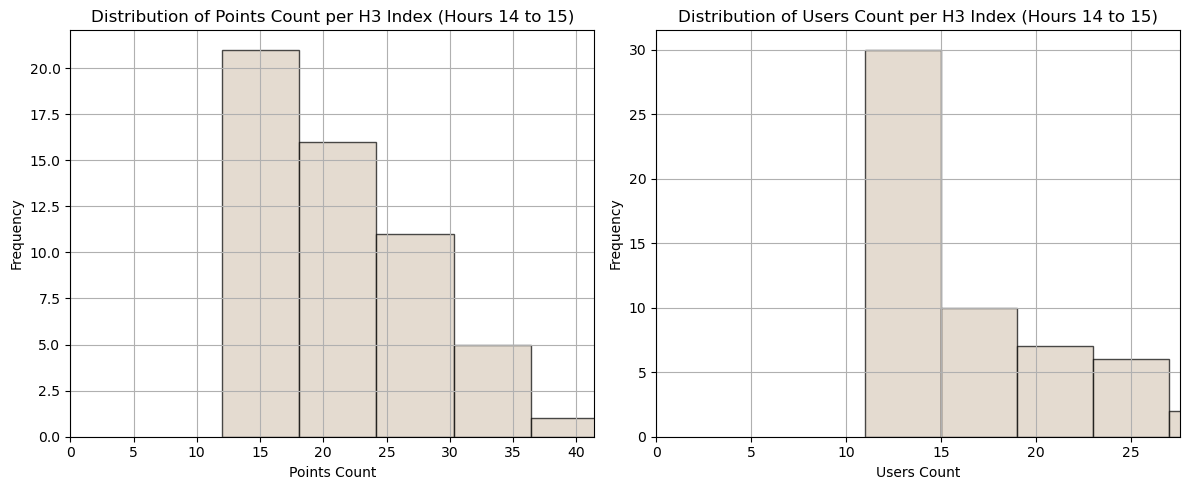

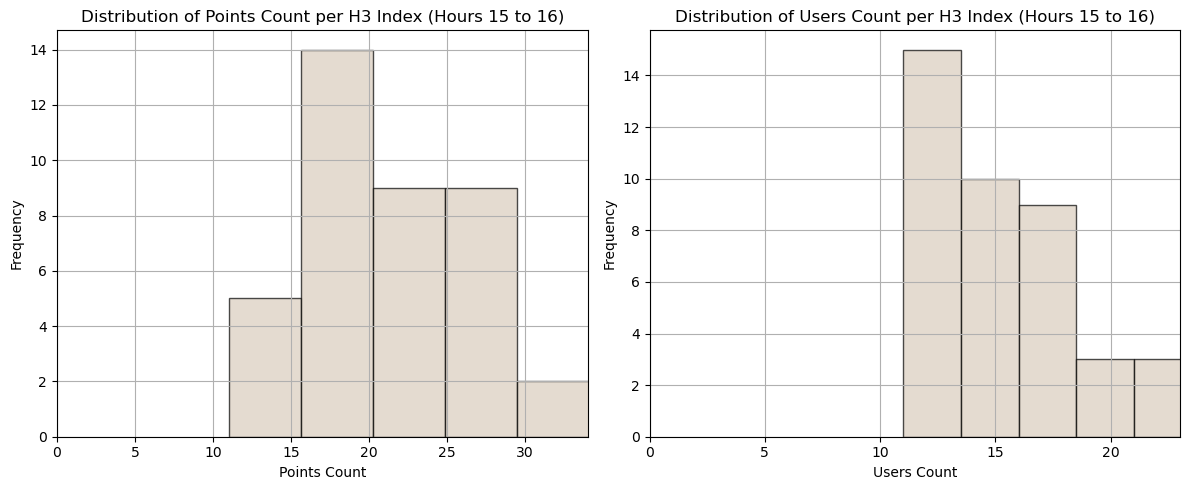

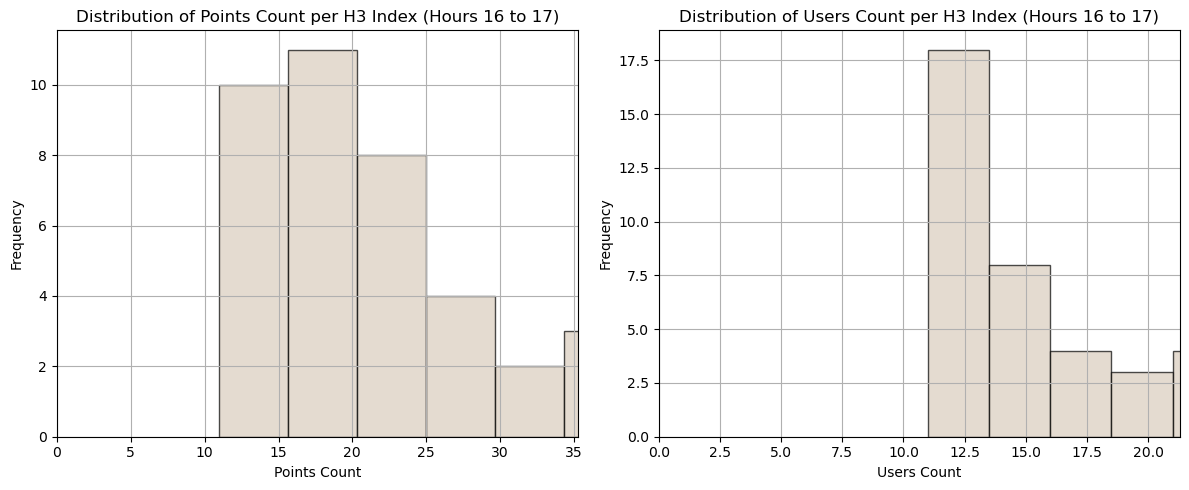

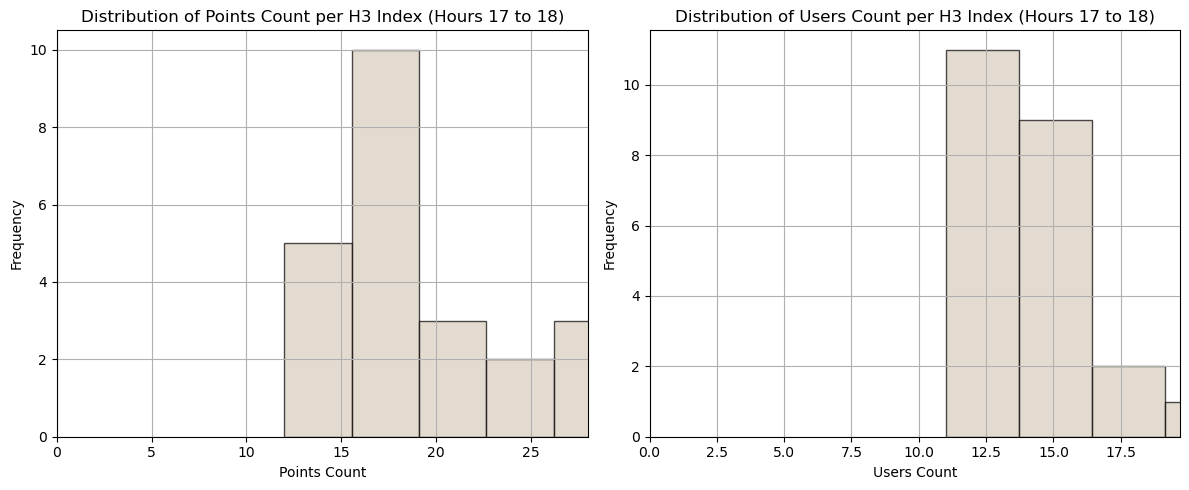

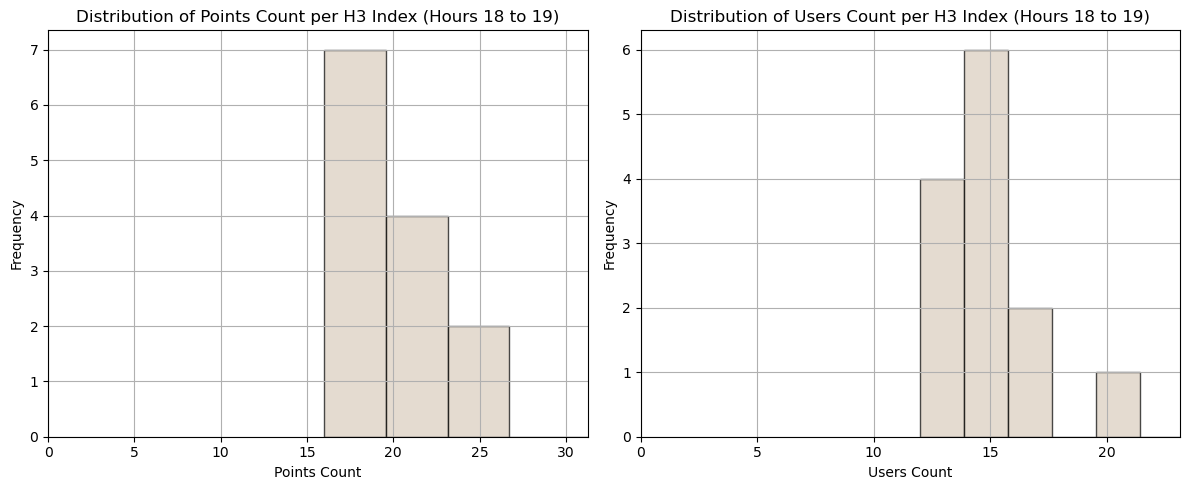

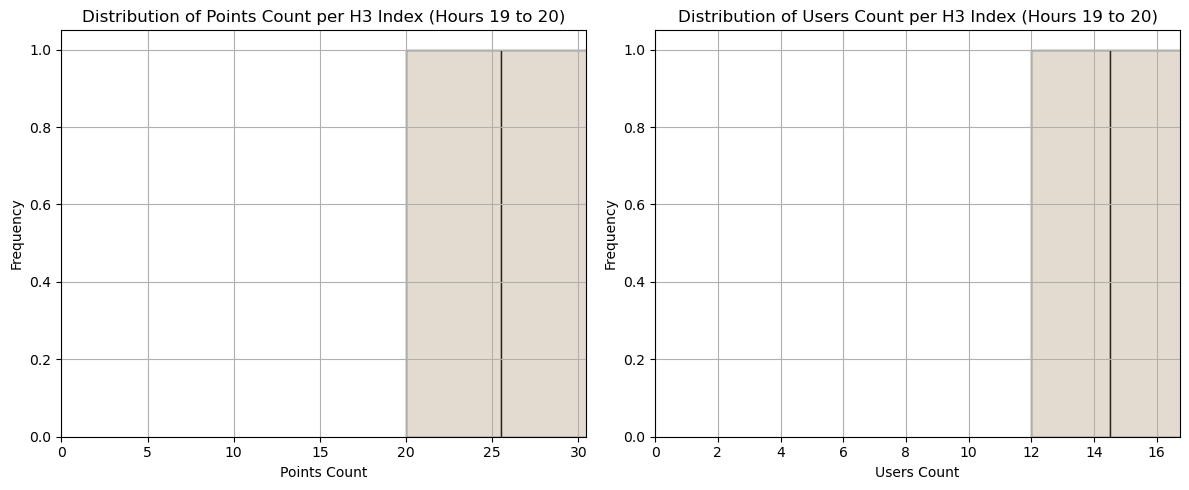

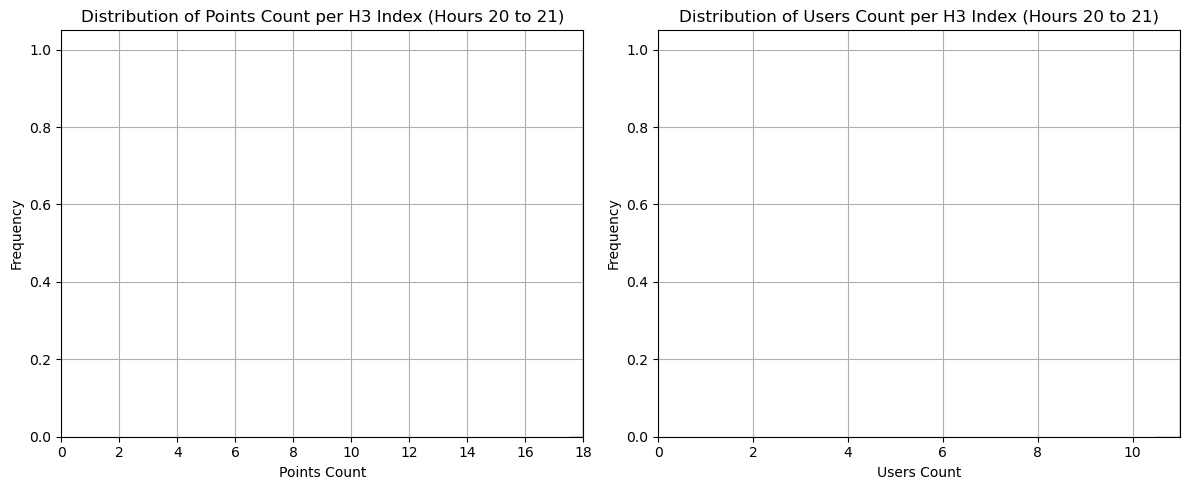

No H3 cells with more than 10 users for hour segment 21 (hours 21 to 22).
No H3 cells with more than 10 users for hour segment 22 (hours 22 to 23).
No H3 cells with more than 10 users for hour segment 23 (hours 23 to 24).


In [7]:
# Example usage
date = 20190105  
chosen_country_code = 'CO' 
color = '#d9ccbc'  
aggregation_hours = 1  # Replace with desired aggregation hours (0.25, 0.5, 1, 2, 3, 4, 6, 8, or 24)

process_and_plot(chosen_country_code, date, color, aggregation_hours)

# country_codes = ['MX', 'IN', 'ID', 'CO']
# colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']

In [10]:
# With ridgeplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h3
import numpy as np

# Function to add 'hour_segment' column based on user-defined hour aggregation
def add_hour_segment(df, aggregation_hours):
    df['hour_segment'] = (df['event_datetime_utc'].dt.hour // aggregation_hours).astype(int)
    return df

# Function to calculate optimal bin width using Freedman-Diaconis rule
def optimal_bin_width(data):
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    bin_width = 2 * iqr * len(data) ** (-1/3)
    return bin_width

# Function to plot ridge plots for a specific hour segment
def plot_ridge_plots(df, aggregation_hours, color):
    df['hour_segment_label'] = df['hour_segment'].apply(lambda x: f'{x*aggregation_hours}-{(x+1)*aggregation_hours - 1}h')

    # Filter H3 cells with more than 10 users
    h3_agg = df.groupby(['hour_segment', 'hour_segment_label', 'h3_index']).agg(
        points_count=('cuebiq_id', 'count'),
        users_count=('cuebiq_id', 'nunique')
    ).reset_index()
    
    h3_agg = h3_agg[h3_agg['users_count'] > 10]

    if h3_agg.empty:
        print("No H3 cells with more than 10 users after filtering.")
        return  # Skip plotting if no data after filtering

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(len(h3_agg['hour_segment_label'].unique()), rot=-.25, light=.7)
    g = sns.FacetGrid(h3_agg, row='hour_segment_label', hue='hour_segment_label', aspect=15, height=.5, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, 'points_count',
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, 'points_count', clip_on=False, color="w", lw=2, bw_adjust=.5)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, 'points_count')

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)
    plt.show()

# Function to process and plot data based on user inputs
def process_and_plot(chosen_country_code, date, color, aggregation_hours):
    file_path = f'/home/jovyan/Data/DL/{chosen_country_code}/{date}_{chosen_country_code}_pe_dl.csv'
    
    if not os.path.exists(file_path):
        print(f"No data file found for {chosen_country_code} on {date}.")
        return  # Exit if the file does not exist

    # Load data for the chosen country
    df = pd.read_csv(file_path)

    if df.empty:
        print(f"No data available for {chosen_country_code} on {date}.")
        return  # Exit if the DataFrame is empty

    # Ensure there are no NaN values in critical columns
    df = df.dropna(subset=['lat', 'lng', 'event_datetime_utc'])

    # Compute H3 index
    resolution = 7
    df['h3_index'] = df.apply(lambda row: h3.latlng_to_cell(row['lat'], row['lng'], resolution), axis=1)

    # Ensure datetime format and drop rows with NaT in 'event_datetime_utc'
    df['event_datetime_utc'] = pd.to_datetime(df['event_datetime_utc'], errors='coerce')
    df = df.dropna(subset=['event_datetime_utc'])

    # Add 'hour_segment' column based on user input
    df = add_hour_segment(df, aggregation_hours)

    # Plot ridge plots
    plot_ridge_plots(df, aggregation_hours, color)


In [ ]:
# Example usage
date = 20190105  
chosen_country_code = 'CO' 
color = '#d9ccbc'  
aggregation_hours = 1  # Replace with desired aggregation hours (0.25, 0.5, 1, 2, 3, 4, 6, 8, or 24)

process_and_plot(chosen_country_code, date, color, aggregation_hours)

# country_codes = ['MX', 'IN', 'ID', 'CO']
# colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']

# Overall number - Line Chart

## Device Location

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_data(column_name, y_label, title):
    country_codes = ['MX', 'IN', 'ID', 'CO']  # List of country codes
    colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']  # Define colors for each country code

    # Reading the data files for each country and assigning them directly to a list
    dfs = [pd.read_csv(f'/home/jovyan/Data/Stats_TO_TUU/2019_{country}_pe_dl.csv') for country in country_codes]

    # Convert 'event_datetime_utc' to datetime for plotting
    for df in dfs:
        df['event_date_utc'] = pd.to_datetime(df['event_date_utc'])

    # Create the plot with a specific figure size
    plt.figure(figsize=(16, 6))

    # Loop through each dataframe and plot the specified column with labels and colors
    for df, country_code, color in zip(dfs, country_codes, colors):
        plt.plot(df['event_date_utc'], df[column_name], label=country_code, color=color)
        
    # Adding labels and title
    plt.xlabel('Event Date')
    plt.ylabel(y_label)
    plt.title(title)

    # Set the x-axis major locator and formatter for dates
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Every month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Year-month format

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.legend()  # Set legend to show the country codes

    plt.grid(True)  # Enable grid and adjust layout to prevent clipping
    plt.tight_layout()
    
    filename = f"/home/jovyan/Data/Stats_TO_TUU/{title.replace(' ', '_')}.png"  # Save the figure with 'Observations' in the filename
    plt.savefig(filename)

    plt.show()  # Display the plot

In [ ]:
plot_data('Total_Observations', 'Total_Observations', 'pe_dl Observations Over Time')

In [ ]:
plot_data('Total_Unique_Users', 'Total_Unique_Users', 'pe_dl Unique Users Over Time')

## stop

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_data(column_name, y_label, title):
    country_codes = ['MX', 'IN', 'ID', 'CO']  # List of country codes
    colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']  # Define colors for each country code

    # Reading the data files for each country and assigning them directly to a list
    dfs = [pd.read_csv(f'/home/jovyan/Data/2019_{country}_pe_stop.csv') for country in country_codes]

    # Convert 'event_datetime_utc' to datetime for plotting
    for df in dfs:
        df['event_date_utc'] = pd.to_datetime(df['event_date_utc'])

    # Create the plot with a specific figure size
    plt.figure(figsize=(16, 6))

    # Loop through each dataframe and plot the specified column with labels and colors
    for df, country_code, color in zip(dfs, country_codes, colors):
        plt.plot(df['event_date_utc'], df[column_name], label=country_code, color=color)
        
    # Adding labels and title
    plt.xlabel('Event Date')
    plt.ylabel(y_label)
    plt.title(title)

    # Set the x-axis major locator and formatter for dates
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Every month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Year-month format

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.legend()  # Set legend to show the country codes

    plt.grid(True)  # Enable grid and adjust layout to prevent clipping
    plt.tight_layout()
    
    filename = f"/home/jovyan/Data/{title.replace(' ', '_')}.png"  # Save the figure with 'Observations' in the filename
    # plt.savefig(filename)

    plt.show()  # Display the plot

In [ ]:
plot_data('Observations', 'Observations', 'stop Observations by Country (2019)')

In [ ]:
plot_data('Unique_Users', 'Unique Users', 'stop Unique Users by Country (2019)')

## tj

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_data(column_name, y_label, title):
    country_codes = ['MX', 'IN', 'ID', 'CO']  # List of country codes
    colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']  # Define colors for each country code

    # Reading the data files for each country and assigning them directly to a list
    dfs = [pd.read_csv(f'/home/jovyan/Data/2019_{country}_tj.csv') for country in country_codes]

    # Convert 'event_date' to datetime for plotting, specifying the format
    for df in dfs:
        df['event_date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

    # Create the plot with a specific figure size
    plt.figure(figsize=(16, 6))

    # Loop through each dataframe and plot the specified column with labels and colors
    for df, country_code, color in zip(dfs, country_codes, colors):
        plt.plot(df['event_date'], df[column_name], label=country_code, color=color)

    # # with auto color
    # for df, country_code in zip(dfs, country_codes):
    #     plt.plot(df['event_date'], df['Observations'], label=country_code)
        
    # Adding labels and title
    plt.xlabel('Event Date')
    plt.ylabel(y_label)
    plt.title(title)

    # Set the x-axis major locator and formatter for dates
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Every month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Year-month format

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set legend to show the country codes
    plt.legend()

    # Enable grid and adjust layout to prevent clipping
    plt.grid(True)
    plt.tight_layout()
    
    filename = f"/home/jovyan/Data/{title.replace(' ', '_')}.png"  # Save the figure with 'Observations' in the filename
    # plt.savefig(filename)

    plt.show()# Display the plot

In [ ]:
# Call the function with 'Observations' data
plot_data('Observations', 'Observations', 'tj Observations by Country (2019)')

In [ ]:
# Call the function with 'Unique_Users' data
plot_data('Unique_Users', 'Unique Users', 'tj Unique Users by Country (2019)')

## Smaller time range

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_data(column_name, y_label, title, start_date, end_date):
    country_codes = ['MX', 'IN', 'ID', 'CO']  # List of country codes
    colors = ['#5c6c84', '#83a0b2', '#afc8bb', '#d9ccbc']  # Define colors for each country code

    # Reading the data files for each country and assigning them directly to a list
    dfs = [pd.read_csv(f'/home/jovyan/Data/2019_{country}_tj.csv') for country in country_codes]

    # Convert 'event_date' to datetime for plotting, specifying the format
    for df in dfs:
        df['event_date'] = pd.to_datetime(df['event_date'], format='%Y%m%d')

    # Create the plot with a specific figure size
    plt.figure(figsize=(16, 6))

    # Loop through each dataframe and plot the specified column with labels and colors
    for df, country_code, color in zip(dfs, country_codes, colors):
        plt.plot(df['event_date'], df[column_name], label=country_code, color=color)

    # Adding labels and title
    plt.xlabel('Event Date')
    plt.ylabel(y_label)
    plt.title(title)

    # Set the x-axis major locator and formatter for dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Every day for the specified range
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Year-month-day format

    # Convert input dates to datetime objects
    start_datetime = pd.to_datetime(start_date)
    end_datetime = pd.to_datetime(end_date)

    # Set limits for the x-axis to show only the specified date range
    plt.gca().set_xlim(start_datetime, end_datetime)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set legend to show the country codes
    plt.legend()

    # Enable grid and adjust layout to prevent clipping
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()

In [ ]:
plot_data('Observations', 'Observations', 'Observations by Country (Specified Range)', '2019-10-01', '2019-10-31')

# Map？

In [ ]:
# SQL engine
from trino.dbapi import connect 
from sqlalchemy import create_engine
import pandas as pd
import time

class TrinoEngine():
    def __init__(self):
        conn = connect(
            host="localhost",
            port=9090,
            catalog="cuebiq"
        )
        self.cur = conn.cursor()
        self.engine = create_engine("trino://localhost:9090/cuebiq/")
    
    def execute_statement(self, query:str) -> list:
        """
        Create and drop statements.
        """
        self.cur.execute(query)
        return self.cur.fetchall()
    
    def read_sql(self, query:str) -> pd.DataFrame: 
        """
        Select and insert into operations.
        """
        return pd.read_sql(query, self.engine)

sql_engine = TrinoEngine()

In [ ]:
schema_name = {'cda': 'cuebiq.paas_cda_pe_v3'}

# dl_table = f"{schema_name['cda']}.device_location"  
pe_dl_table = f"{schema_name['cda']}.device_location_uplevelled"

tj_table = f"{schema_name['cda']}.trajectory"     
pe_tj_table = f"{schema_name['cda']}.trajectory_uplevelled"

# stop_table = f"{schema['cda']}.stop" 
pe_stop_table = f"{schema_name['cda']}.stop_uplevelled"

visit_table = f"{schema_name['cda']}.visit " 


In [ ]:
# tj
start_time = time.time()

df = sql_engine.read_sql(
    f"""
    SELECT *
    FROM {pe_tj_table}
    WHERE 
        event_date = 20191201
        AND start_country = 'CO'
        AND end_country = 'CO'
        -- AND cuebiq_id % 1000 = 0
    -- LIMIT 5
    """
)

end_time = time.time() # Stop the timer
execution_time = end_time - start_time # Calculate the total time taken
print(f"Query executed in: {execution_time:.2f} seconds")

df

In [ ]:
country_code = 'CO'
start_date = 20191201
end_date = 201901210

# Read data from SQL table
query = f"""
    SELECT 
        *,
        -- Extract only the date part
        date(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s') +
        interval '1' second * timezoneoffset_secs) AS event_date_utc
        
        -- Extract the date and time part and adjust by the timezone offset 
        date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s') +
        interval '1' second * timezoneoffset_secs AS event_datetime_utc
        
    FROM {pe_dl_table}
    WHERE 
        country_code = '{country_code}'
        AND event_zoned_datetime IS NOT NULL
        AND processing_date = {start_date} 
"""        
  

pe_dl_table_df = sql_engine.read_sql(query)
pe_dl_table_df

In [ ]:
pe_dl_table_df.columns

In [ ]:
pe_dl_table_df.to_csv(f'/home/jovyan/Data/20191201_CO_dl.csv', index=False) 

In [ ]:
pip install h3

In [ ]:
h3.versions()

In [ ]:
!python -m pip uninstall h3pandas --yes

In [ ]:
pip install h3 h3pandas geopy seaborn
pip install python-geohash

In [ ]:
pip install h3 --pre

In [ ]:
pip install python-geohash

In [ ]:
pip install geopy seaborn

## Map

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def h3_to_polygon(h3_index):
    boundary = h3.cell_to_boundary(h3_index)
    return Polygon([(lat, lon) for lat, lon in boundary])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(h3_agg, geometry=h3_agg['h3_index'].apply(h3_to_polygon))
gdf


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Define normalization
norm = mcolors.Normalize(vmin=h3_agg['points_count'].min(), vmax=h3_agg['points_count'].max())

# Plot GeoDataFrame
gdf.plot(column='points_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, norm=norm)

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cax)

plt.title('H3 Distribution of Points')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Define normalization
norm = mcolors.Normalize(vmin=h3_agg['points_count'].min(), vmax=h3_agg['points_count'].max())

# Plot GeoDataFrame
gdf.plot(column='points_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, norm=norm)

# Set the x and y limits to zoom into a specific area (optional)
ax.set_xlim([5.0, 6])  # Replace xmin and xmax with your desired limits
ax.set_ylim([-76, -75])  # Replace ymin and ymax with your desired limits

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cax)

plt.title('H3 Distribution of Points')
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='users_count', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('H3 Distribution of Users')
plt.show()

In [ ]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Define normalization
norm = mcolors.Normalize(vmin=h3_agg['points_count'].min(), vmax=h3_agg['points_count'].max())

# Plot GeoDataFrame
gdf.plot(column='points_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, norm=norm)

# Highlight the polygons with maximum points count
gdf[gdf['points_count'] == max_points].plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2, label='Max Points')

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cax)

plt.title('H3 Distribution of Points with Max Points Highlighted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import folium
from folium import Choropleth
import h3

# Initialize the map centered around a location (example coordinates)
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add H3 polygons to the map
for index, row in gdf.iterrows():
    geojson = {
        "type": "Feature",
        "geometry": {
            "type": "Polygon",
            "coordinates": [h3.cell_to_boundary(row['h3_index'])]
        },
        "properties": {
            "points_count": row['points_count']
        }
    }
    folium.GeoJson(
        geojson,
        style_function=lambda feature: {
            'fillColor': 'red' if feature['properties']['points_count'] == max_points else 'blue',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5,
        }
    ).add_to(m)


# Display the map (in Jupyter Notebooks)
m


In [ ]:
# Function to convert H3 index to GeoJSON format
def h3_to_geojson(h3_index):
    boundary = h3.cell_to_boundary(h3_index)
    return {
        "type": "Feature",
        "geometry": {
            "type": "Polygon",
            "coordinates": [boundary]
        },
        "properties": {}
    }

# Initialize the map centered around a location (example coordinates)
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add H3 polygons to the map
for index, row in gdf.iterrows():
    geojson = h3_to_geojson(row['h3_index'])
    geojson['properties'] = {
        'points_count': row['points_count'],
        'users_count': row['users_count']
    }
    folium.GeoJson(
        geojson,
        style_function=lambda feature: {
            'fillColor': plt.cm.OrRd(feature['properties']['points_count'] / h3_agg['points_count'].max()),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5,
        },
        tooltip=folium.GeoJsonTooltip(fields=['points_count', 'users_count'],
                                      aliases=['Points Count', 'Users Count'])
    ).add_to(m)

# Display the map (if you're using a Jupyter Notebook)
m